<a href="https://colab.research.google.com/github/rimjhimpathak2002/NIDS/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
!ls

drive  sample_data


In [ ]:
!ls "/content/drive/MyDrive/Intrusion Detection System/Test_data.csv"

ls: cannot access '/content/drive/MyDrive/Intrusion Detection System/Test_data.csv': No such file or directory


In [ ]:
%pip install klib optuna catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.8 MB/s eta 0:00:00


# Required Dependencies (Modules)

In [ ]:
# importing neccessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate
import os
import optuna
import klib as kl
import plotly.express as px
import itertools
import tensorflow as tf
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# Ignore warnings (if any)

In [ ]:
# The first line is used to suppress warnings that may be generated during the execution of the code.
warnings.filterwarnings('ignore')

# The second line sets the verbosity level of the Optuna library to WARNING, which means that only warning
# messages will be displayed during the execution of the code.
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Dataset Import

In [ ]:
# This code reads the training and testing data from CSV files and stores them in pandas dataframes named]
# train_data and test_data respectively.
# The CSV files are assumed to be in the same directory as this Jupyter Notebook.
# The filepaths of the CSV files are 'Train_data.csv' and 'Test_data.csv' respectively.
# The pandas read_csv() function is used to read the CSV files and store them in dataframes.
train_data = pd.read_csv('/content/drive/MyDrive/Intrusion Detection System/Train_data.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Intrusion Detection System/Test_data.csv')

FileNotFoundError: ignored

# EDA (Exploratory Data Analysis)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
train_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [ ]:
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [ ]:
test_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_data.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [ ]:
test_data.describe(include='object')

,protocol_type,service,flag
count,22544,22544,22544
unique,3,64,11
top,tcp,http,SF
freq,18880,7853,14875


In [ ]:
print(f"Test dataset size: {test_data.shape}")
print(f"Train dataset size: {train_data.shape}")

Test dataset size: (22544, 41)
Train dataset size: (25192, 42)


In [ ]:
print(f"Test dataset size: {test_data.size}")
print(f"Train dataset size: {train_data.size}")

Test dataset size: 924304
Train dataset size: 1058064


In [ ]:
# handling ull values
train_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
test_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

<Axes: xlabel='class', ylabel='count'>

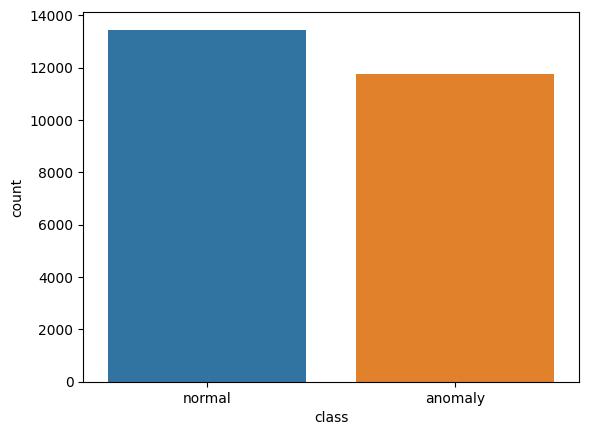

In [ ]:
# This code creates a countplot using seaborn library to visualize the distribution of the target variable 'class' in the training data.
# The countplot shows the number of instances of each class in the 'class' column of the 'train_data' dataframe.
# The x-axis of the countplot represents the different classes in the 'class' column of the 'train_data' dataframe.
# The y-axis of the countplot represents the count of instances of each class in the 'class' column of the 'train_data' dataframe.
# This visualization helps to understand the distribution of the target variable in the training data, which is important
sns.countplot(x=train_data['class'])

In [ ]:
train_data['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [ ]:
train_data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [ ]:
train_data.duplicated().sum()

0

In [ ]:
# This code uses the klib library to plot a missing value heatmap for the train_data dataframe.
# The missingval_plot() function of the klib library is used to create the heatmap.
# The figsize parameter is used to set the size of the heatmap.
# The heatmap shows the distribution of missing values in the columns of the train_data dataframe.
# The darker the color of the cell, the higher the percentage of missing values in the corresponding column.
# This visualization helps to identify the columns with high percentage of missing values, which is important for data cleaning.
kl.missingval_plot(train_data, figsize=(6, 5))

No missing values found in the dataset.


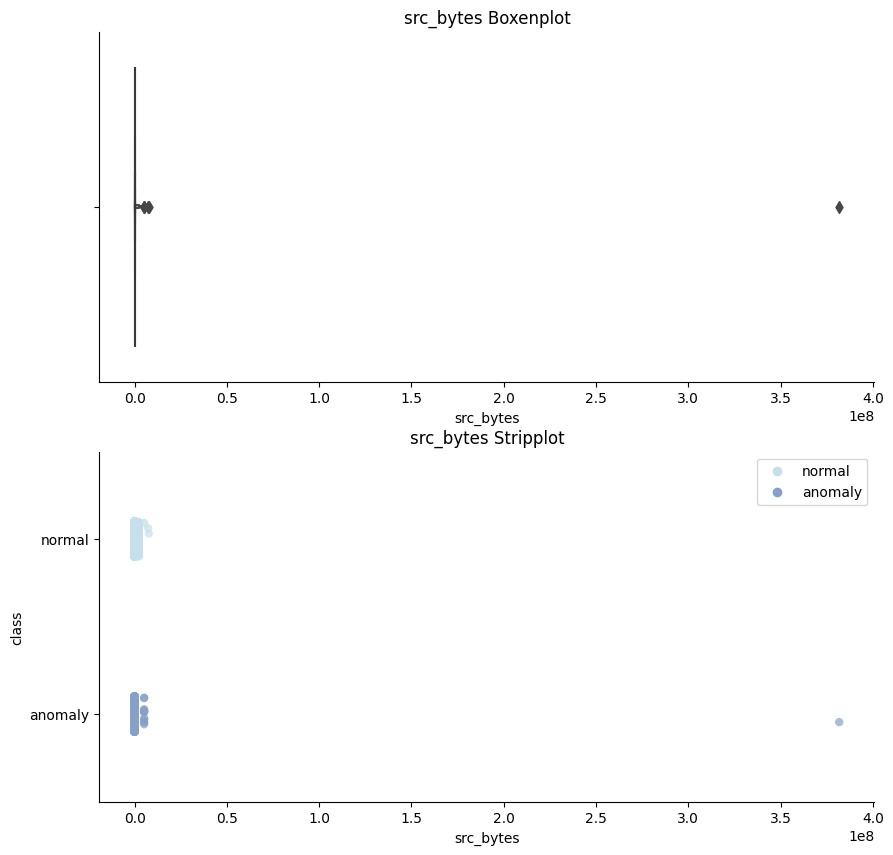

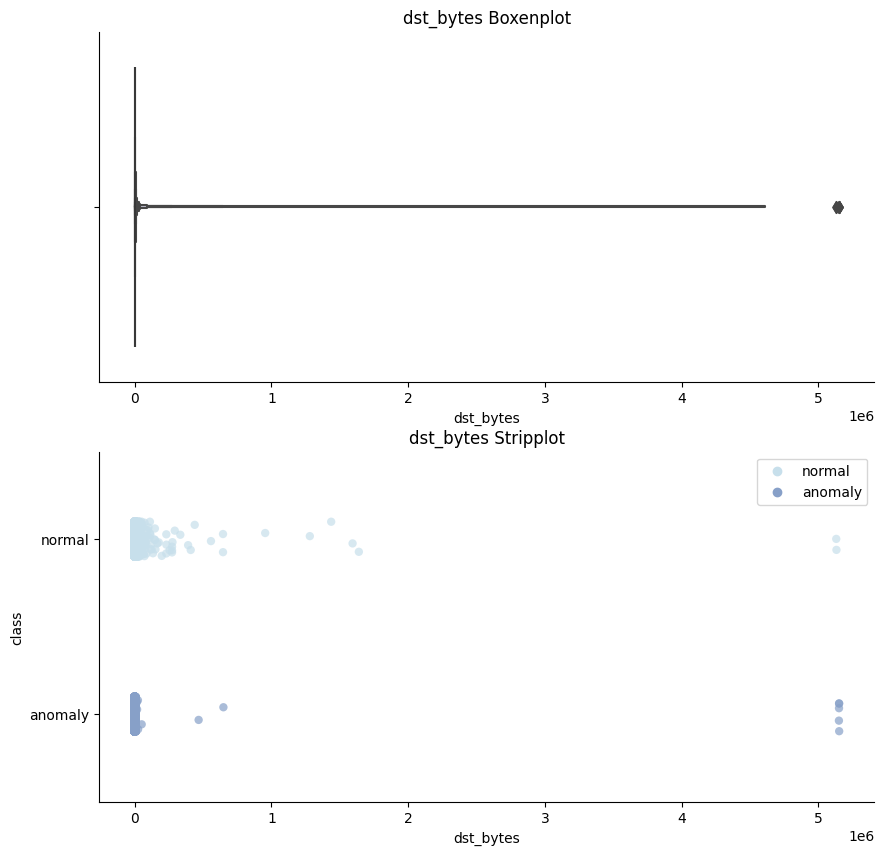

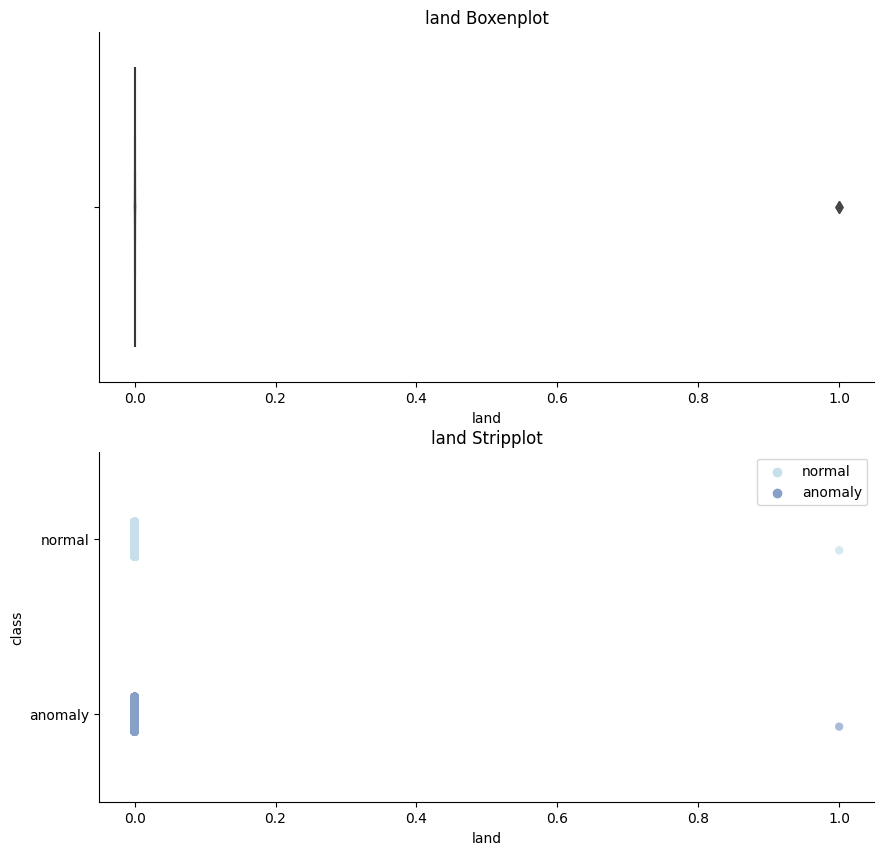

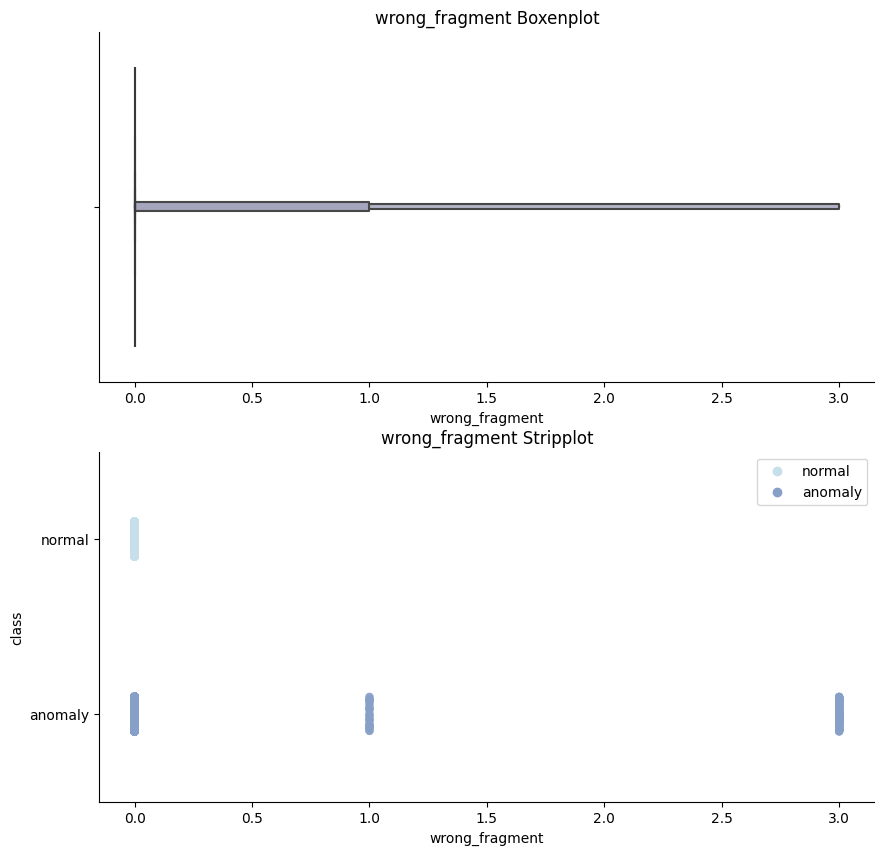

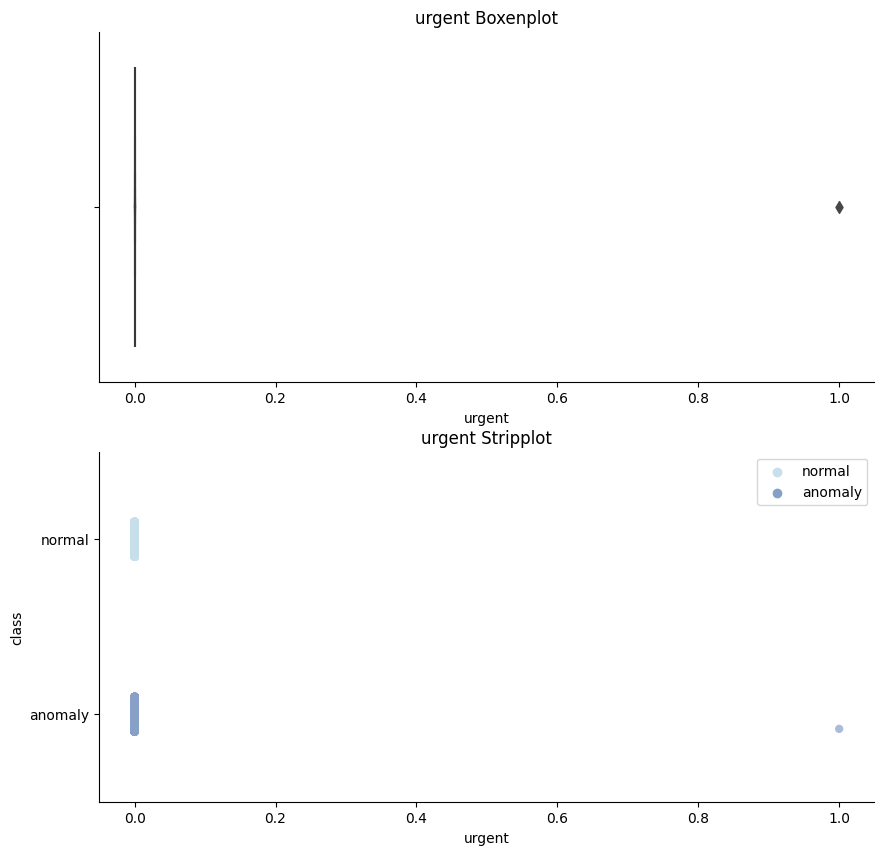

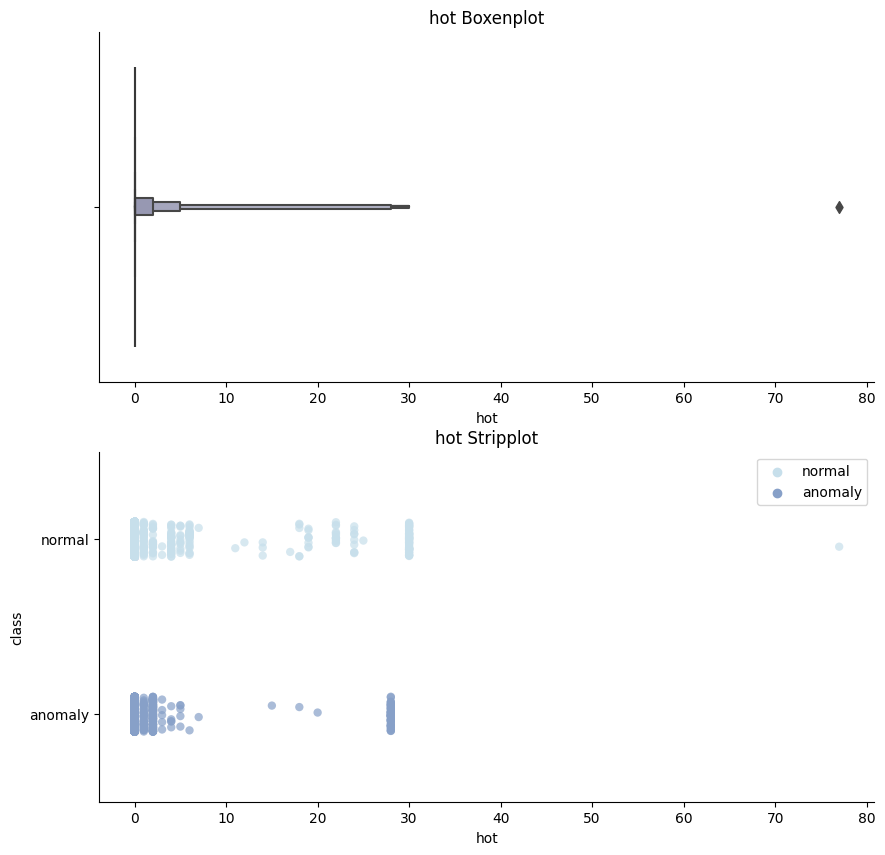

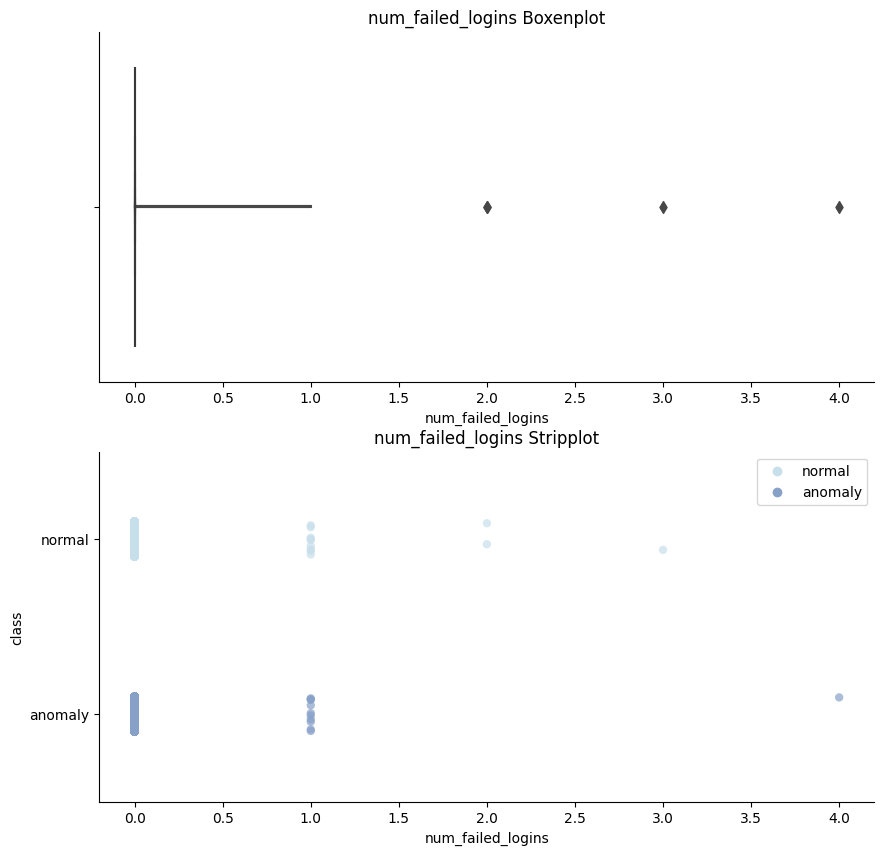

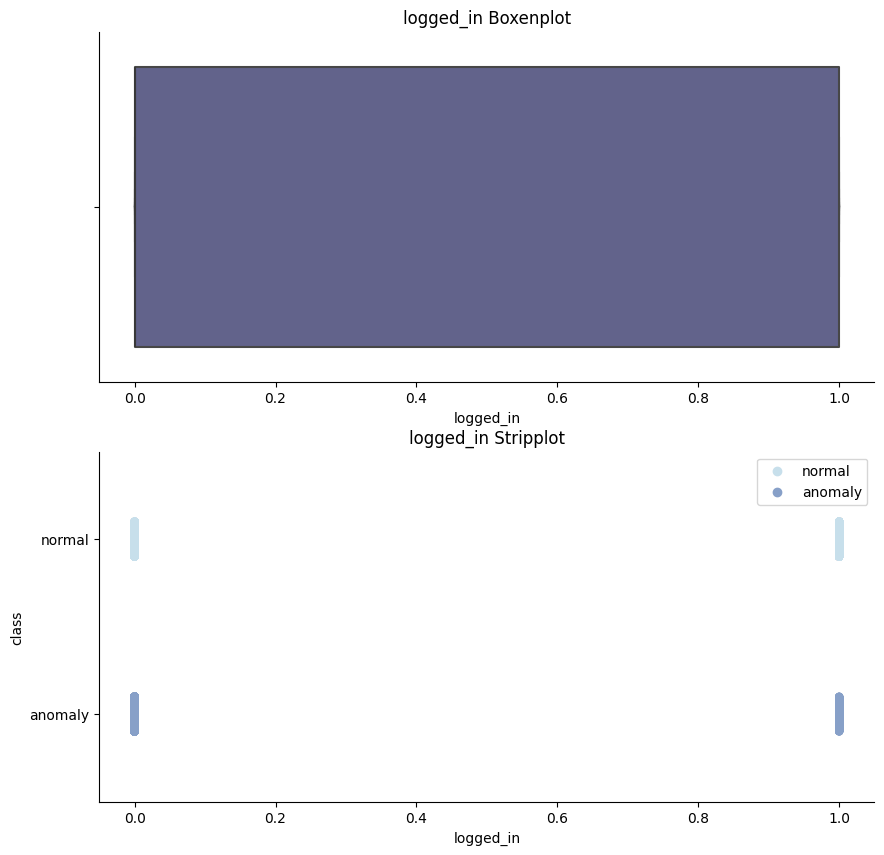

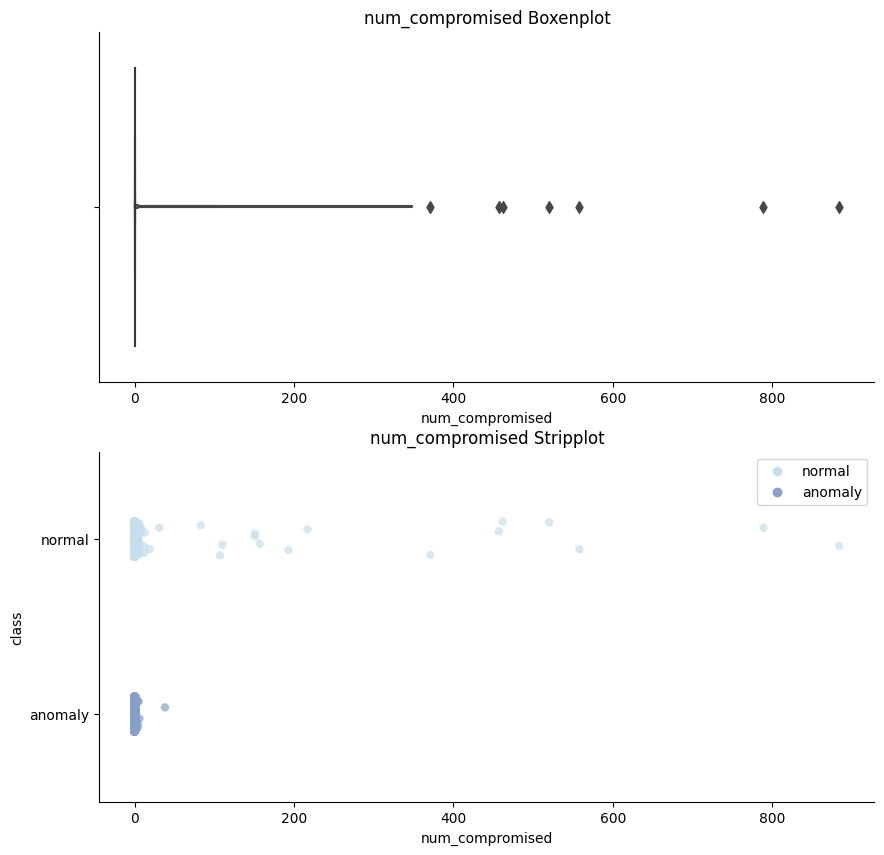

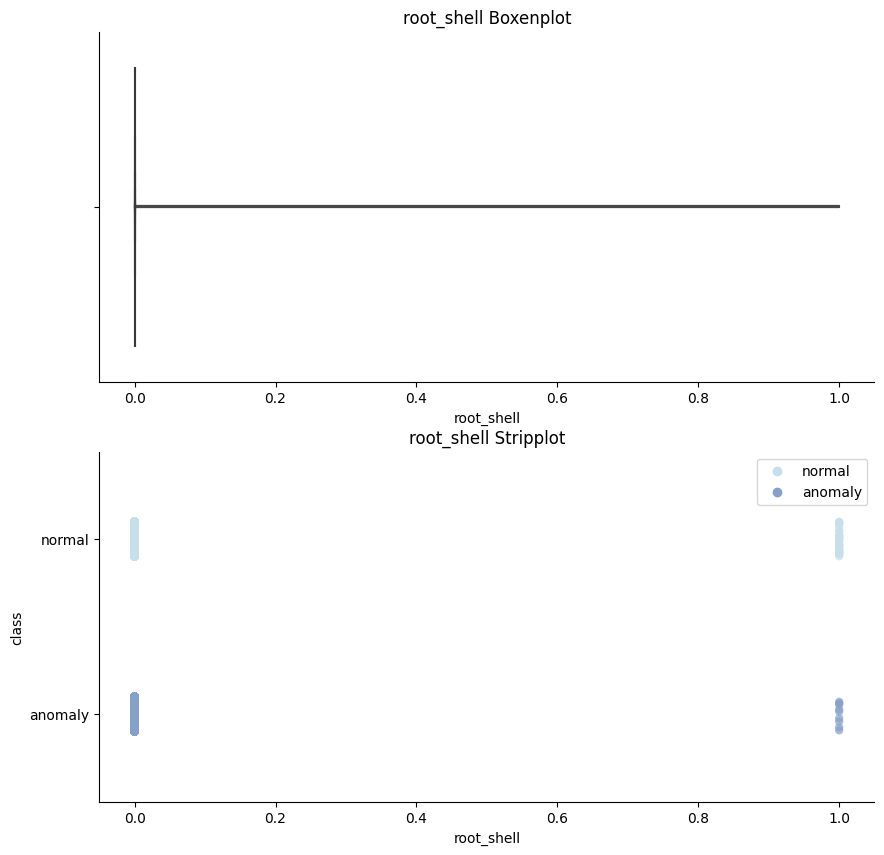

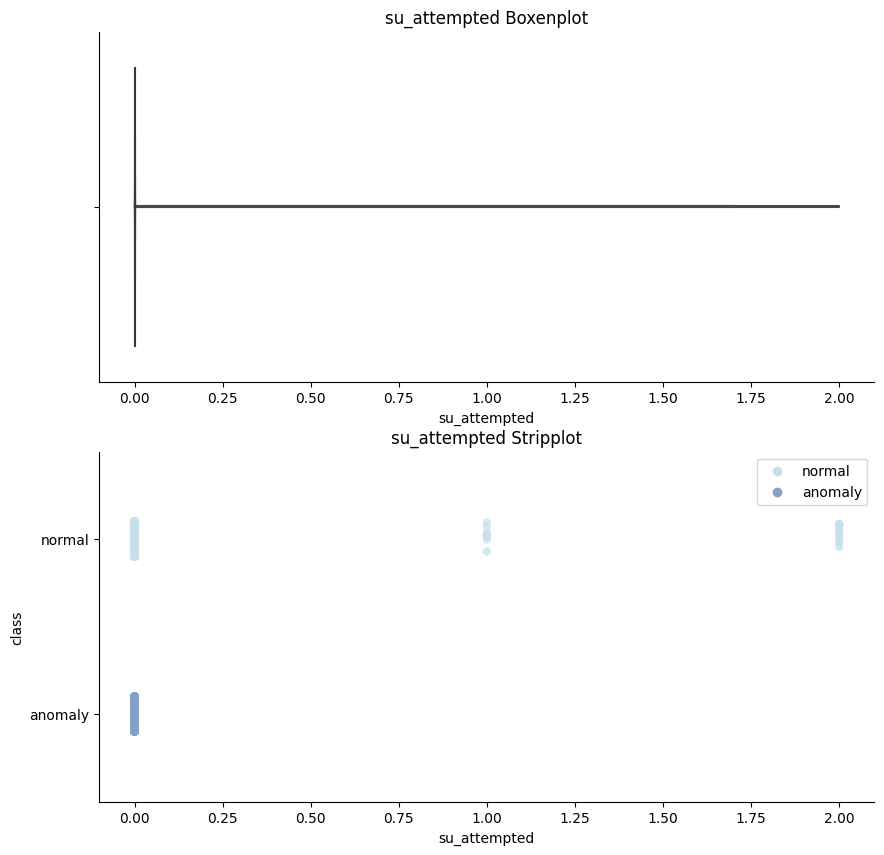

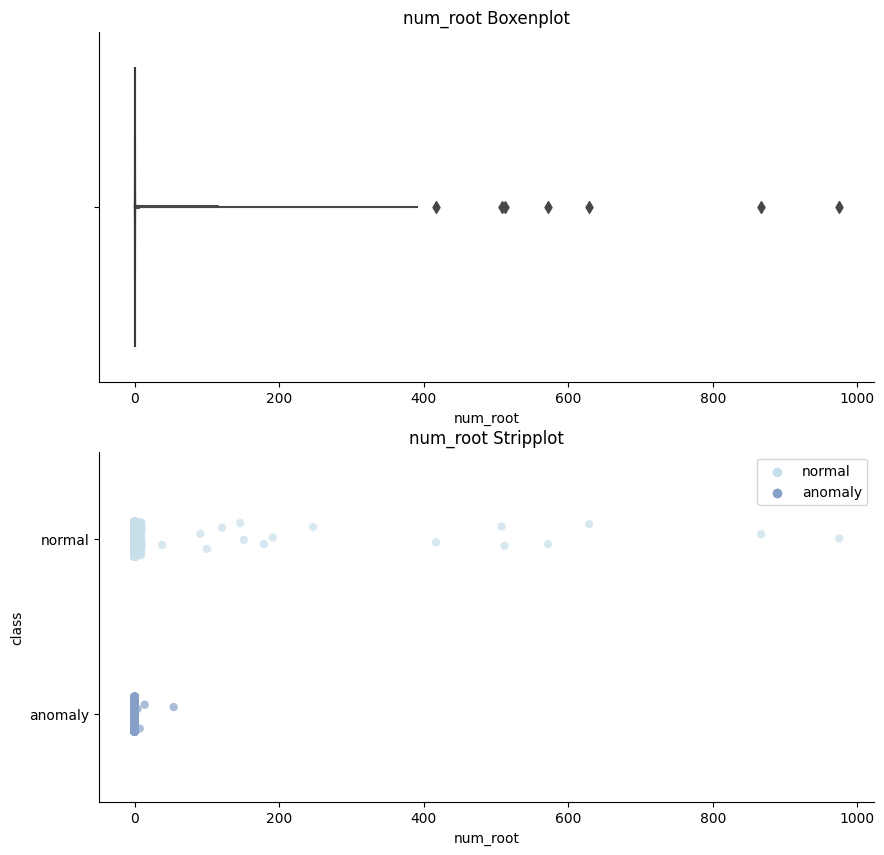

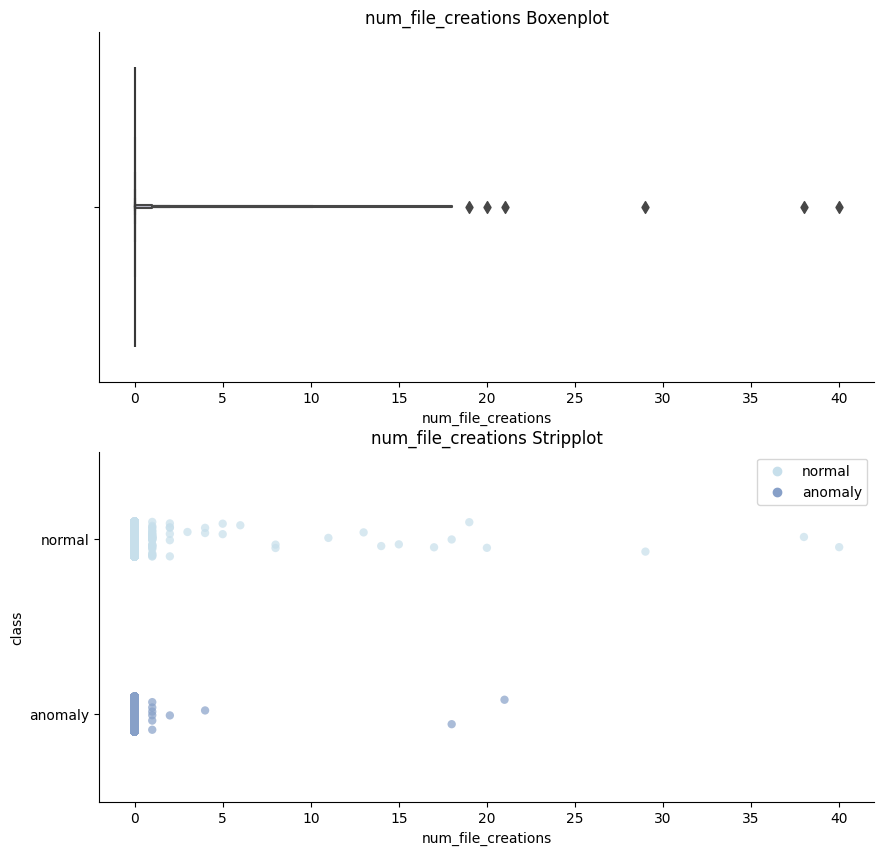

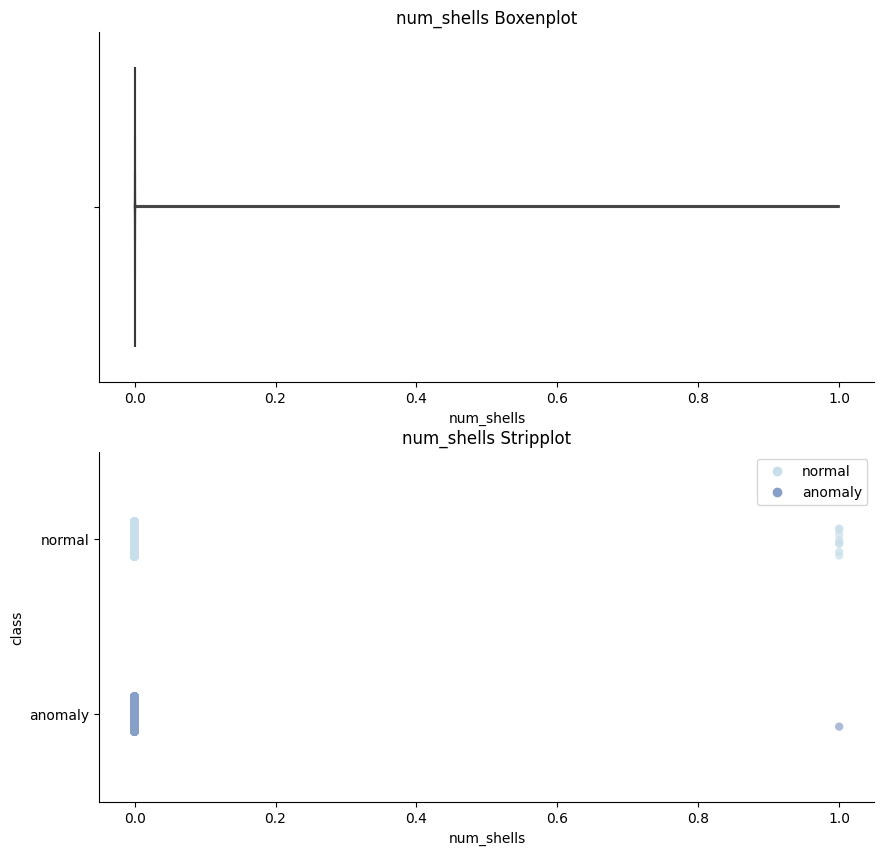

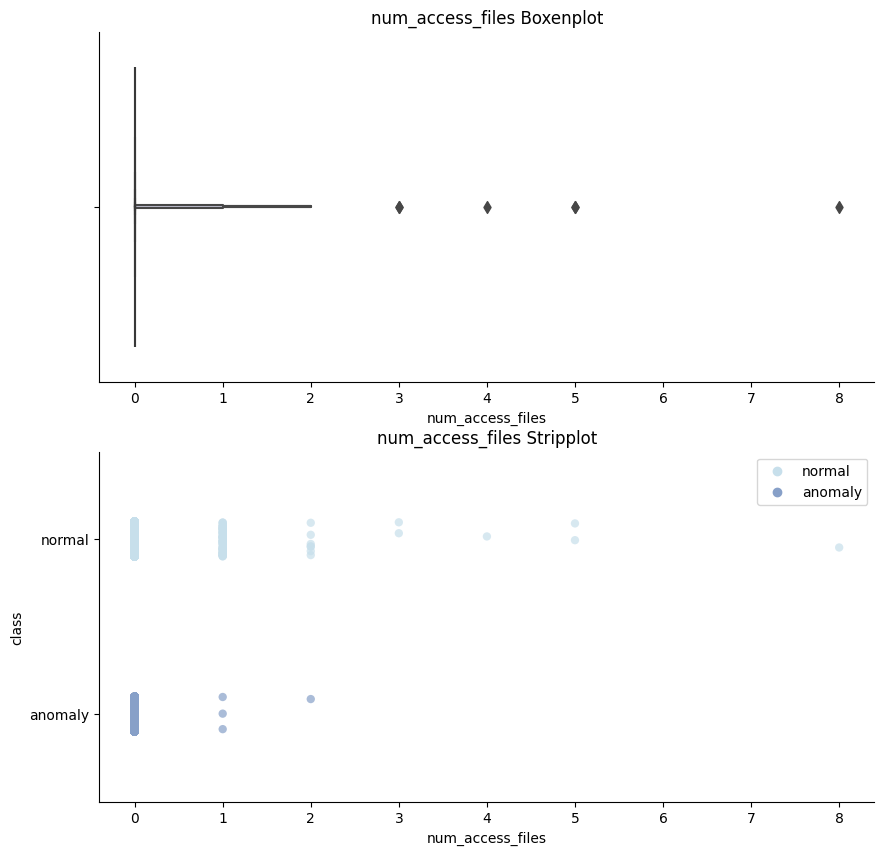

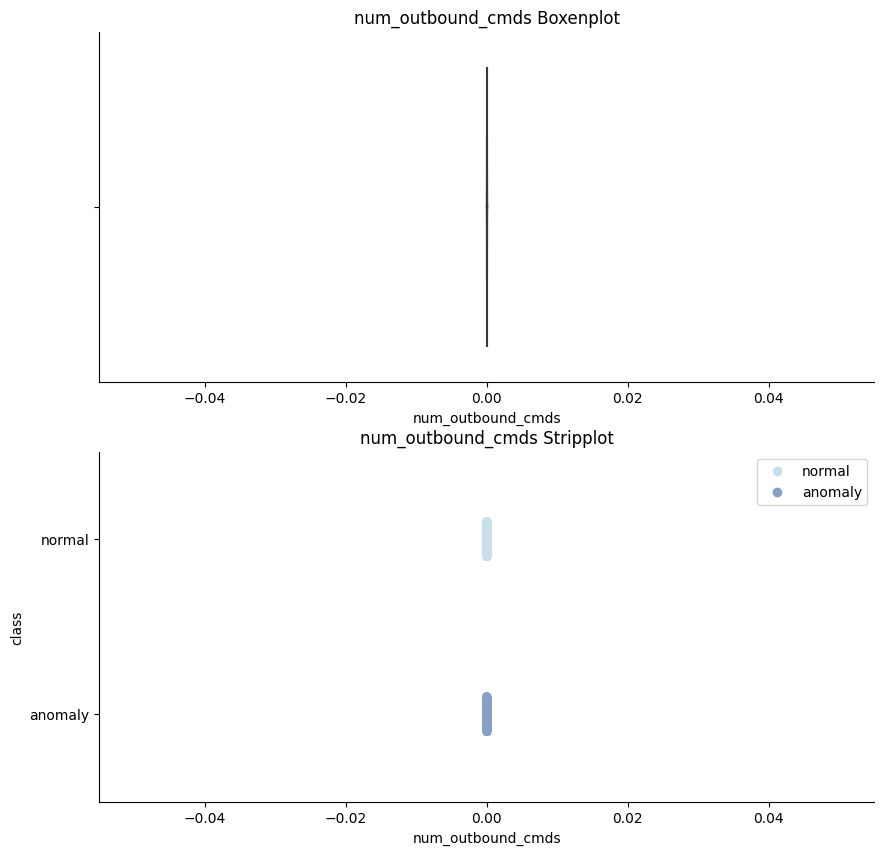

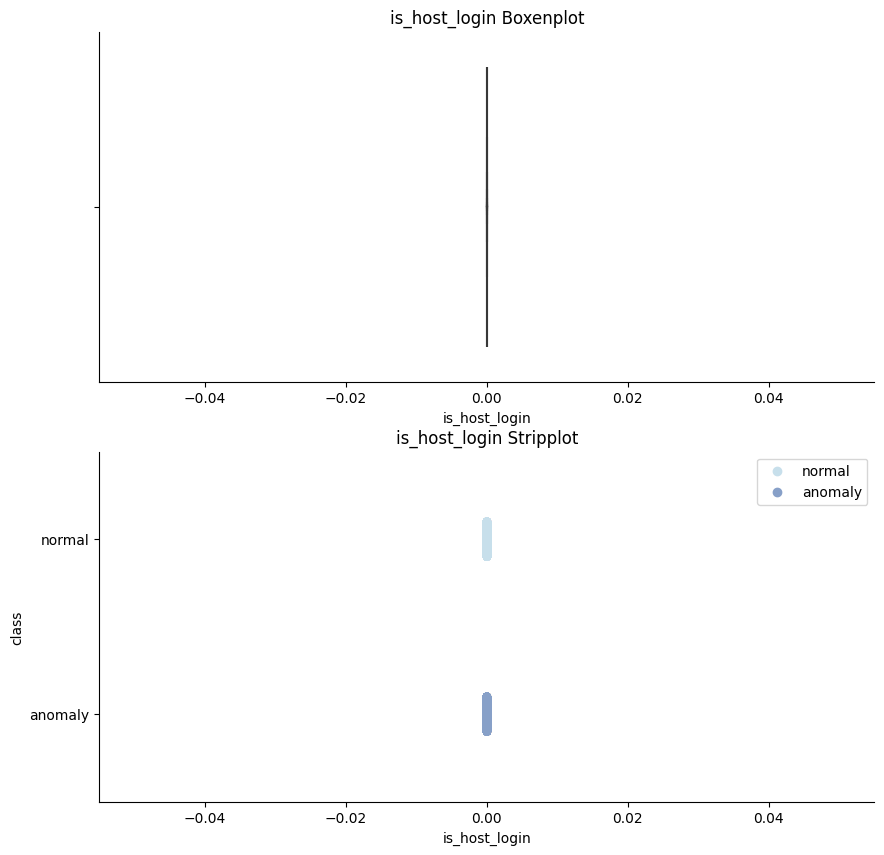

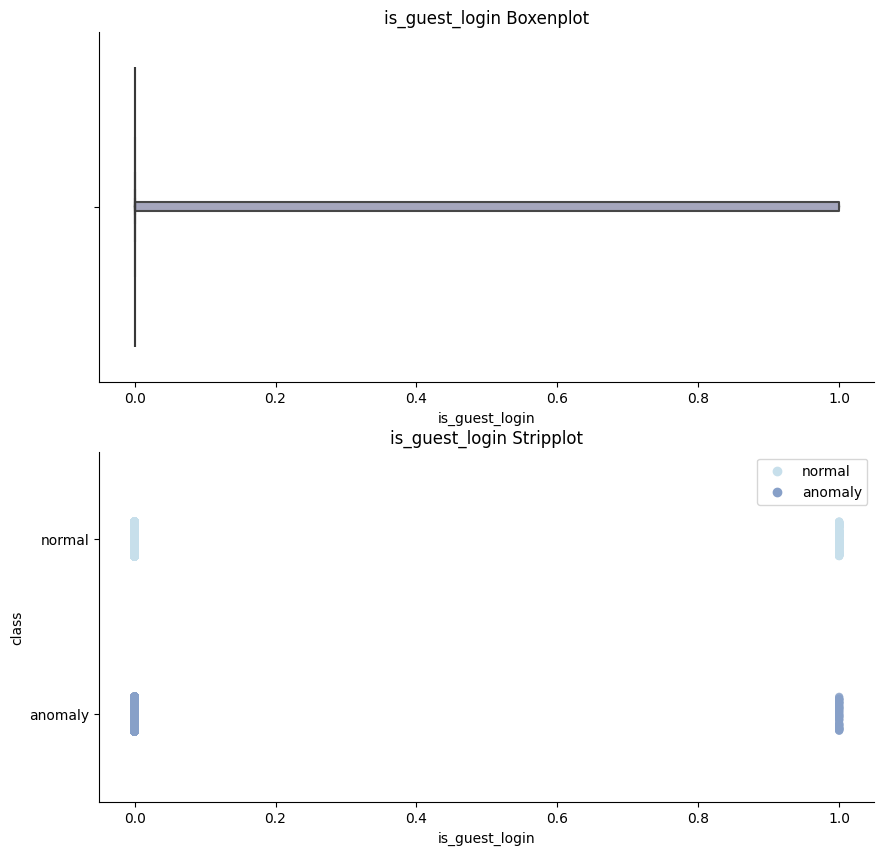

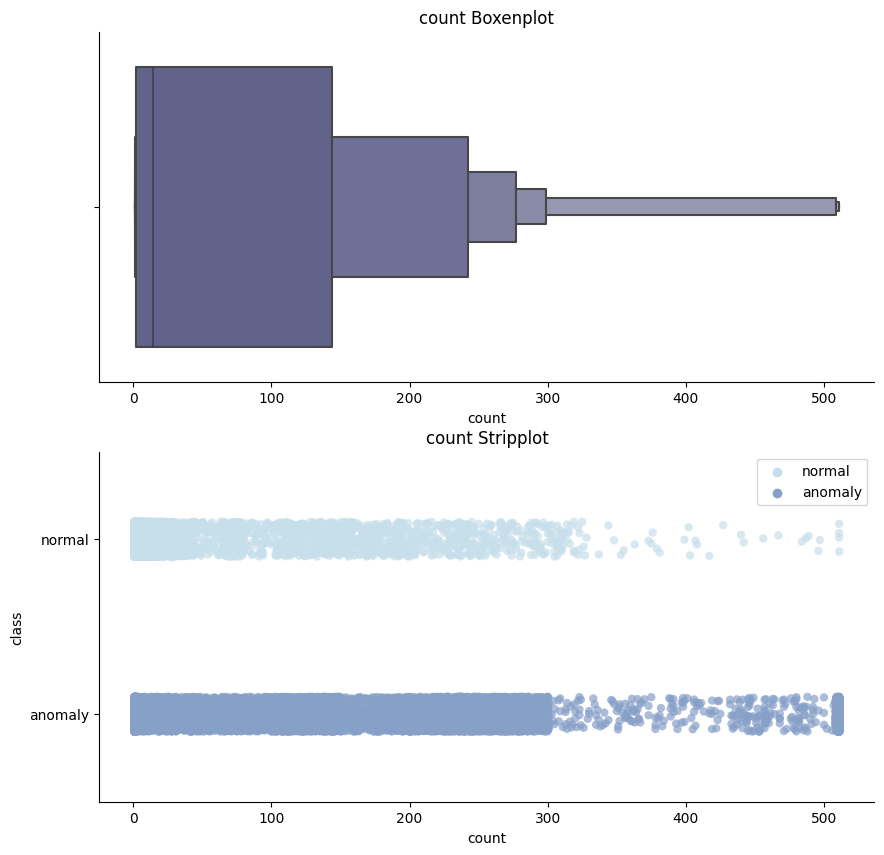

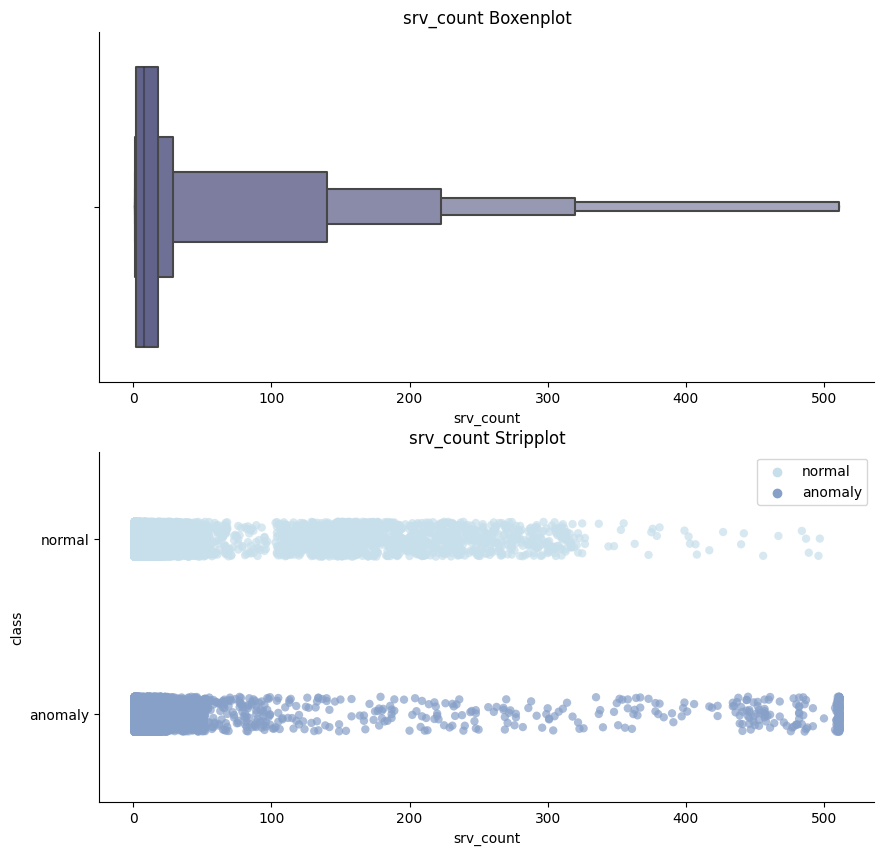

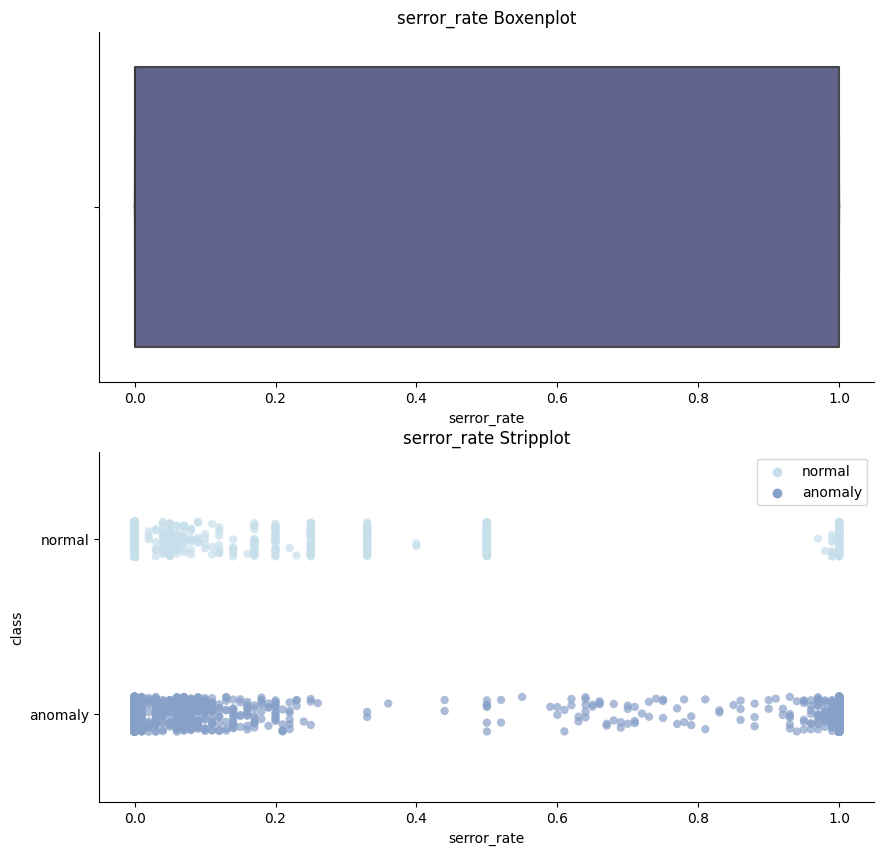

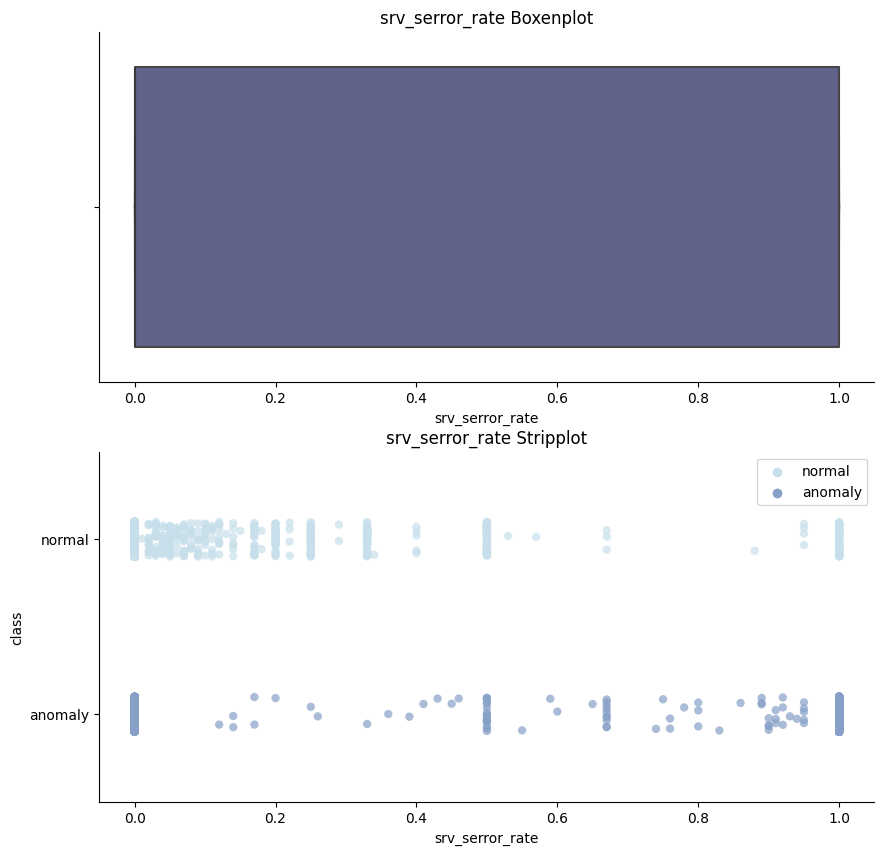

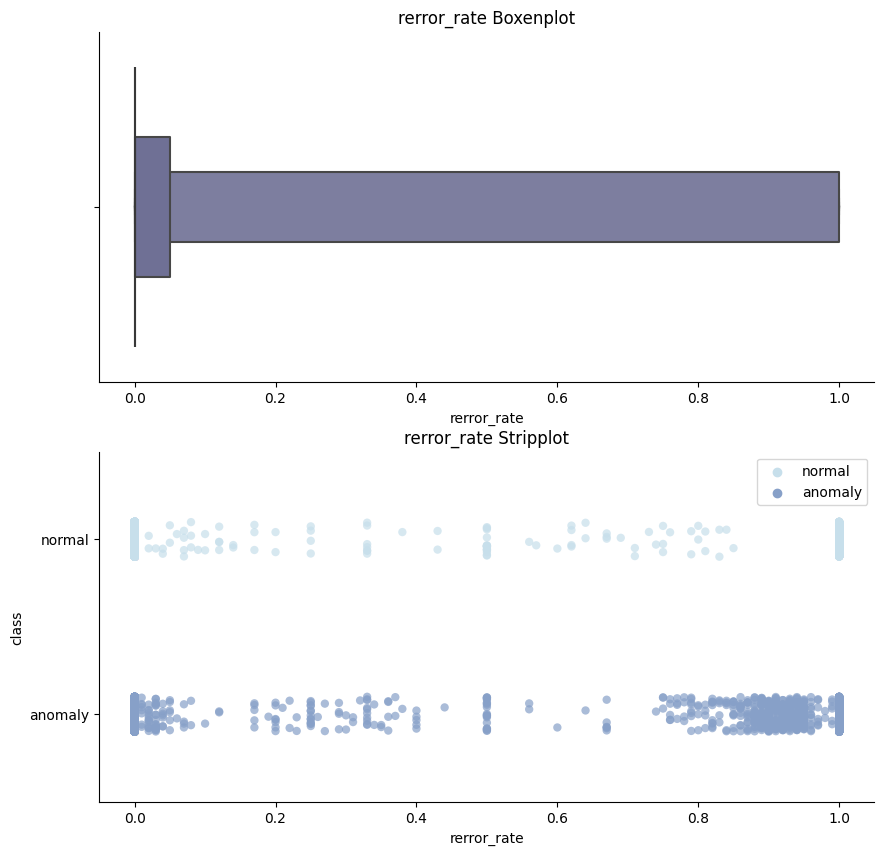

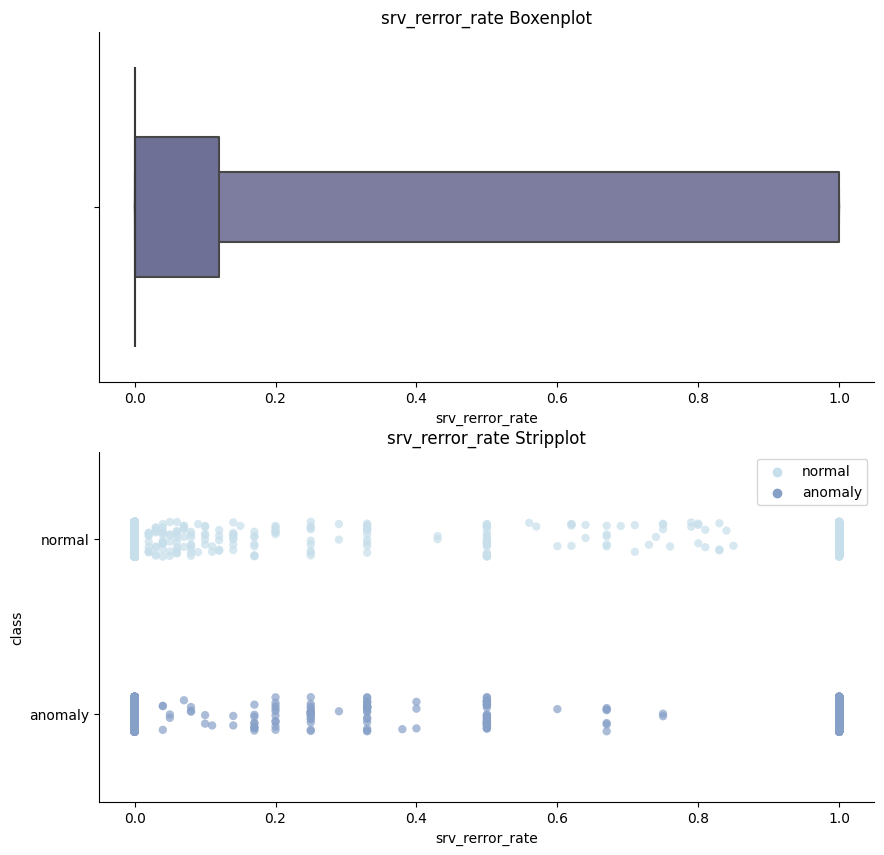

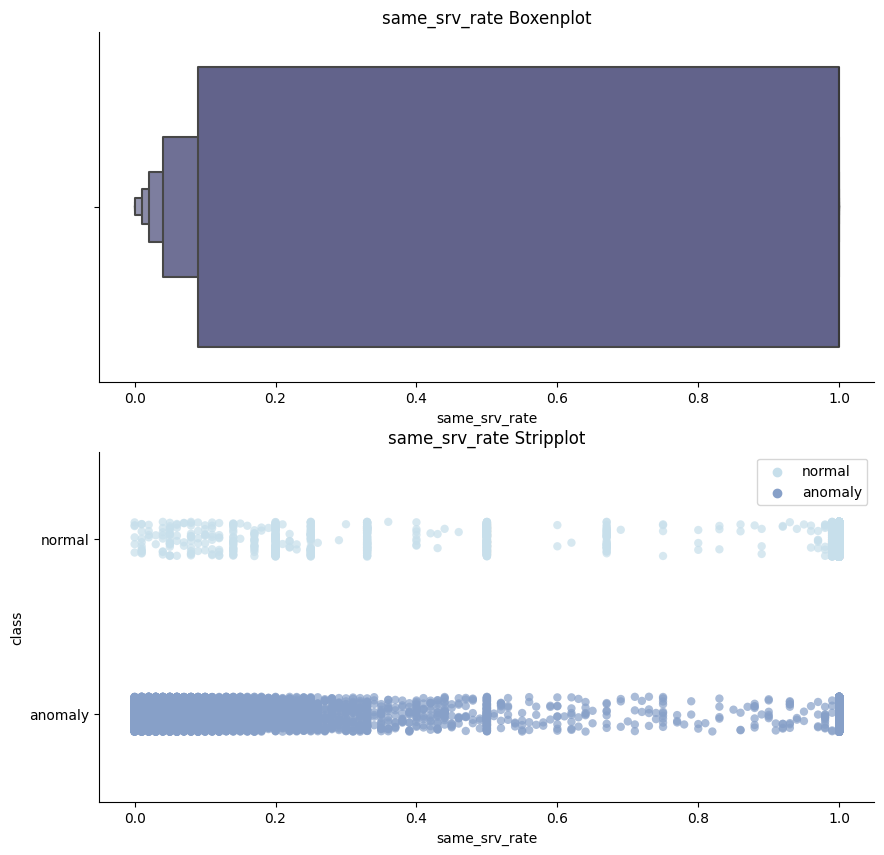

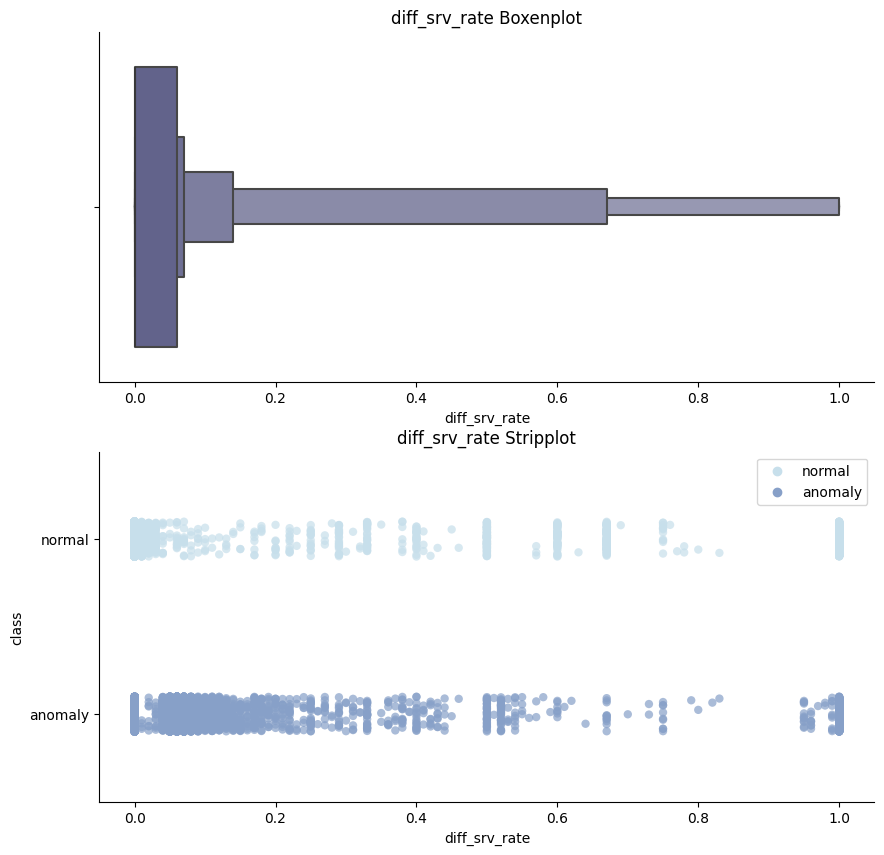

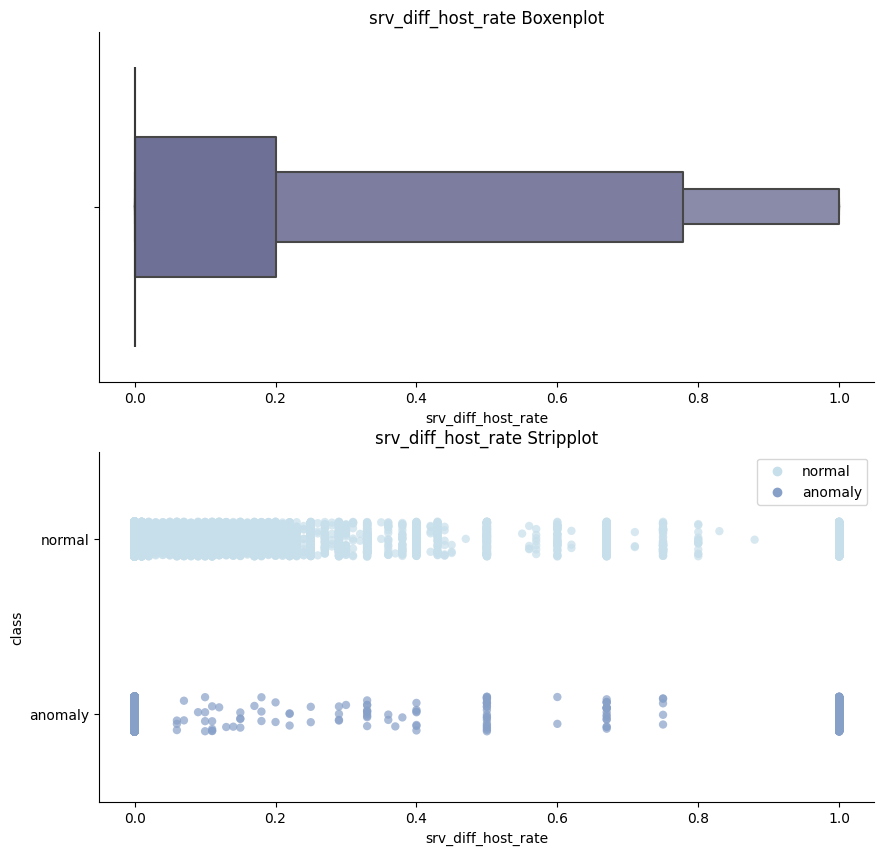

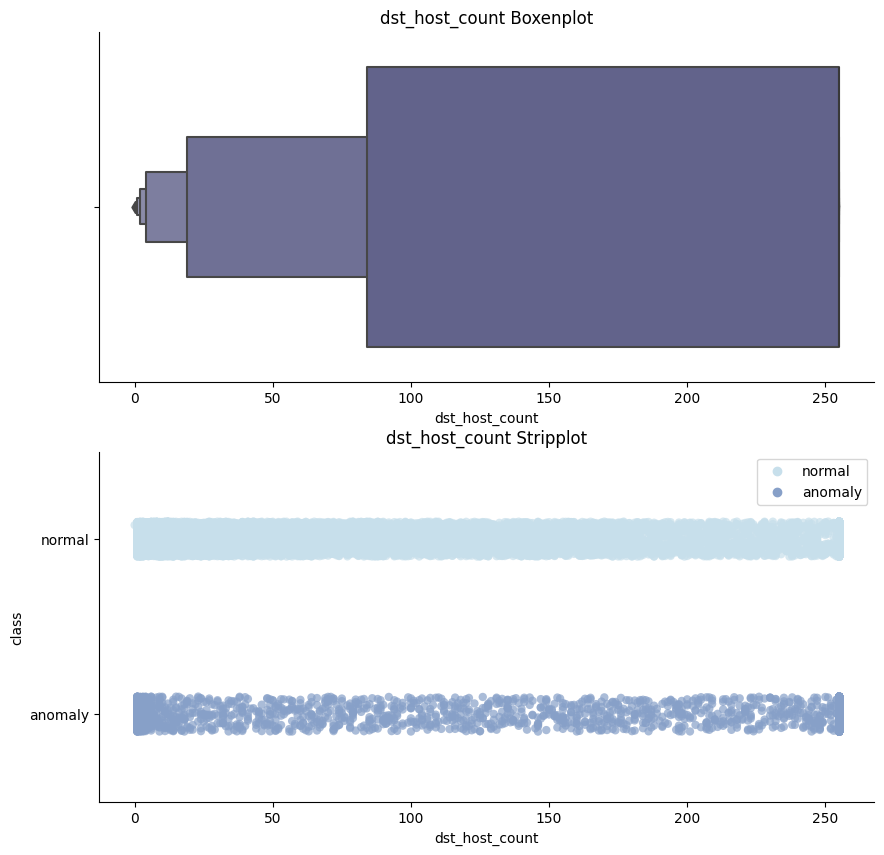

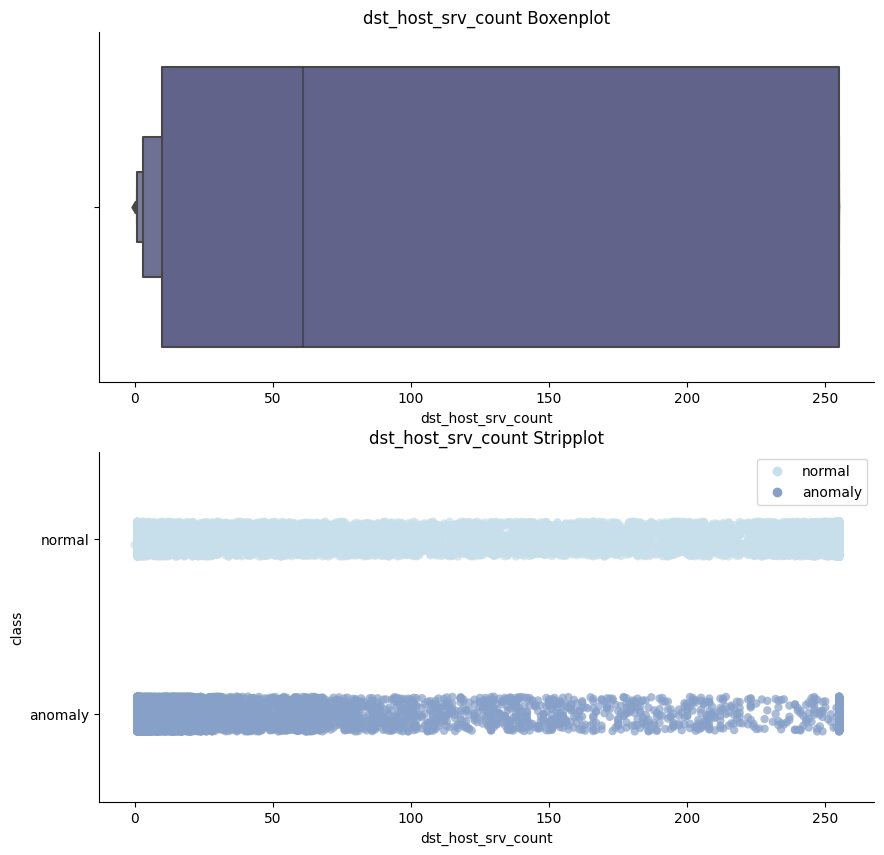

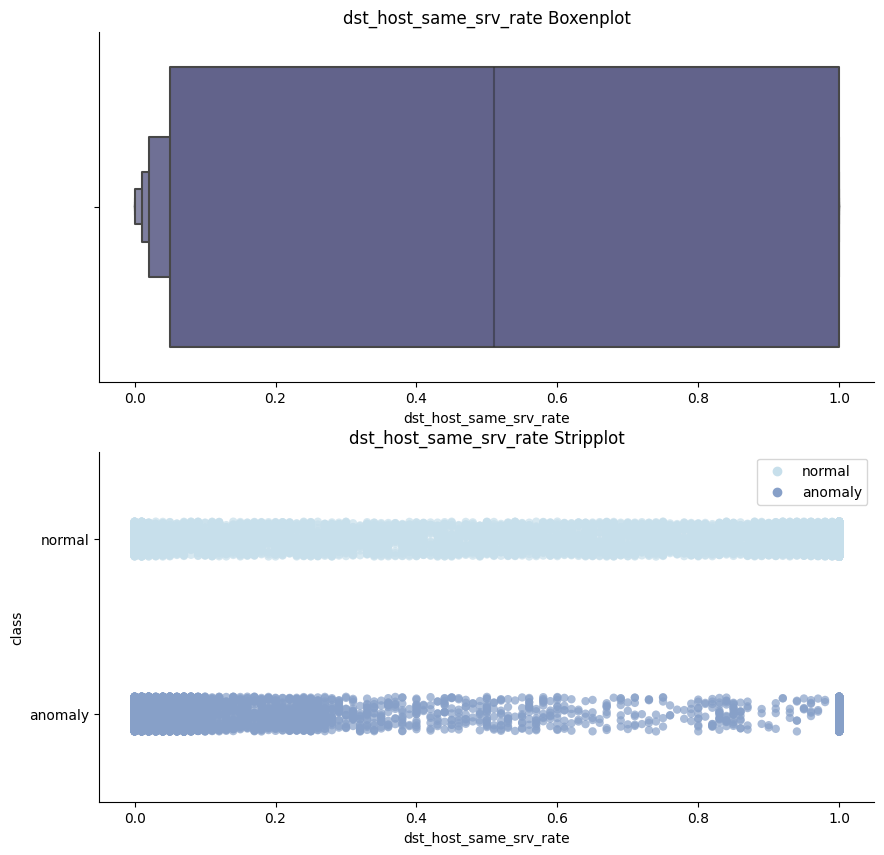

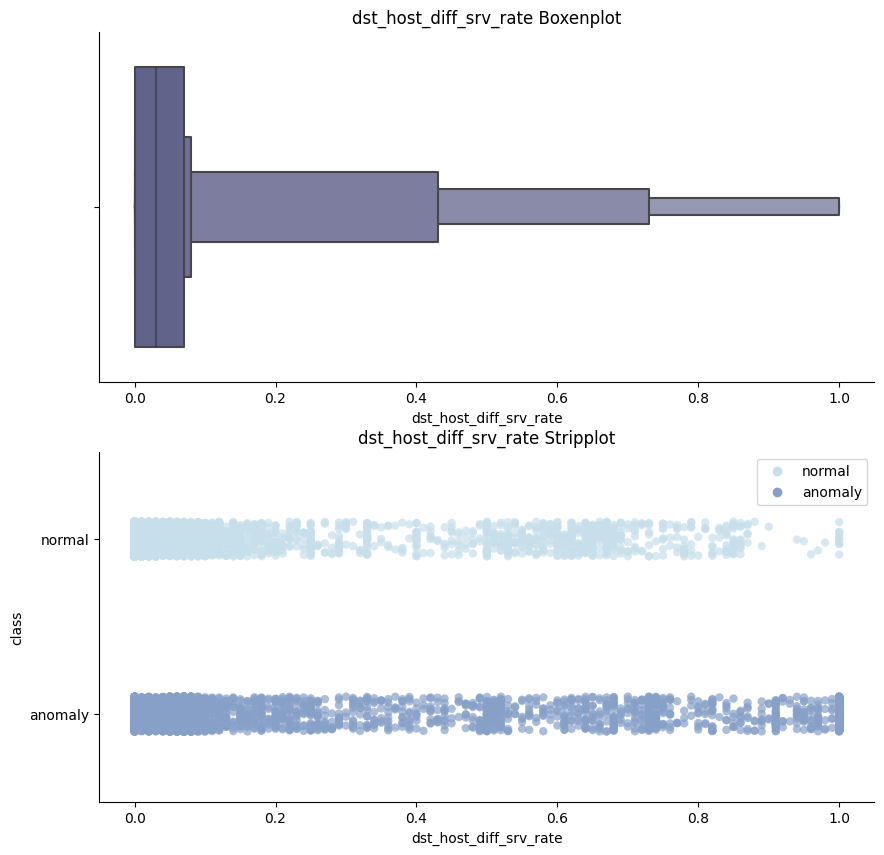

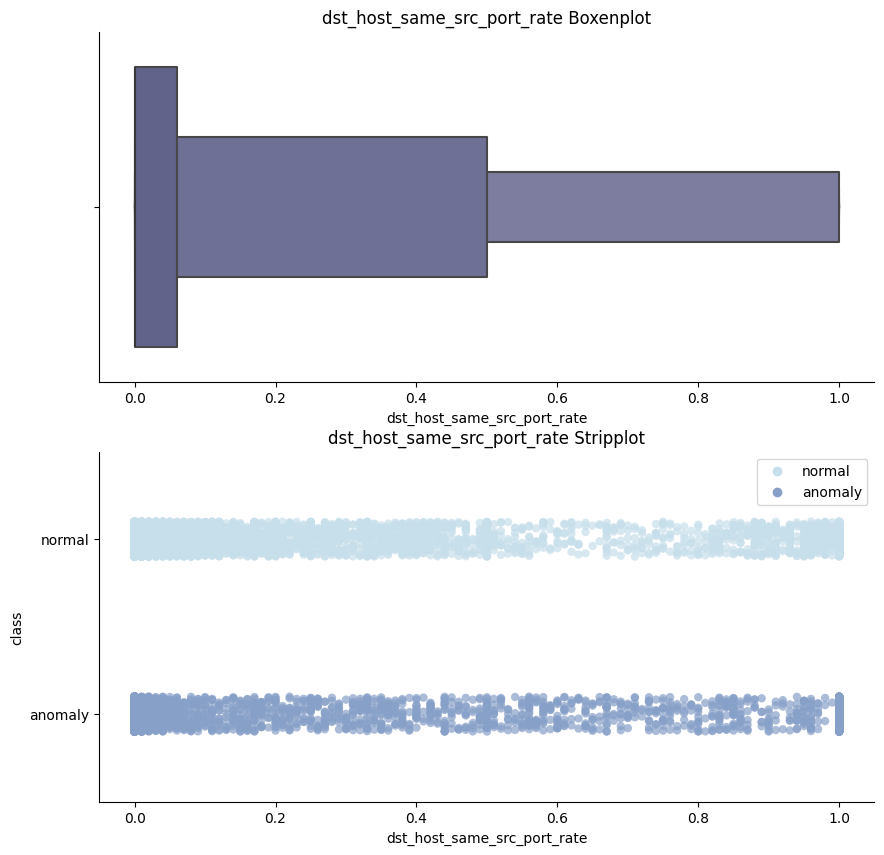

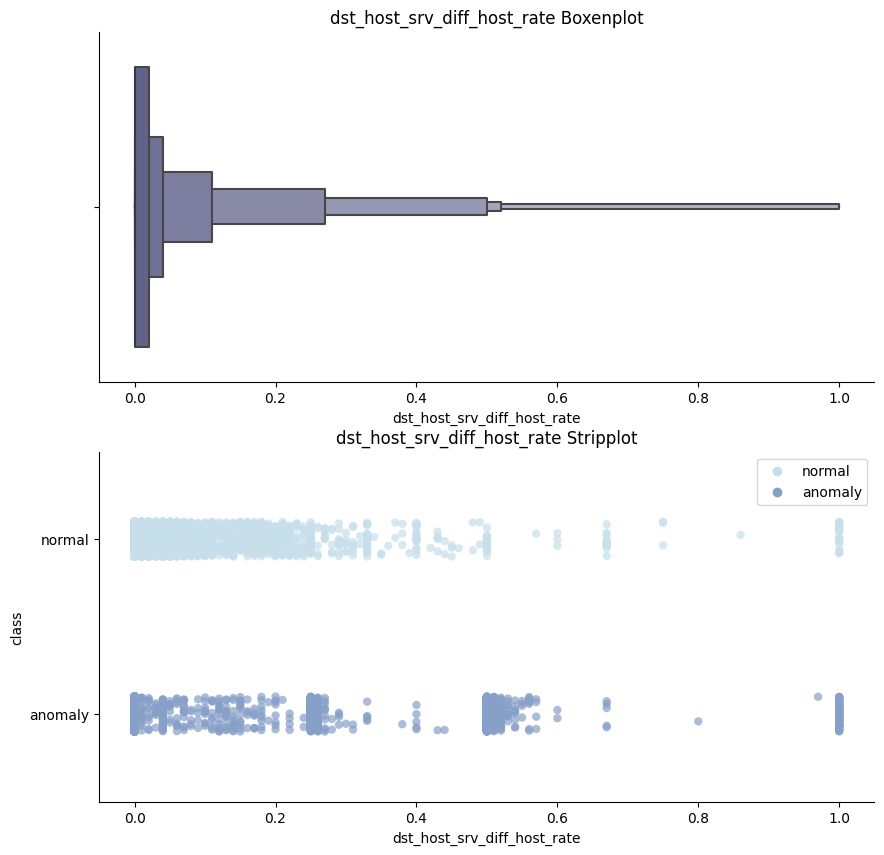

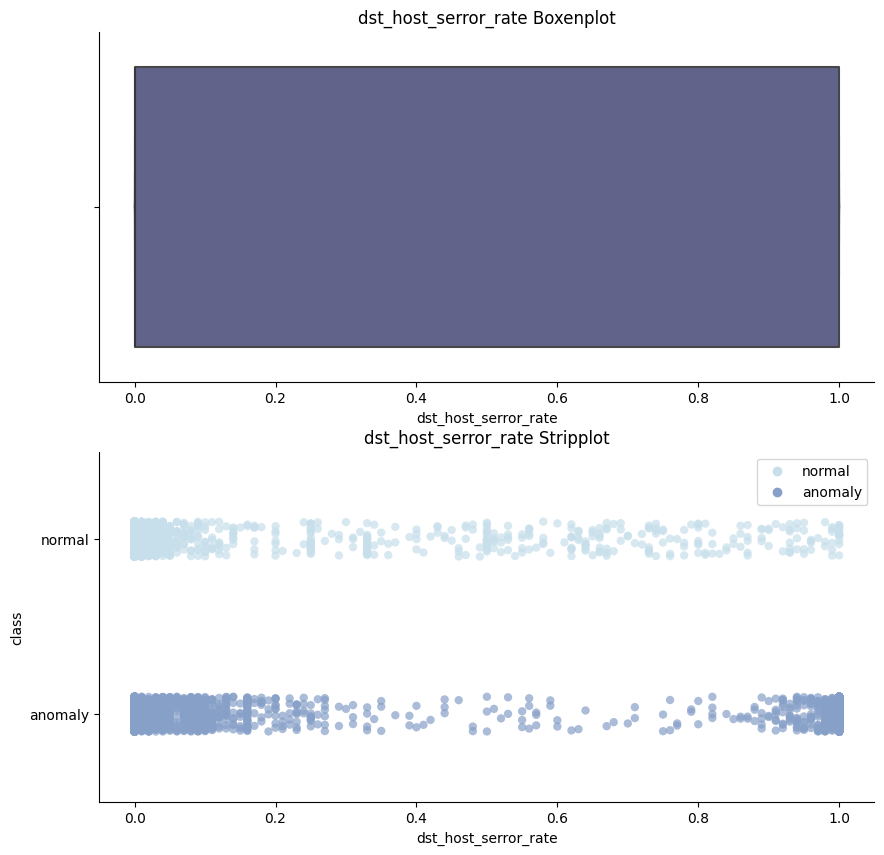

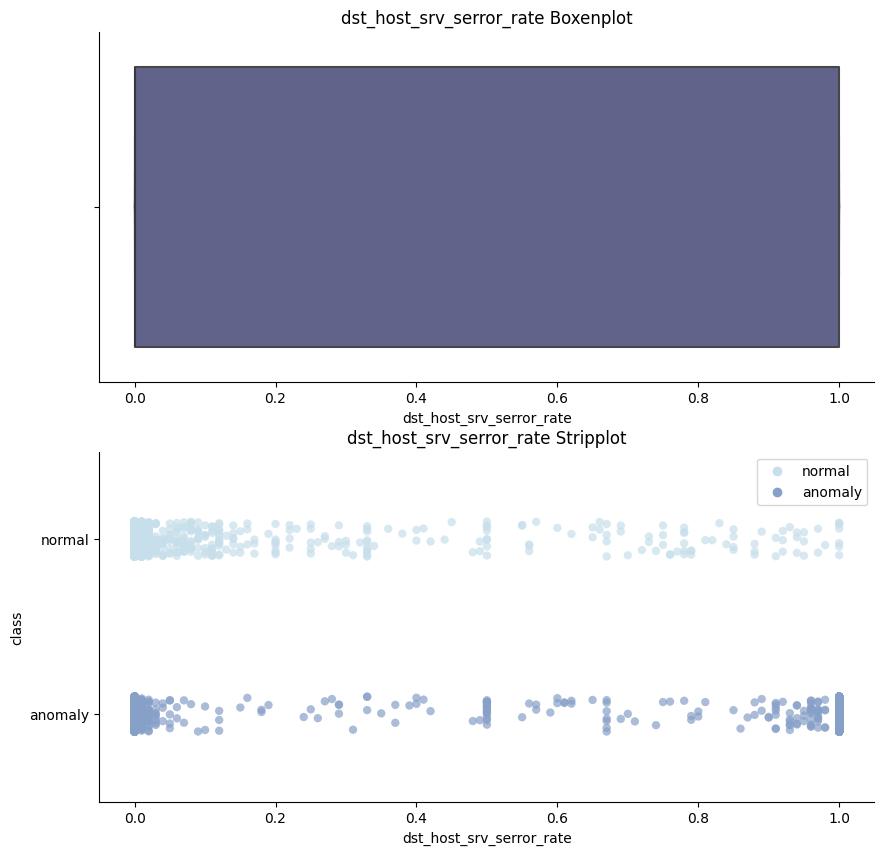

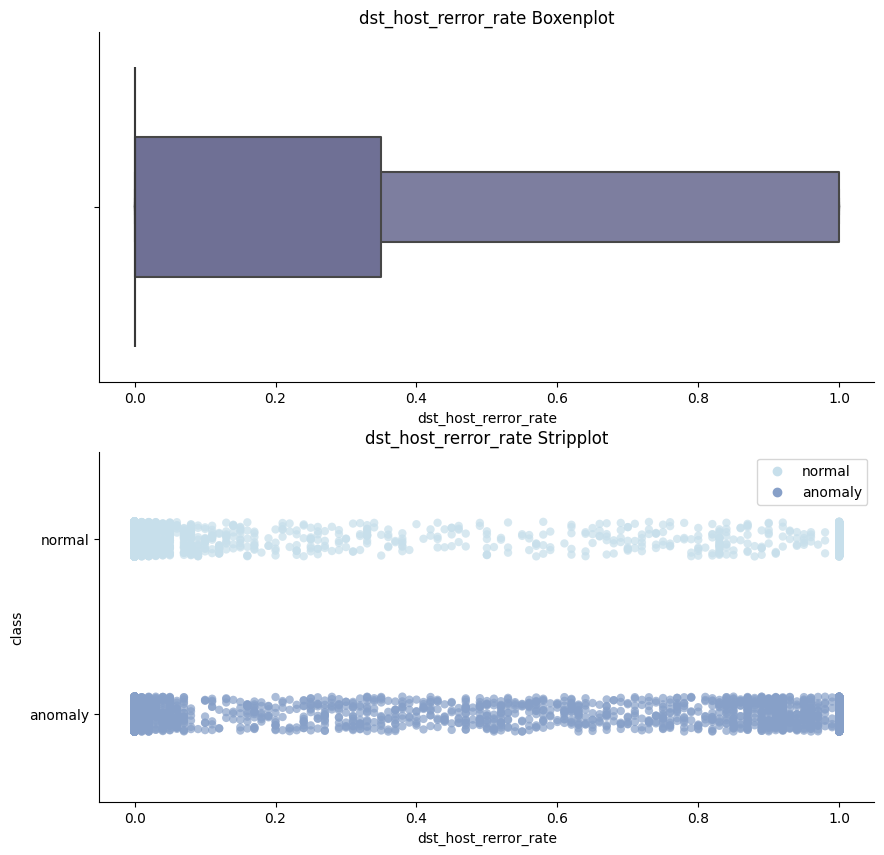

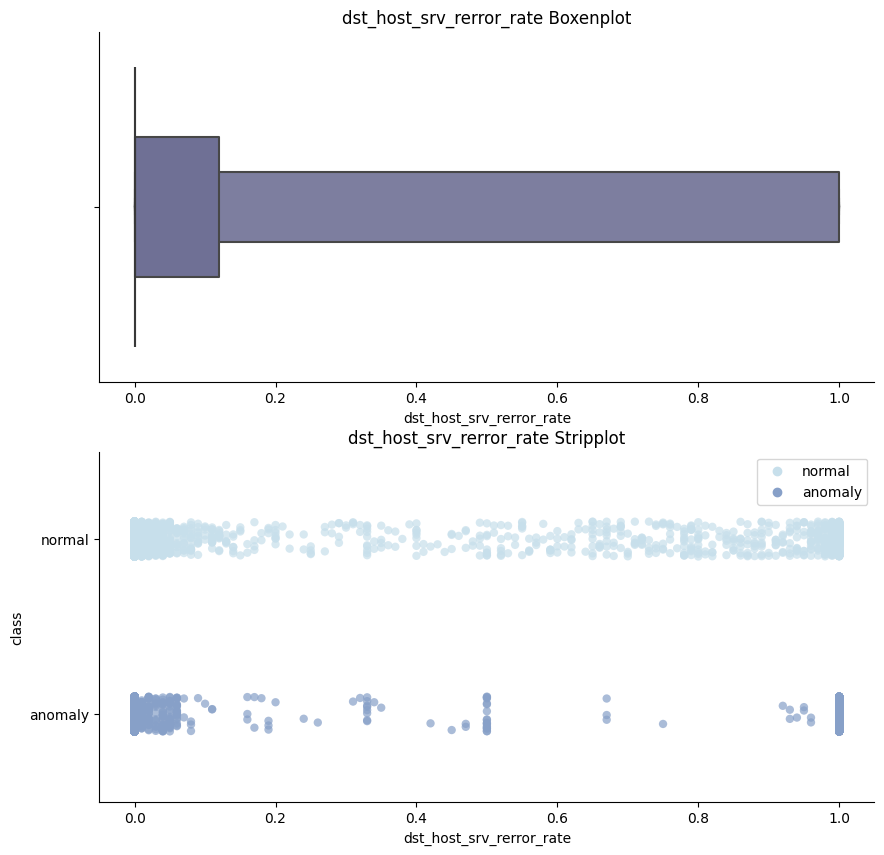

In [ ]:
# Define a custom color palette for the stripplot
custom_palette = sns.color_palette("ch:s=.25,rot=-.25", n_colors=4)

# Iterate over all columns in the training data except the 'class' column
for col in train_data.iloc[:, 1:]:

    # Check if the column is numeric
    if col != 'class' and is_numeric_dtype(train_data[col]):

        # Create a figure with two subplots
        fig, ax = plt.subplots(2, 1, figsize=(10, 10))

        # Create a boxenplot of the column in the first subplot
        g1 = sns.boxenplot(
            x=train_data[col], ax=ax[0], color=custom_palette[2], linewidth=1.5)
        ax[0].set_title(f"{col} Boxenplot")
        ax[0].set_xlabel(col)
        ax[0].spines['top'].set_visible(False)
        ax[0].spines['right'].set_visible(False)

        # Create a stripplot of the column in the second subplot
        # The stripplot shows the distribution of the column values for each class in the 'class' column
        g2 = sns.stripplot(x=train_data[col], y=train_data['class'], ax=ax[1],
                           hue=train_data['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)
        ax[1].set_title(f"{col} Stripplot")
        ax[1].set_xlabel(col)
        ax[1].set_ylabel("class")
        ax[1].spines['top'].set_visible(False)
        ax[1].spines['right'].set_visible(False)
        g2.legend(loc='upper right')

        # Show the plot
        plt.show()

In [ ]:
# This code calculates the percentage of missing values in each column of the train_data dataframe.
# It first creates a list of columns with missing values, then iterates over each column in the list.
# For each column, it calculates the number of missing values and the percentage of missing values.
# It then prints the column name, number of missing values, and percentage of missing values.
# This information can be used to decide how to handle missing values in each column.
total = train_data.shape[0]
missing_columns = [
    col for col in train_data.columns if train_data[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train_data[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [ ]:
print(f"Number of duplicate rows: {train_data.duplicated().sum()}")

Number of duplicate rows: 0


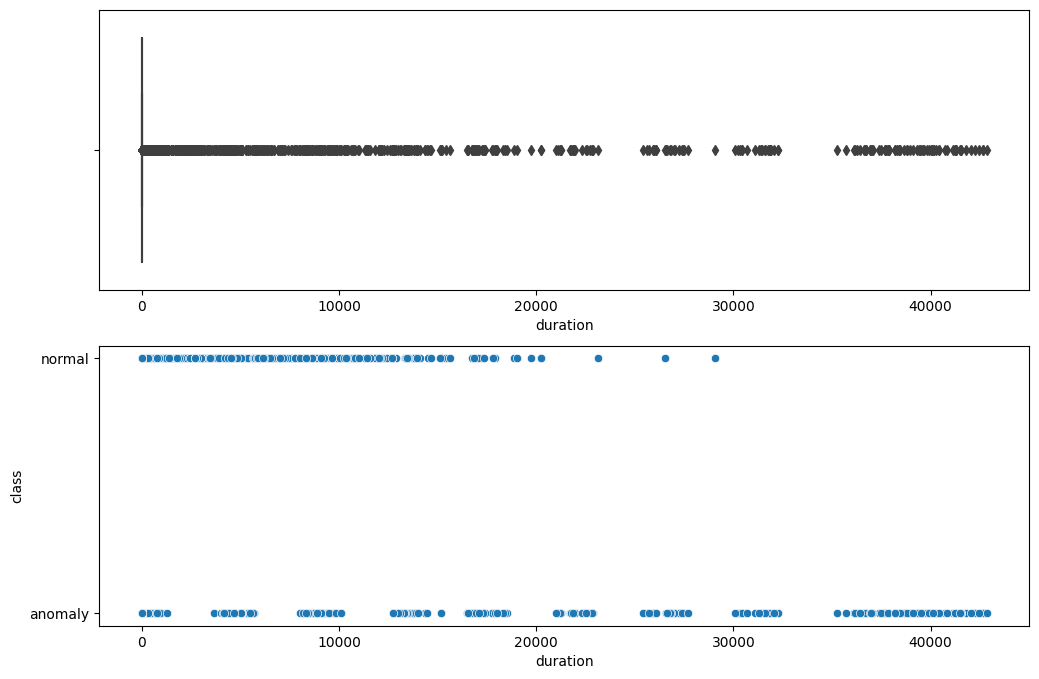

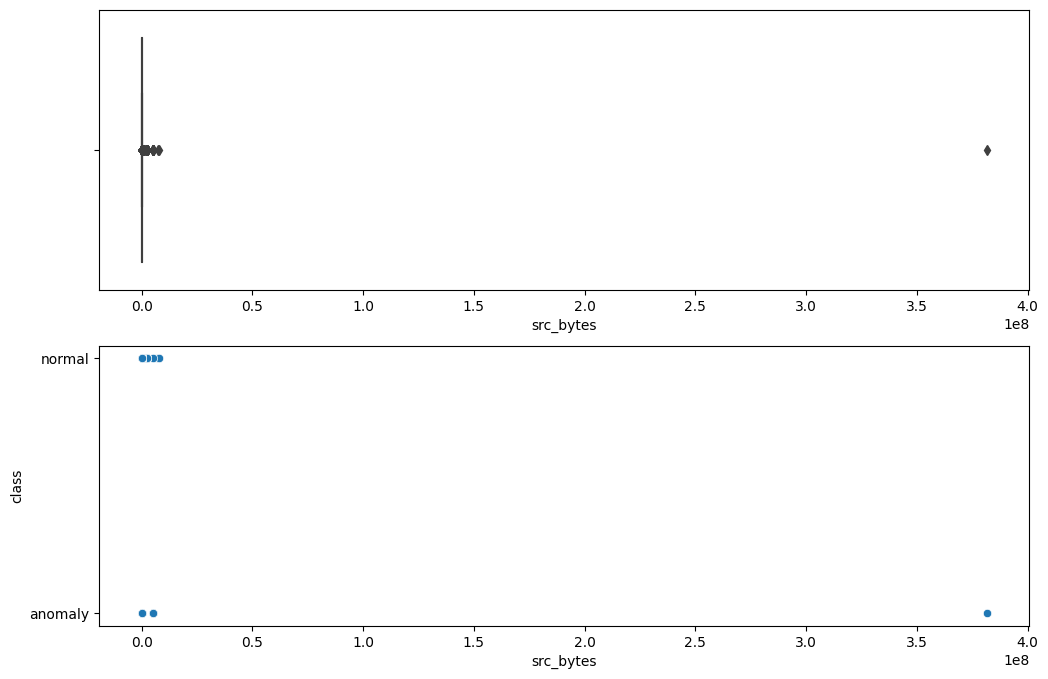

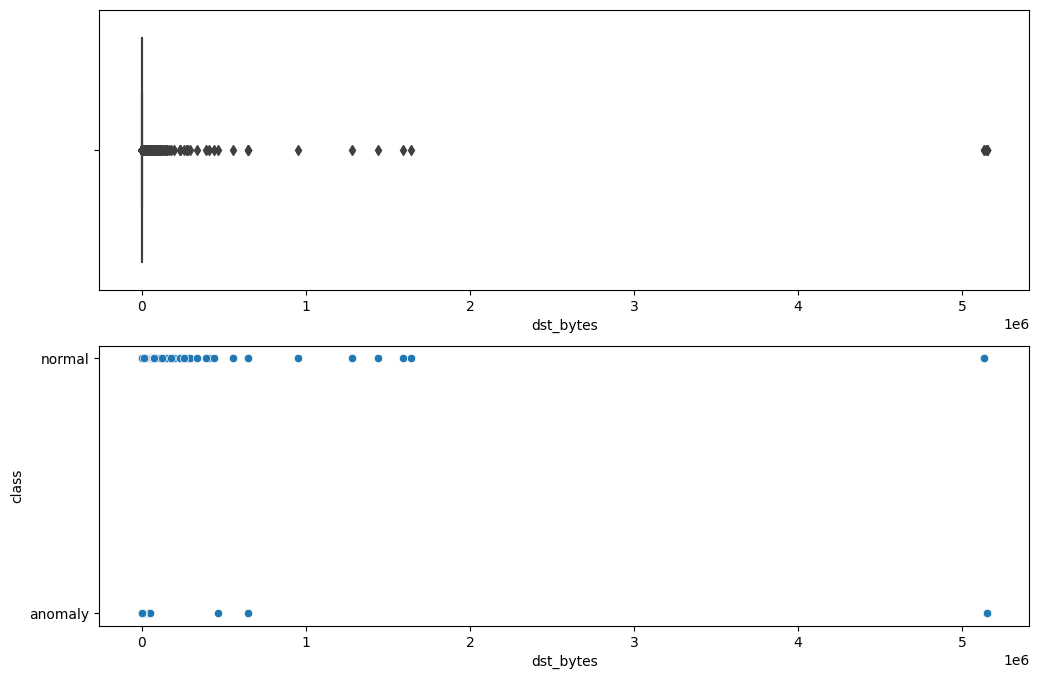

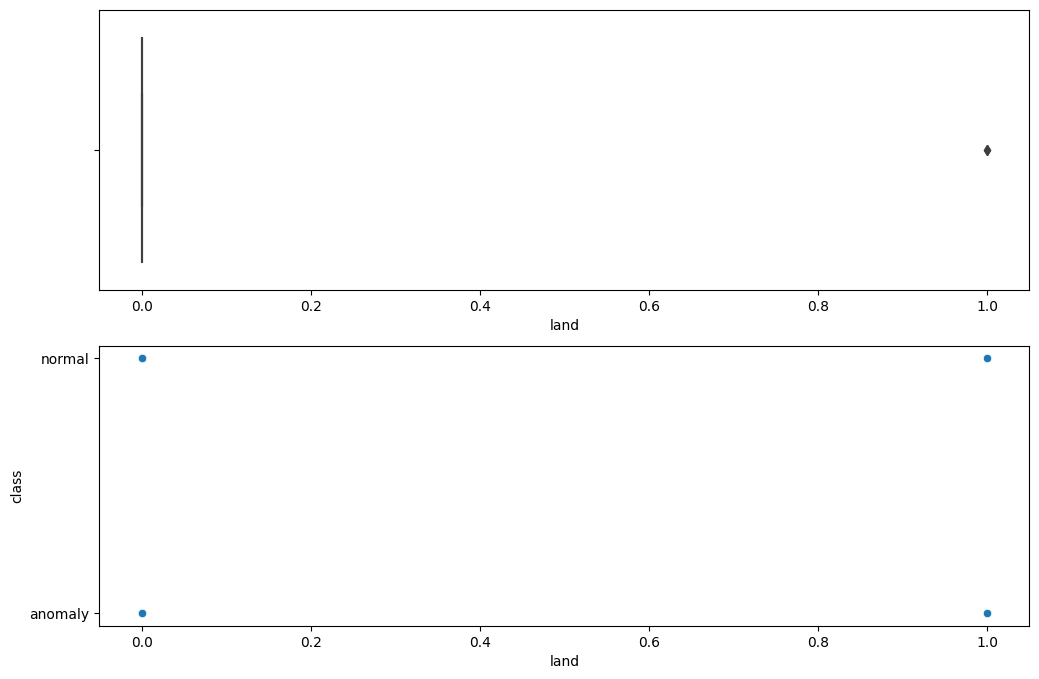

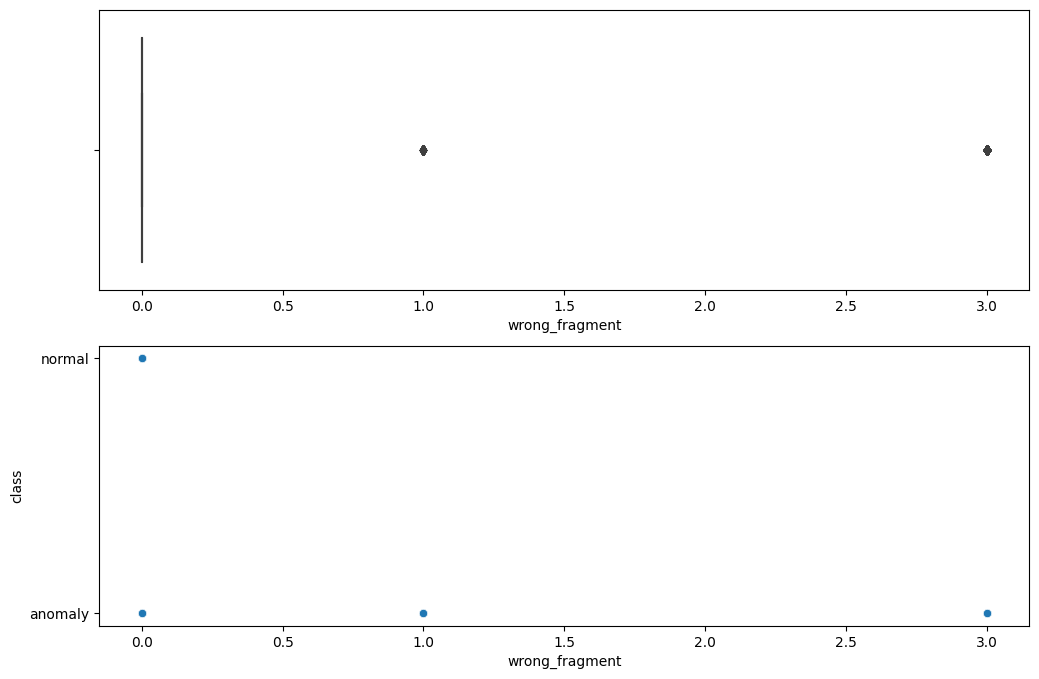

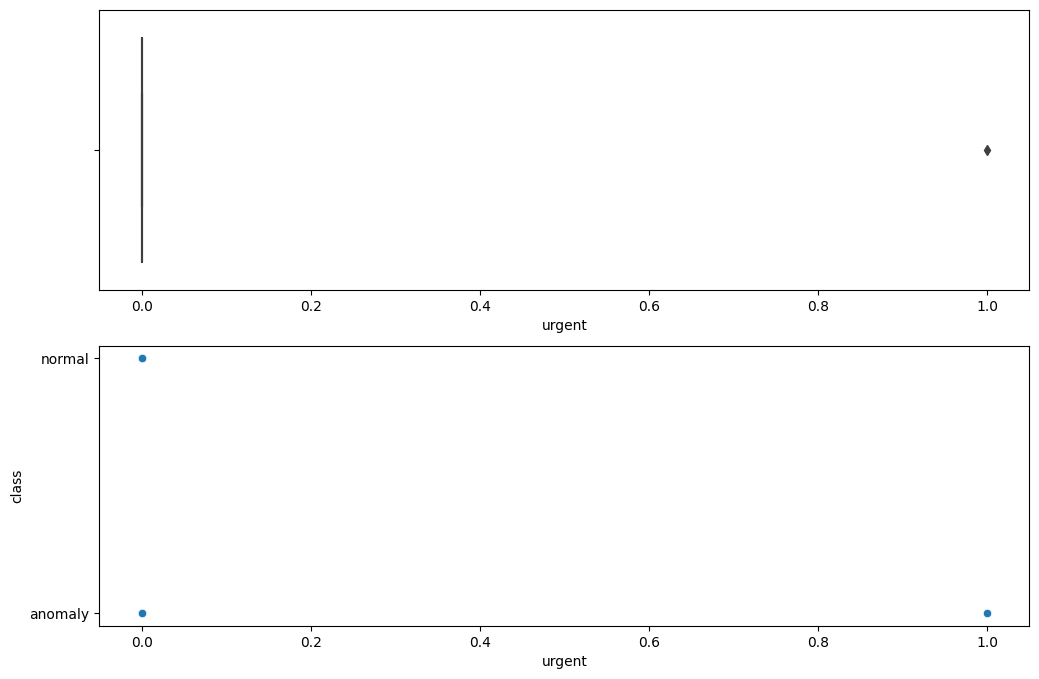

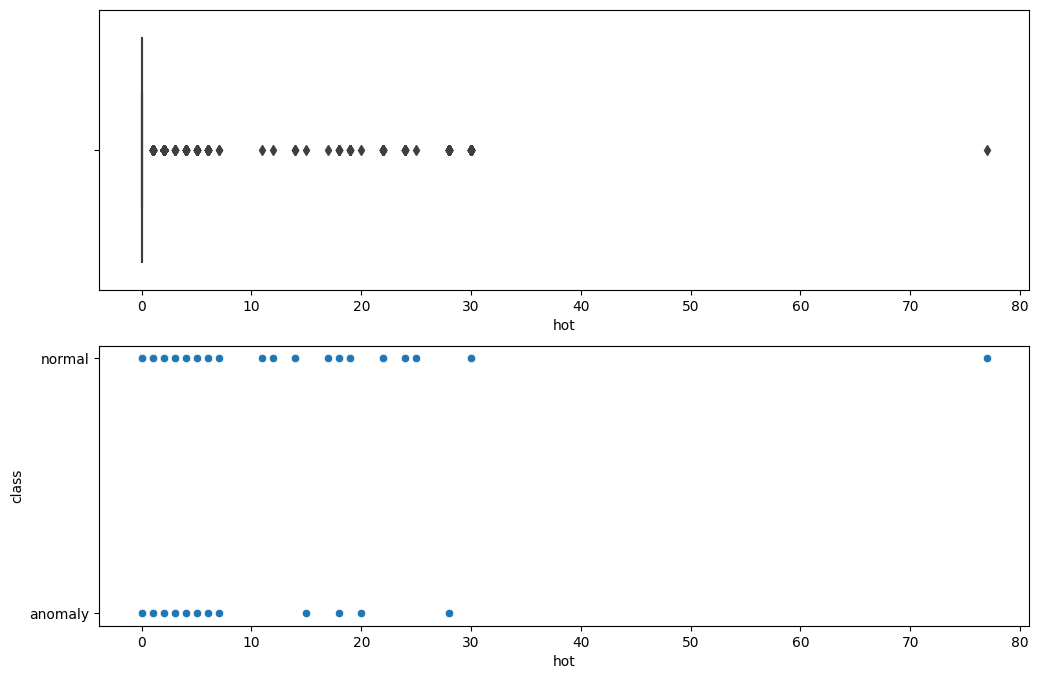

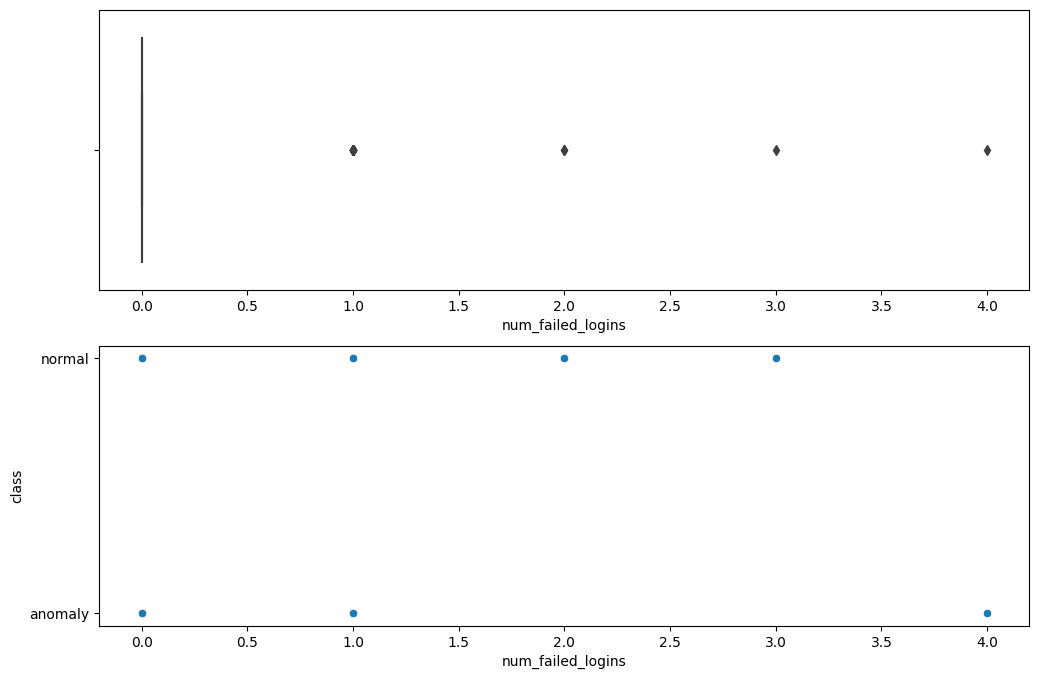

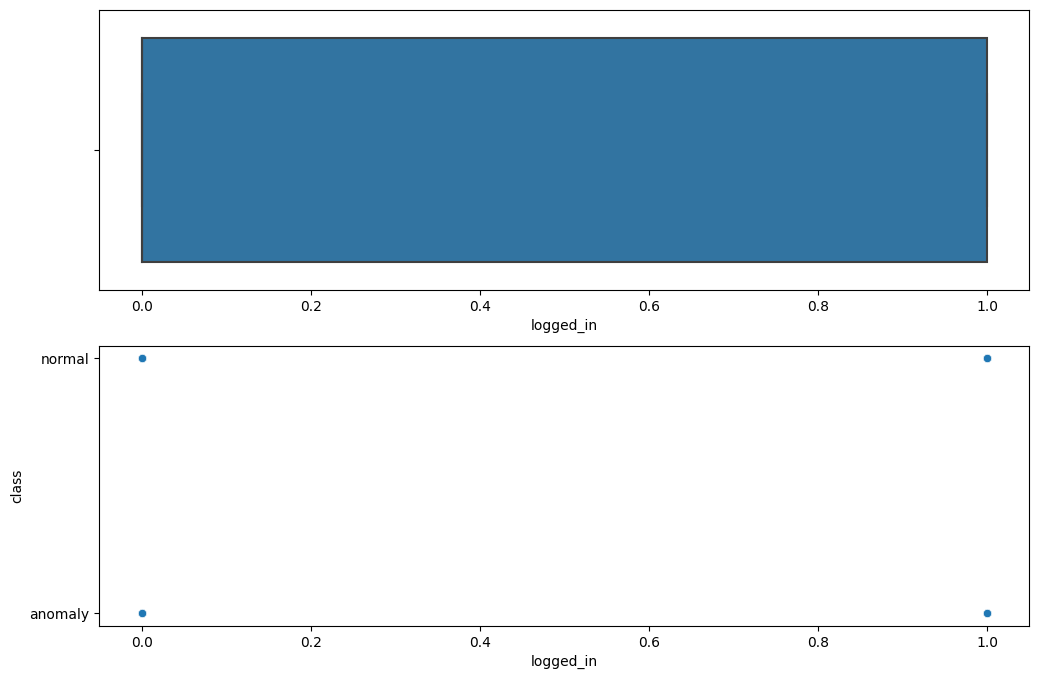

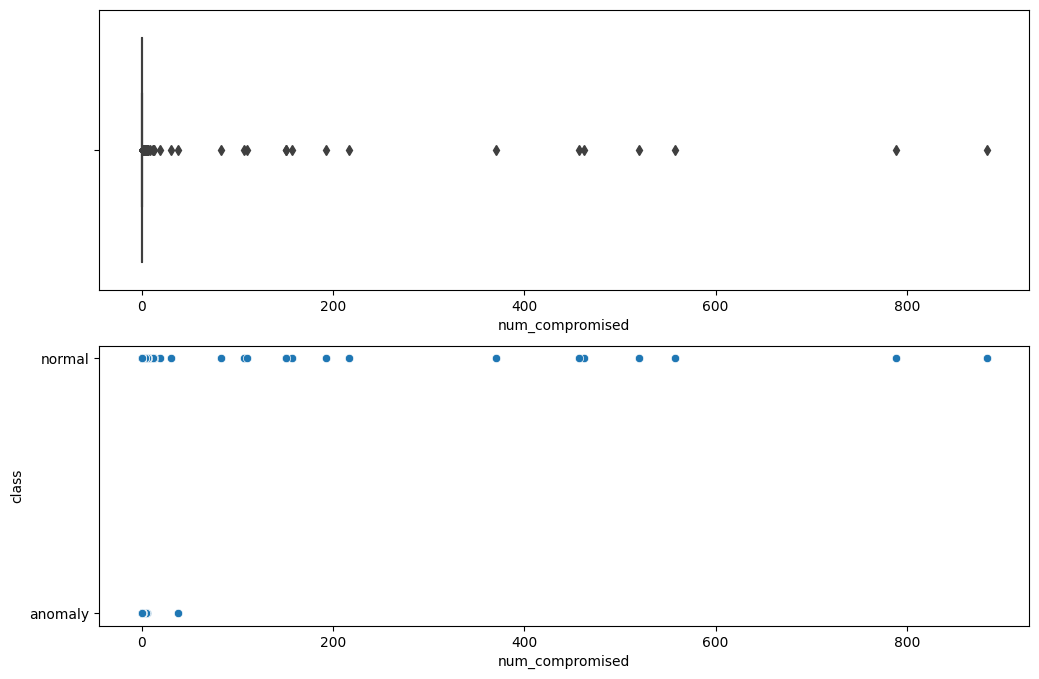

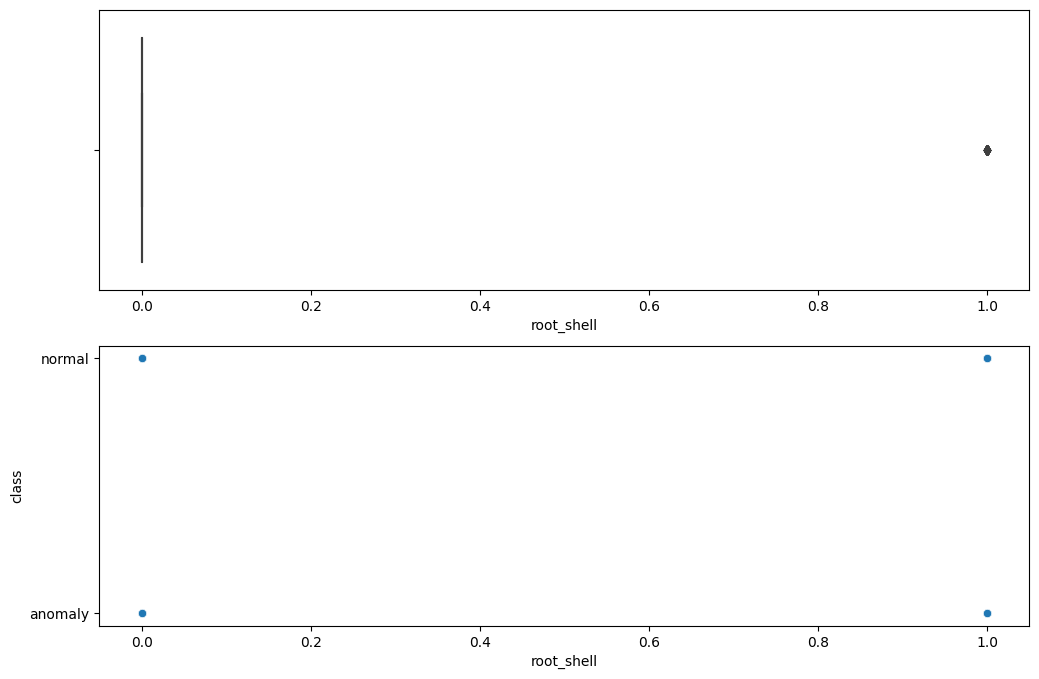

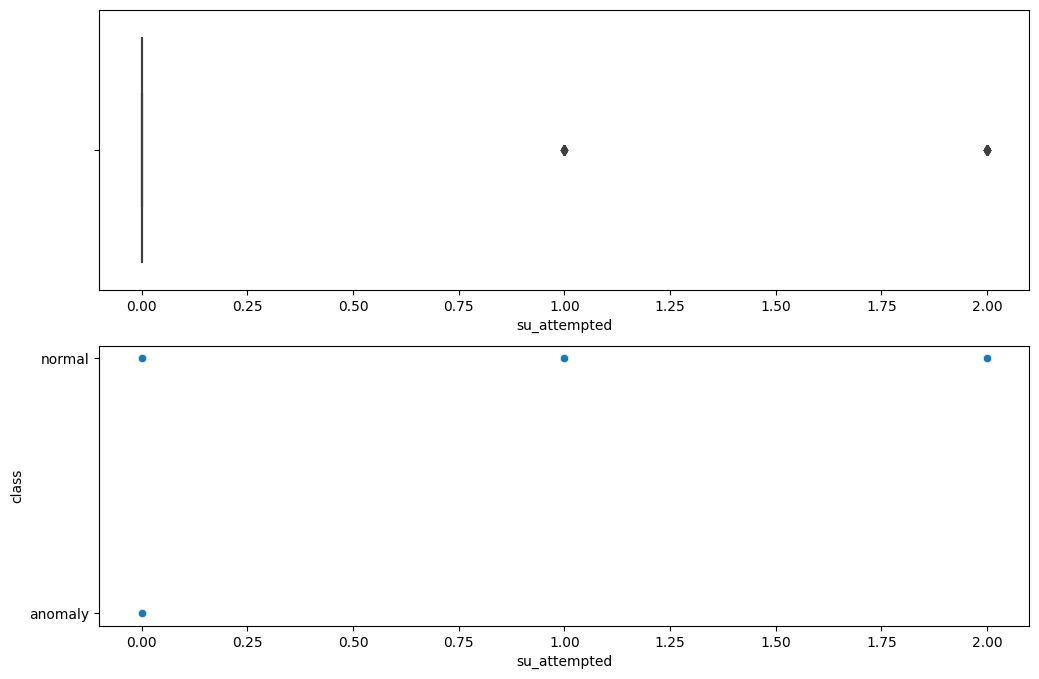

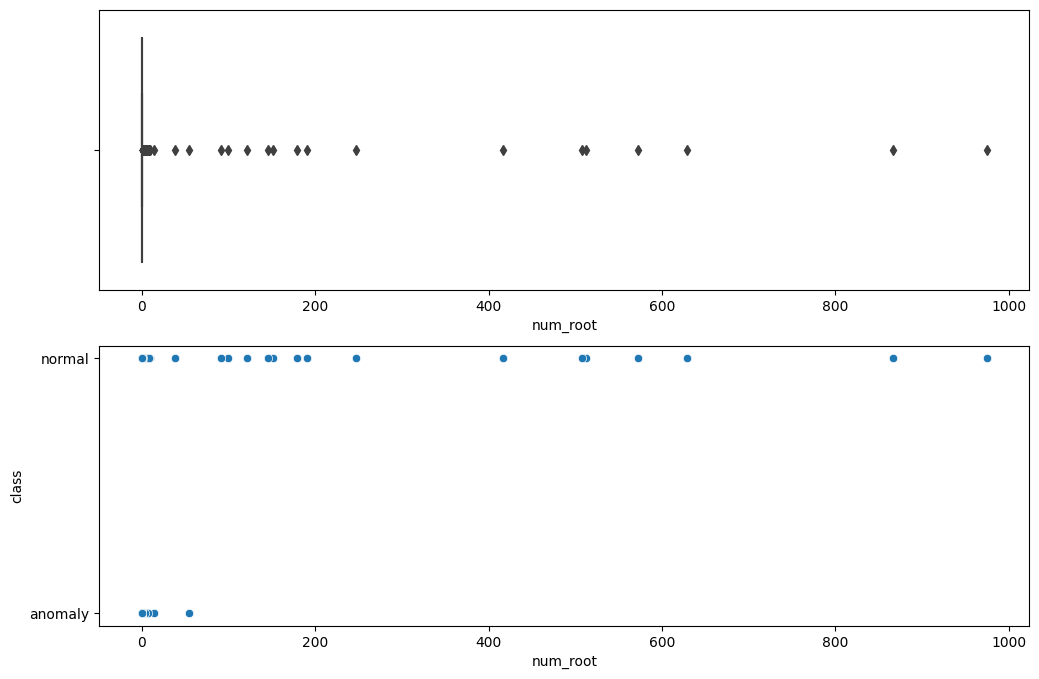

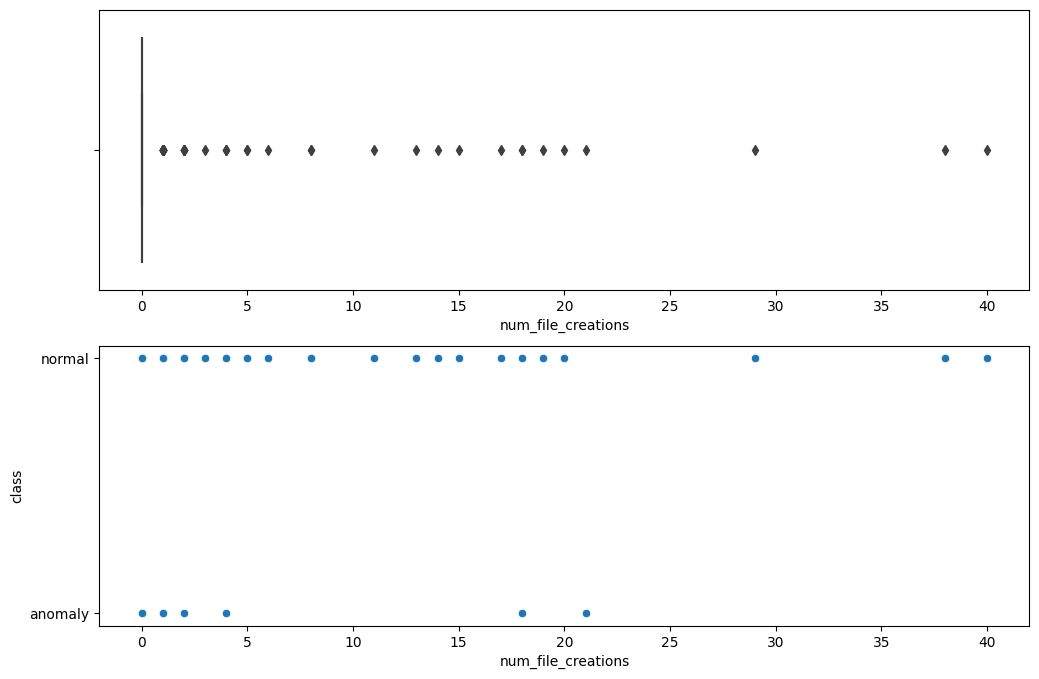

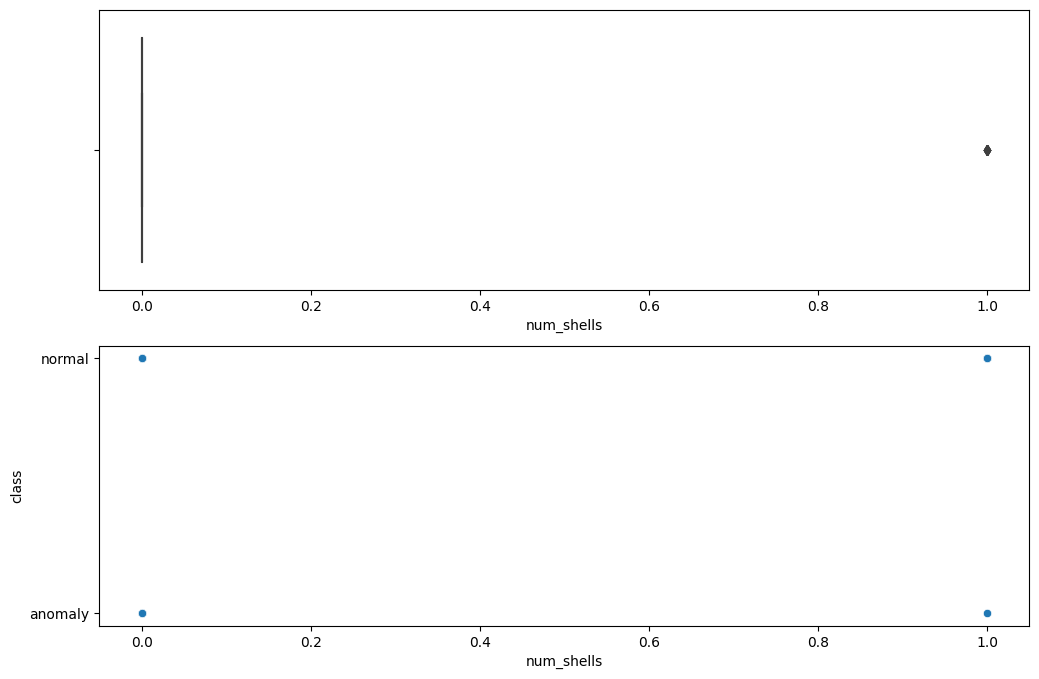

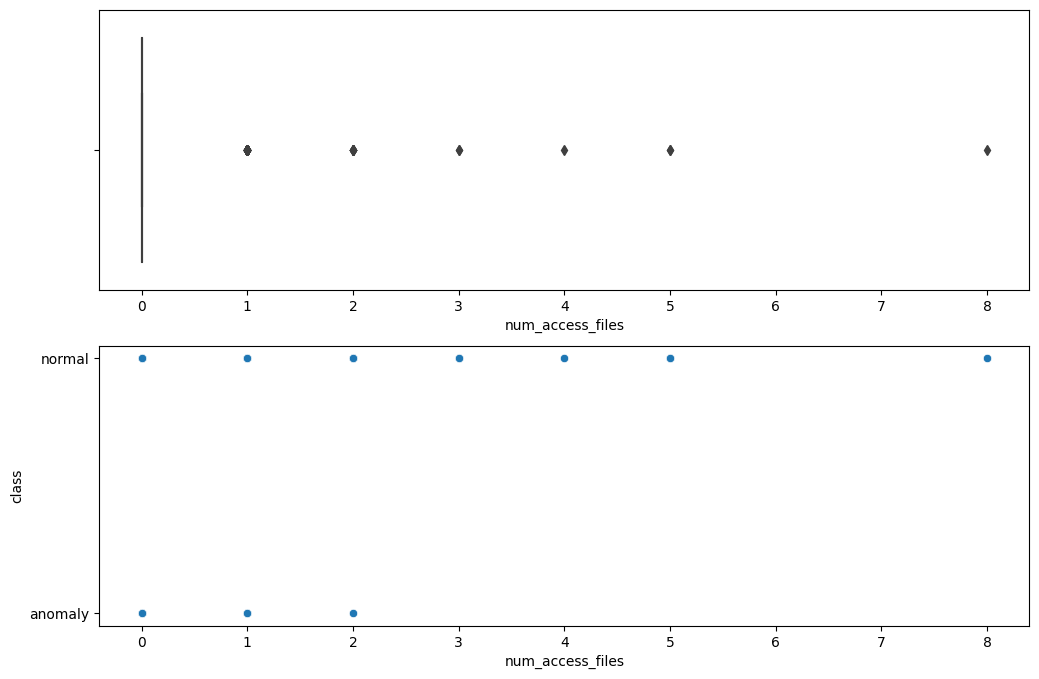

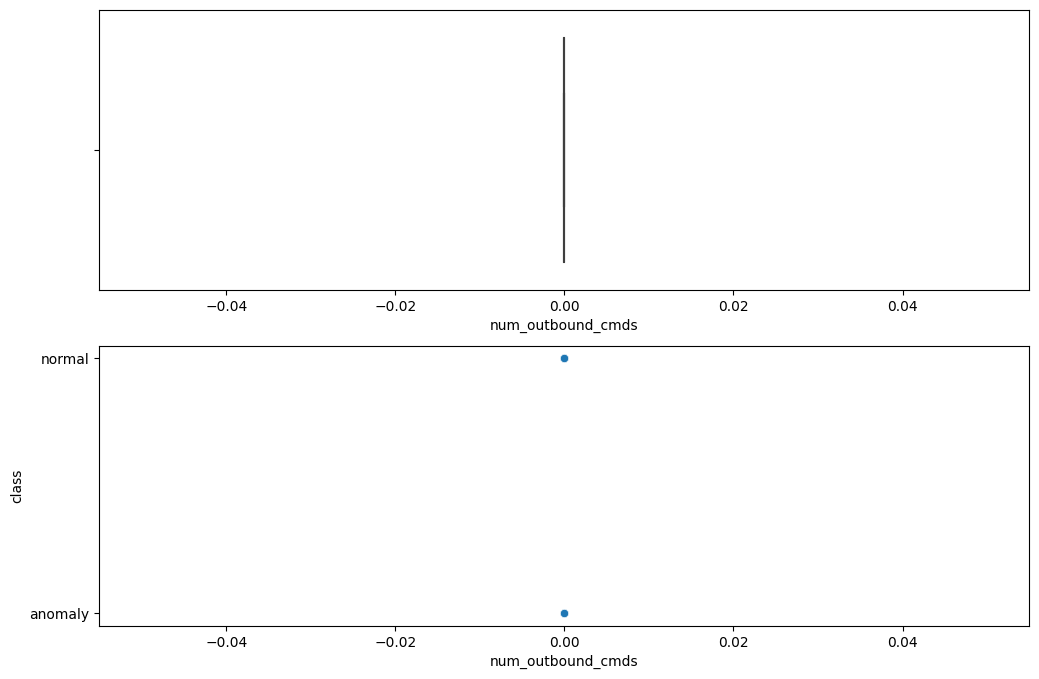

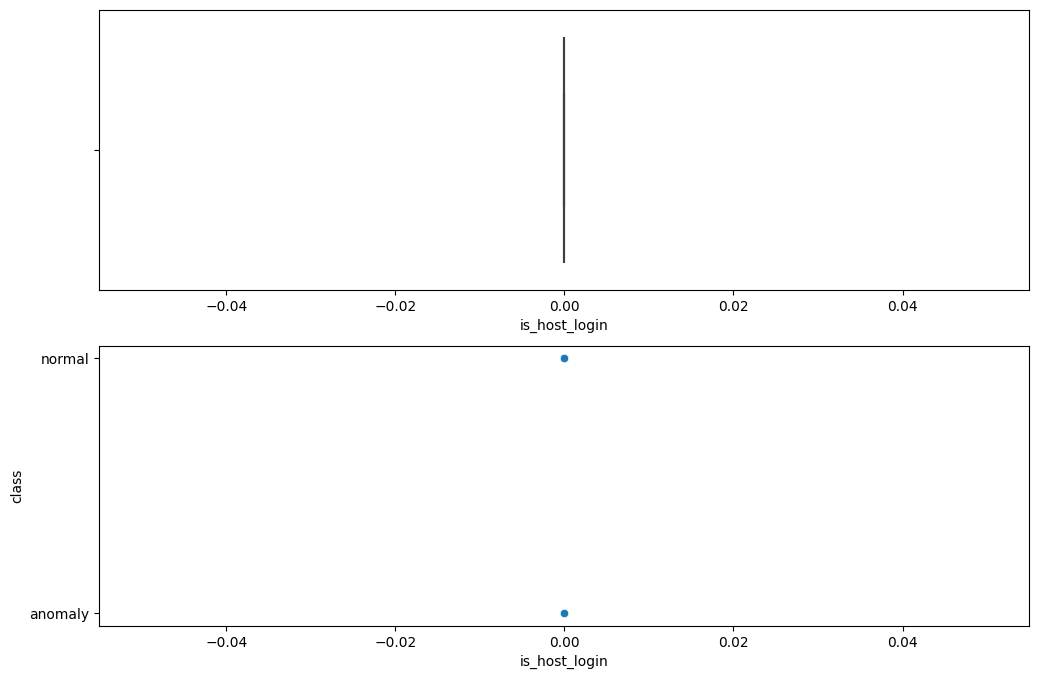

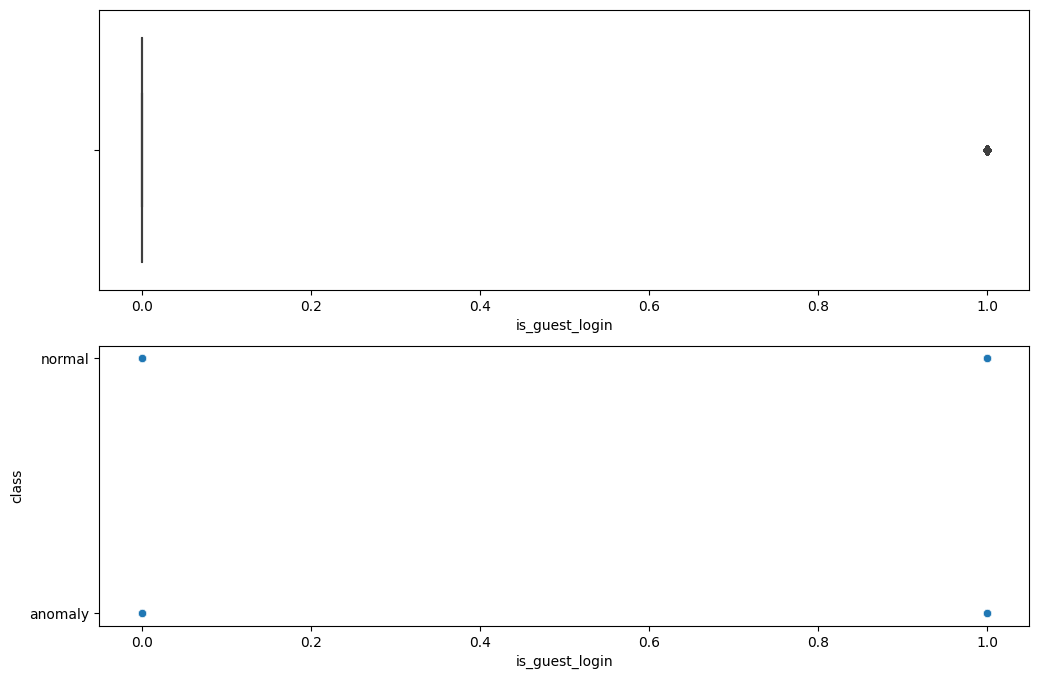

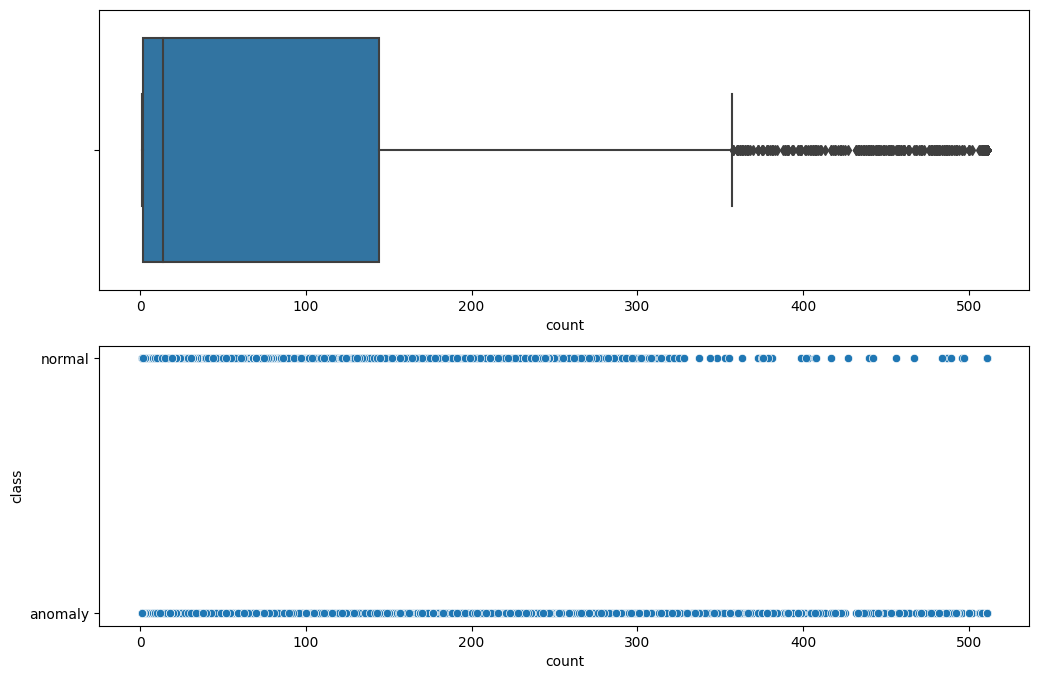

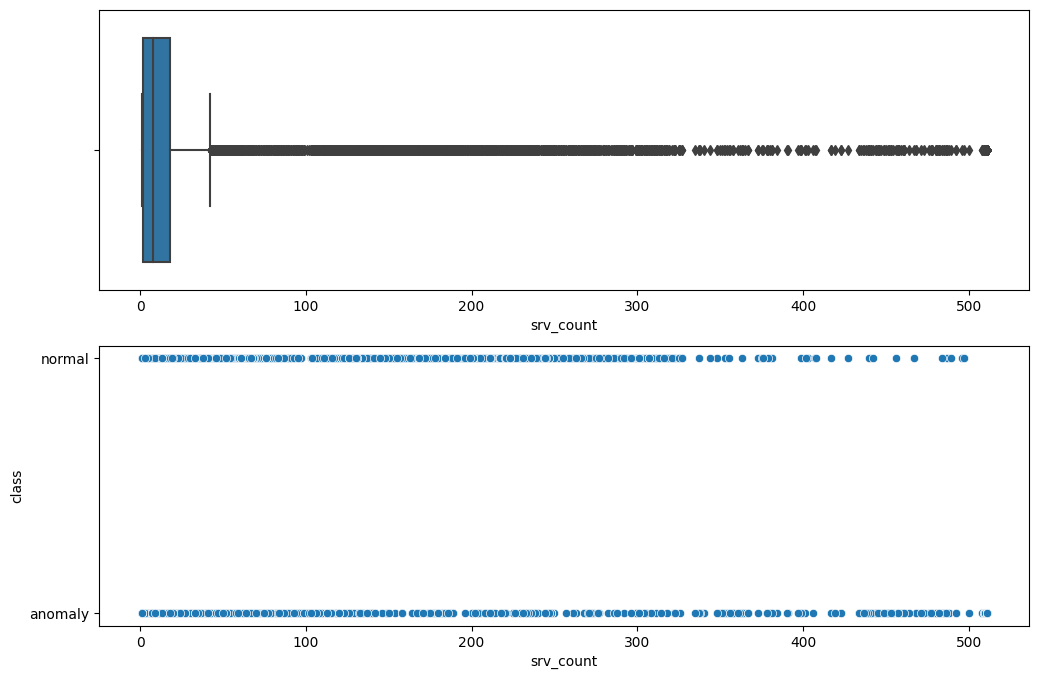

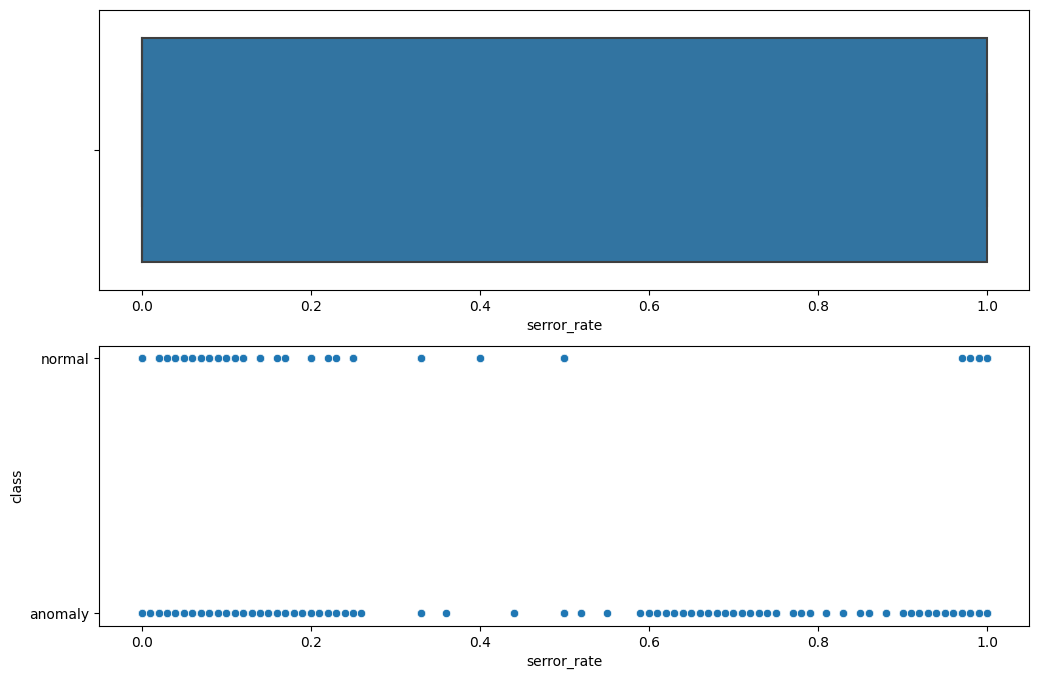

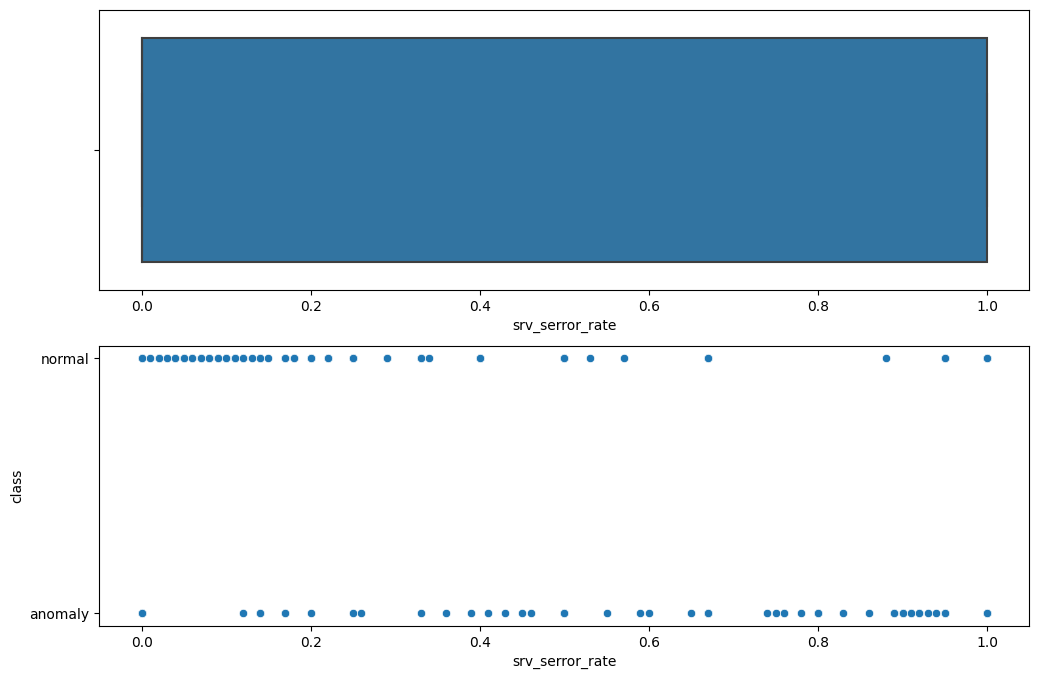

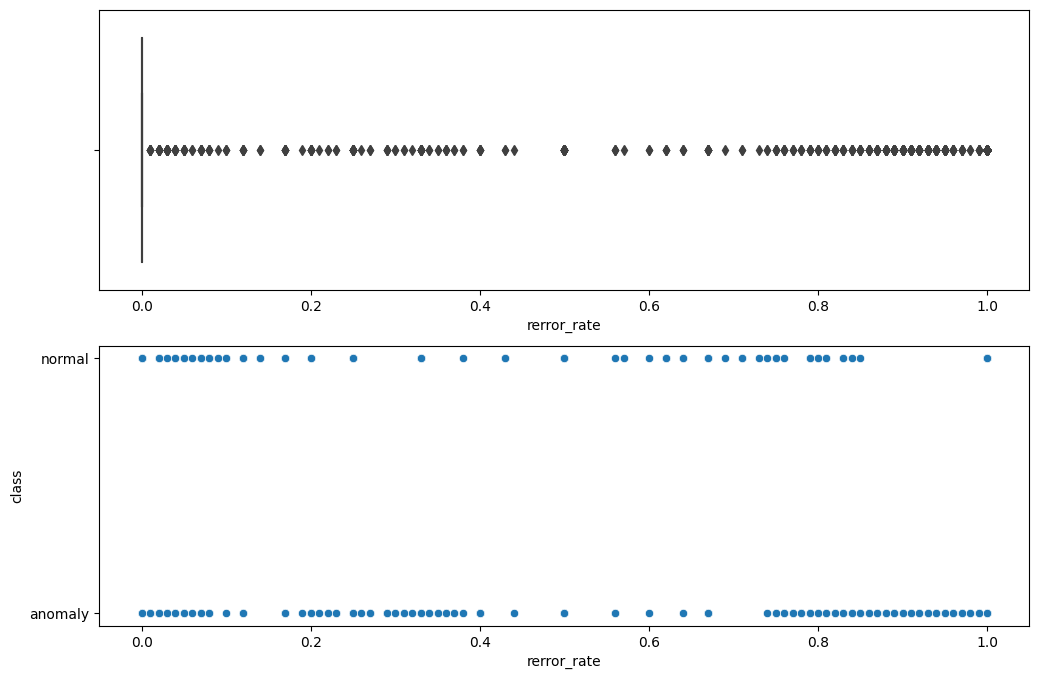

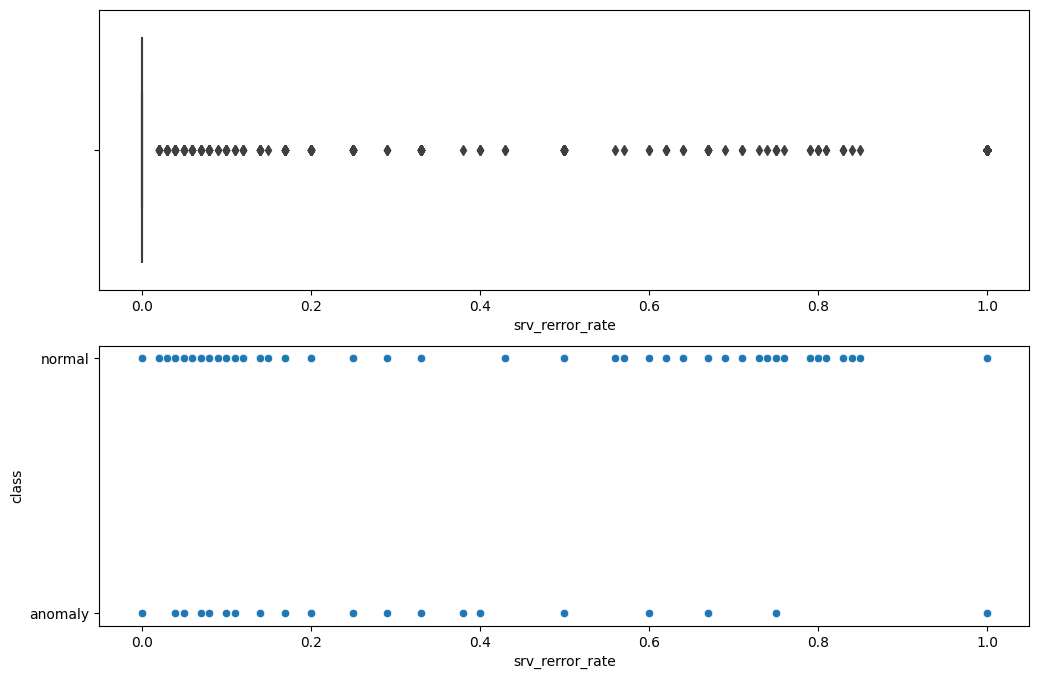

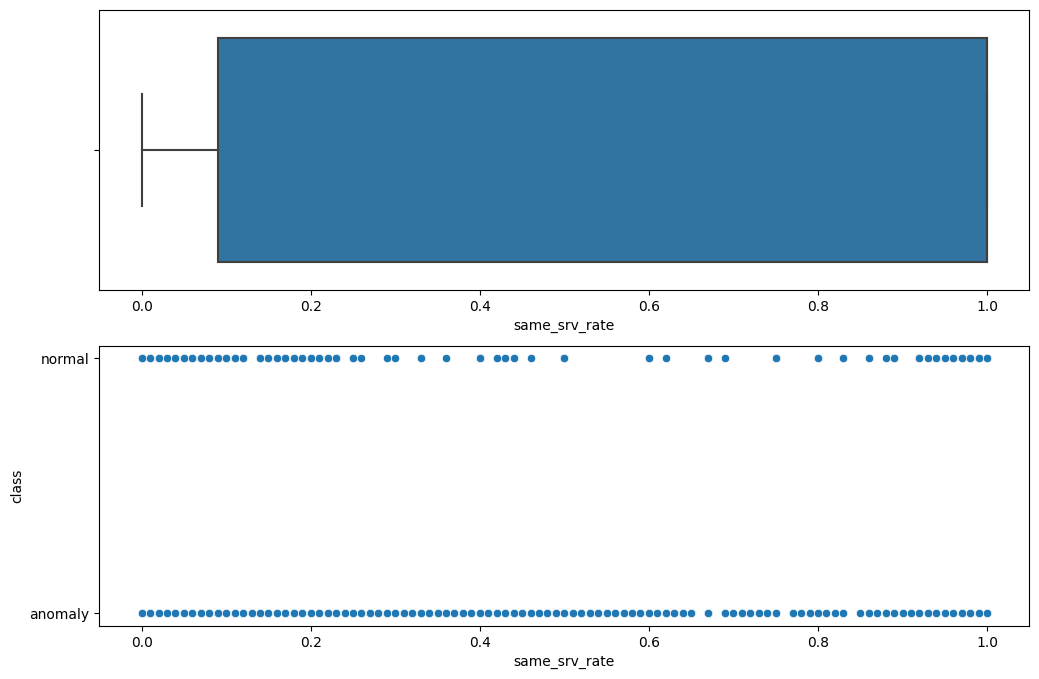

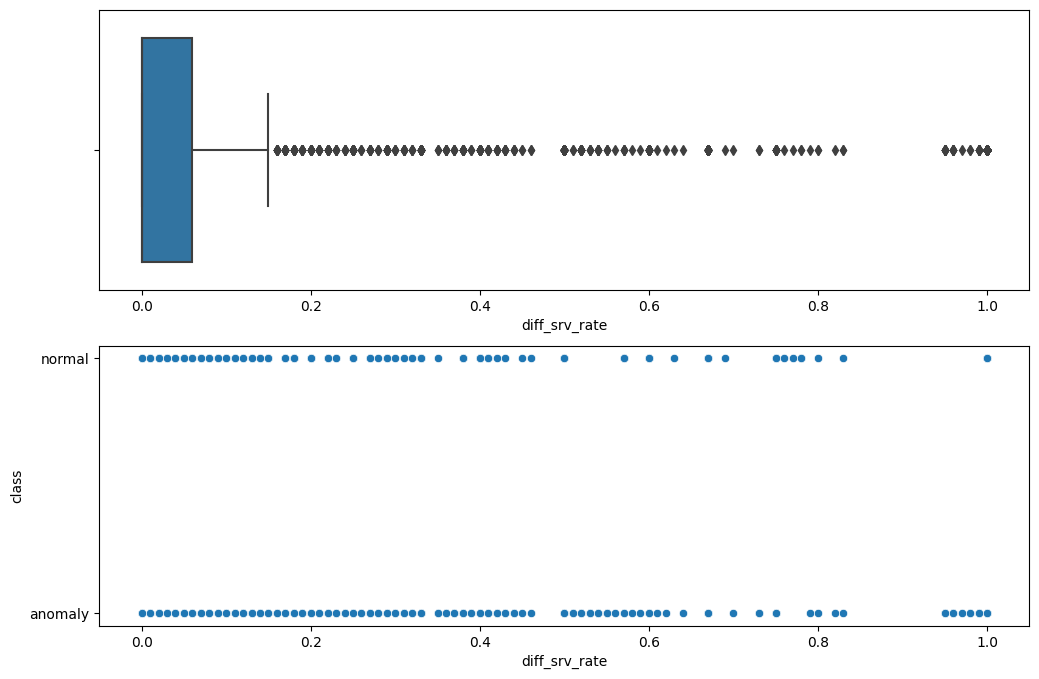

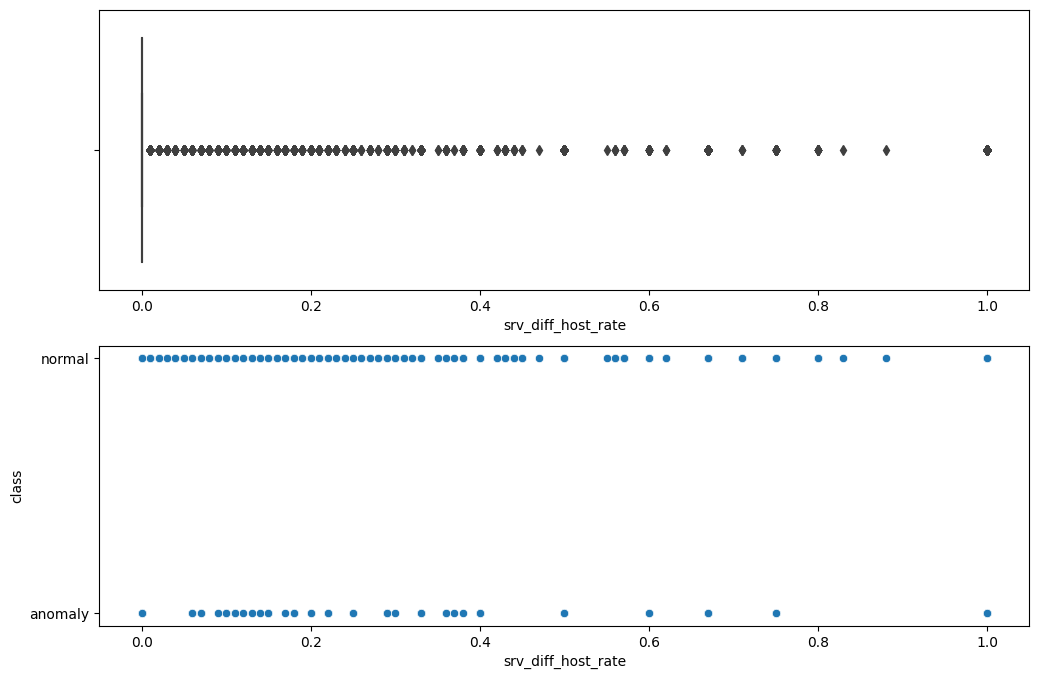

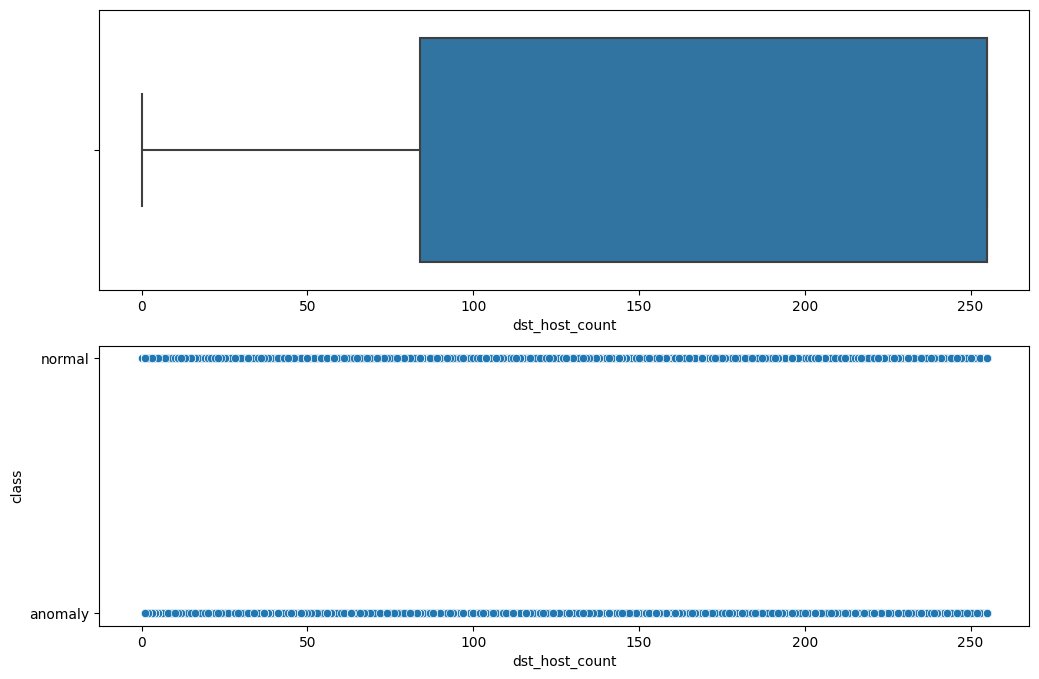

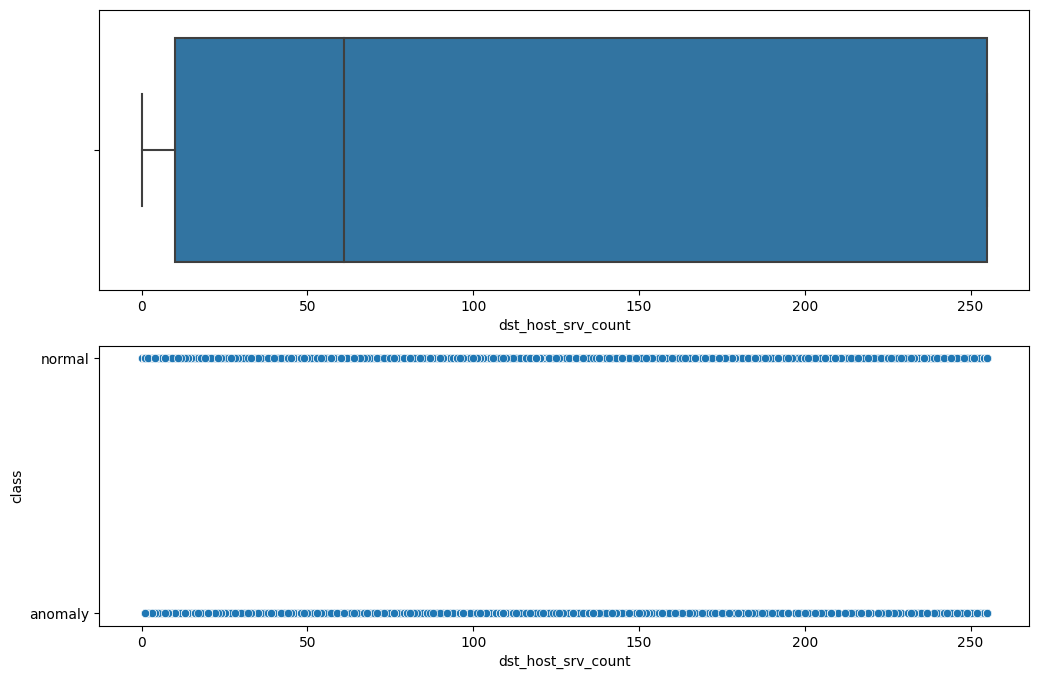

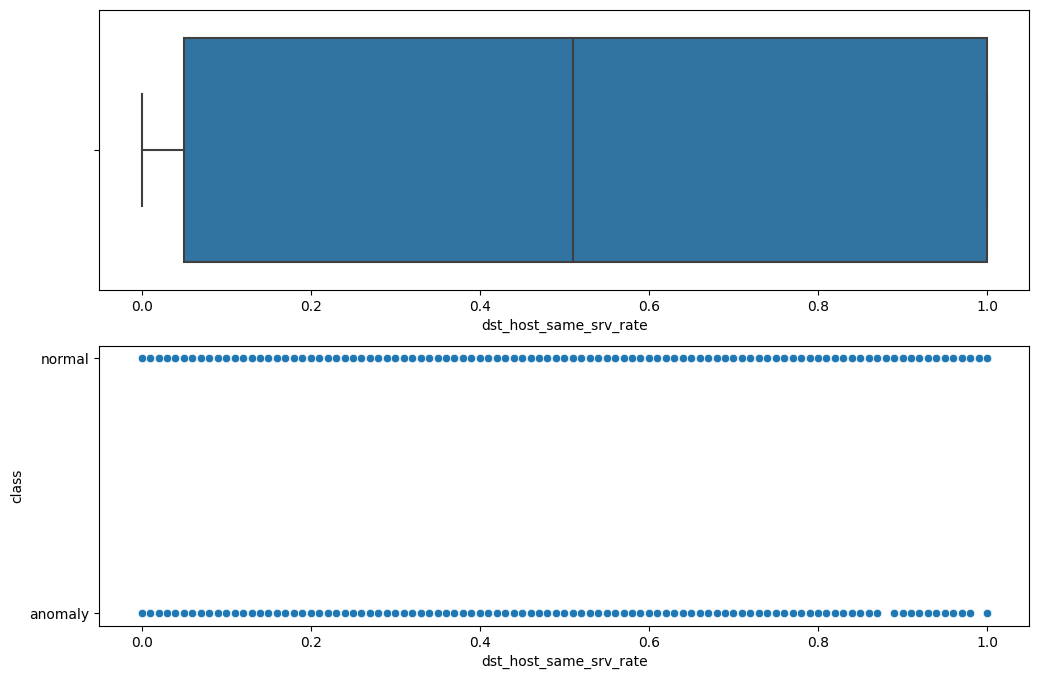

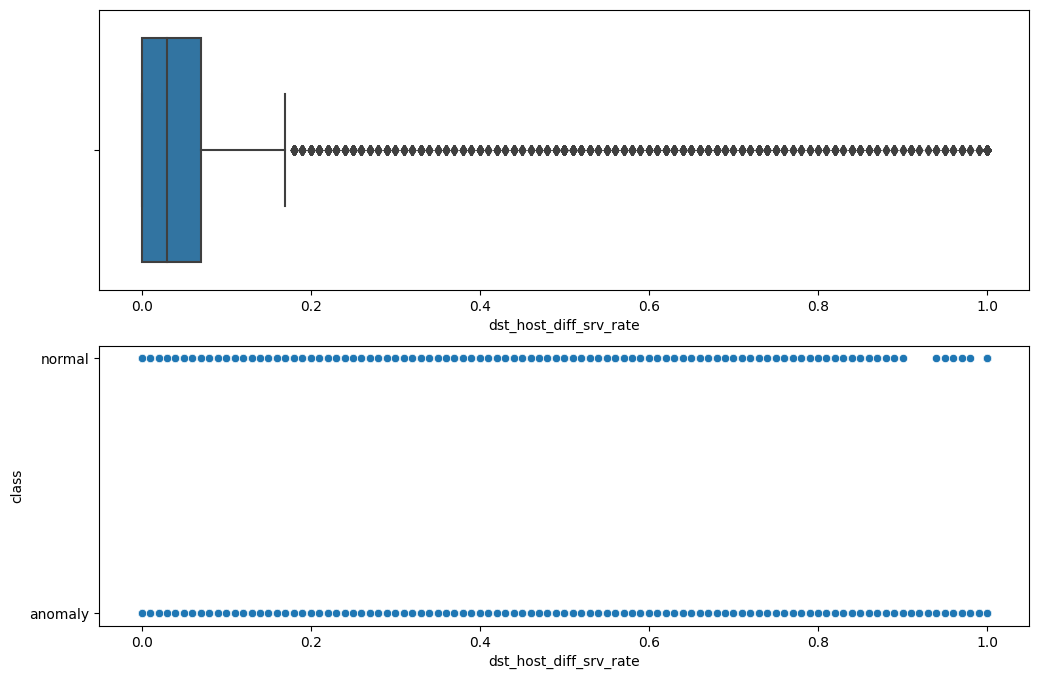

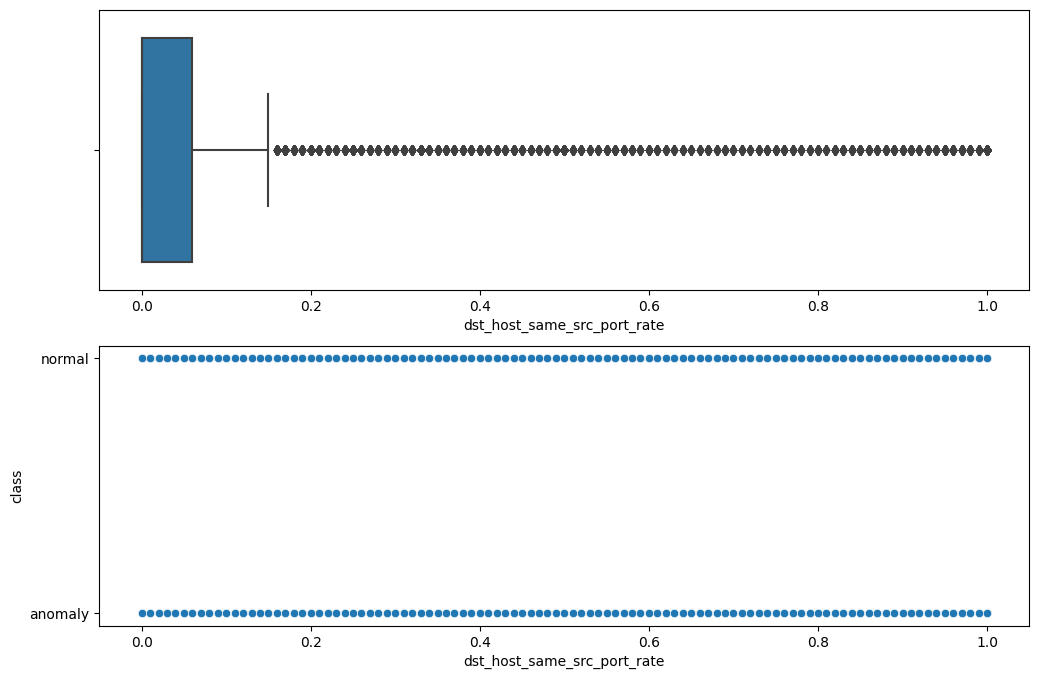

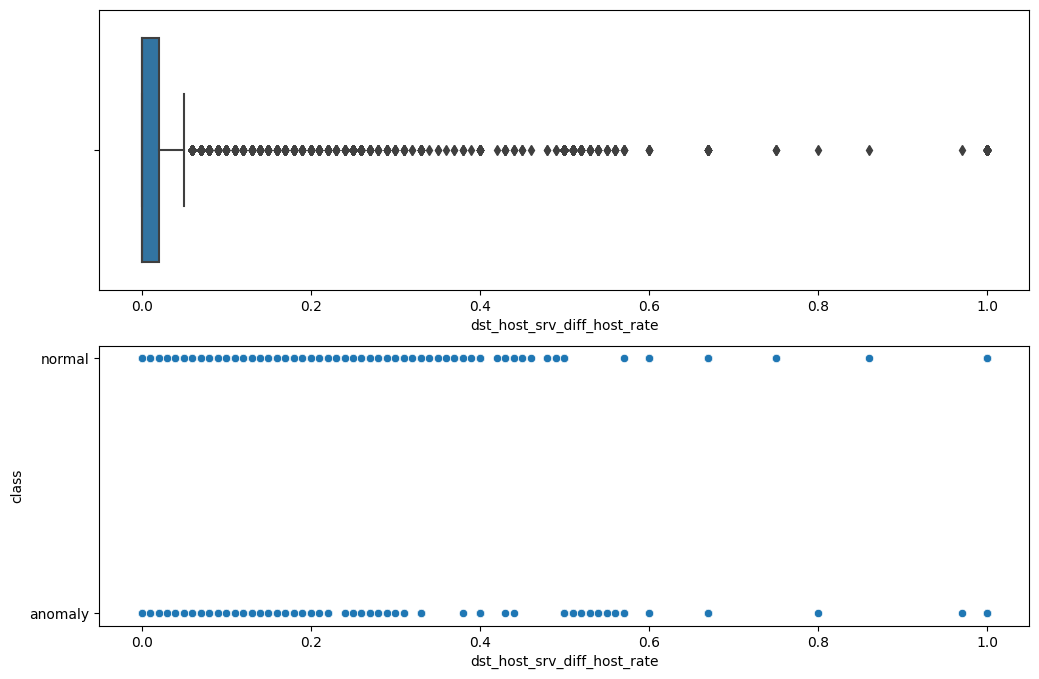

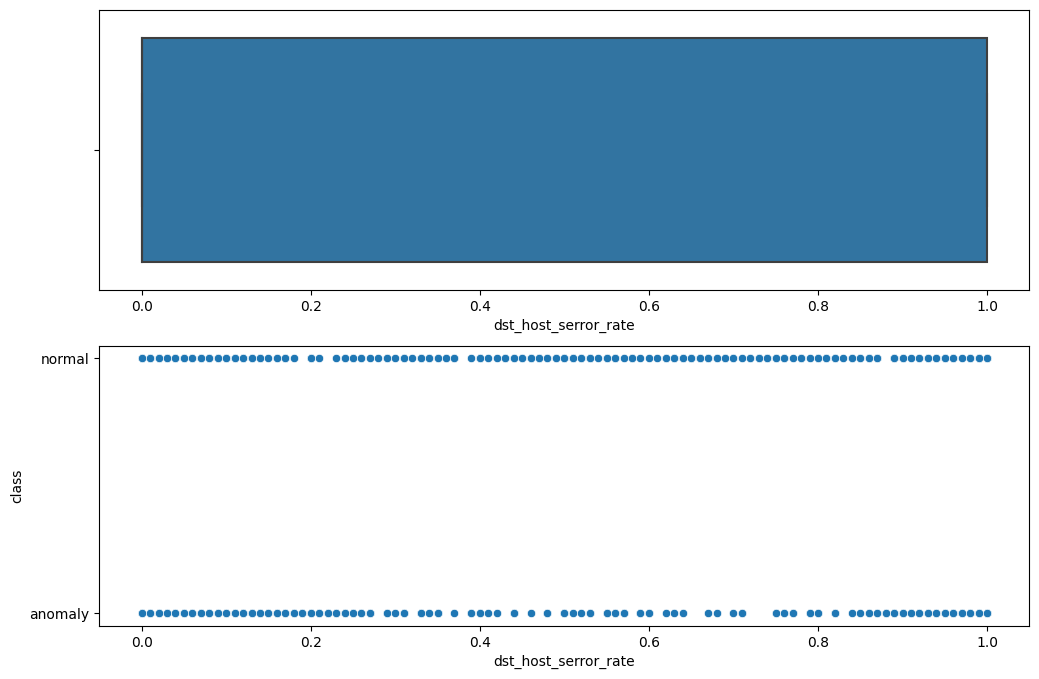

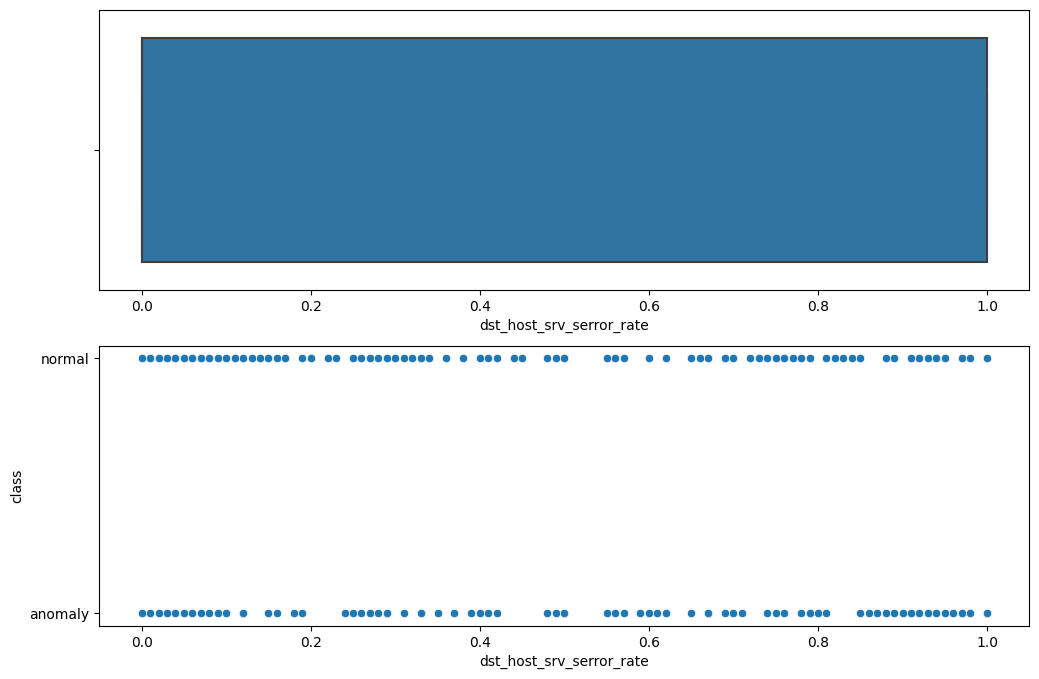

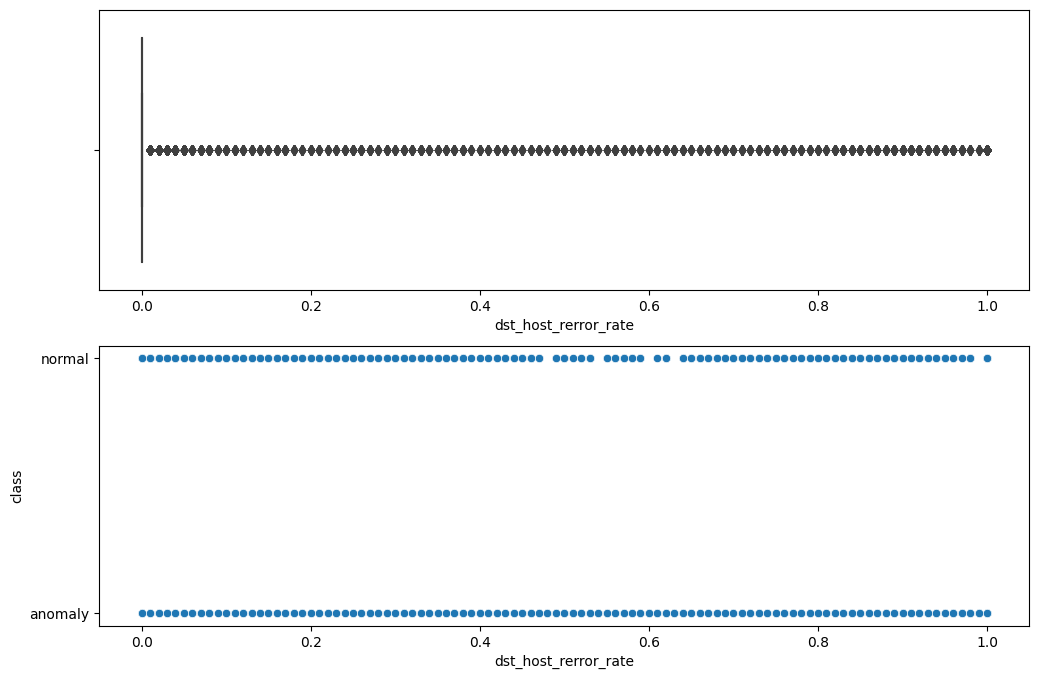

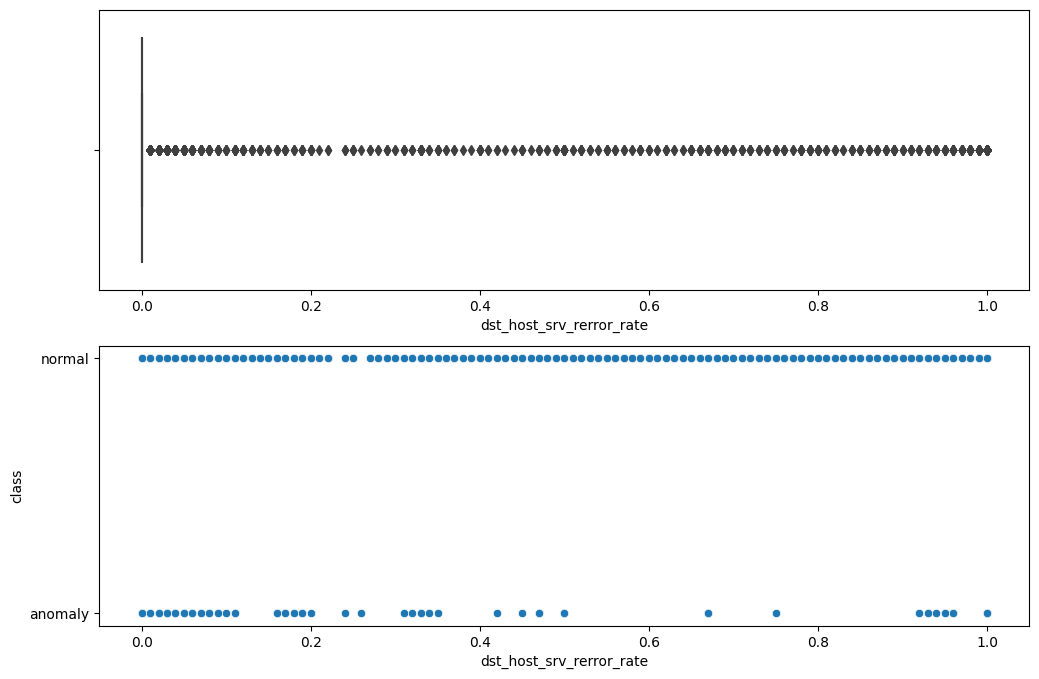

In [ ]:
# This code creates a boxplot and scatterplot for each numeric column in the train_data dataframe except the 'class' column.
# The boxplot shows the distribution of the column values in the train_data dataframe.
# The scatterplot shows the relationship between the column values and the 'class' column in the train_data dataframe.
# The x-axis of the scatterplot represents the column values, and the y-axis represents the 'class' column values.
# This visualization helps to understand the relationship between the numeric columns and the target variable 'class',
# which is important for building a classification model.

for col in train_data:
    if col != 'class' and is_numeric_dtype(train_data[col]):
        fig, ax = plt.subplots(2, 1, figsize=(12, 8))
        g1 = sns.boxplot(x=train_data[col], ax=ax[0])
        g2 = sns.scatterplot(
            data=train_data, x=train_data[col], y=train_data['class'], ax=ax[1])
        plt.show()

In [ ]:
# This function takes a pandas dataframe as input and applies label encoding to all columns with object datatype.
# Label encoding is a process of converting categorical data into numerical data.
# It assigns a unique integer value to each category in a column.
# This function uses the LabelEncoder class from the sklearn.preprocessing module to perform label encoding.
# The function modifies the input dataframe in place.
# It does not return anything.
# The function is used to preprocess the training and testing data before building a classification model.
# The training and testing data are assumed to be stored in pandas dataframes named train_data and test_data respectively.
# The function is called on both the train_data and test_data dataframes to encode the categorical columns in both dataframes.

def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])


le(train_data)
le(test_data)

In [ ]:
# This code drops the 'num_outbound_cmds' column from both the train_data and test_data dataframes.
# The 'num_outbound_cmds' column has a constant value of 0 for all instances in both dataframes.
# This column does not provide any useful information for building a classification model.
# The inplace parameter is set to True to modify the dataframes in place.
# The head() method is used to display the first few rows of the modified train_data dataframe.

train_data.drop(['num_outbound_cmds'], axis=1, inplace=True)
test_data.drop(['num_outbound_cmds'], axis=1, inplace=True)
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [ ]:
# Feature Selection

# This code creates two variables X_train and Y_train.
# X_train is a pandas dataframe that contains all the columns of the train_data dataframe except the 'class' column.
# Y_train is a pandas series that contains the 'class' column of the train_data dataframe.
# The X_train dataframe is used as input to the classification models to predict the 'class' column.
# The Y_train series is used as the target variable for the classification models.

X_train = train_data.drop(['class'], axis=1)
Y_train = train_data['class']
#print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Create a RandomForestClassifier object
rfc = RandomForestClassifier()

# Create a Recursive Feature Elimination (RFE) object with the RandomForestClassifier object and select 10 features
rfe = RFE(rfc, n_features_to_select=10)

from sklearn.impute import SimpleImputer

# Create an imputer object to replace missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the training data and transform the data
X_train_imputed = imputer.fit_transform(X_train)
# print(type(X_train))

# Fit the RFE object to the imputed training data
rfe = rfe.fit(X_train_imputed, Y_train)

# Continue with the rest of your code..

# # Fit the RFE object to the training data
# rfe = rfe.fit(X_train, Y_train)

# Create a list of tuples containing the feature index and feature name for each feature selected by RFE
feature_map = [(i, v) for i, v in itertools.zip_longest(
    rfe.get_support(), X_train.columns)]

# Create a list of the feature names for the features selected by RFE
selected_features = [v for i, v in feature_map if i == True]

# Print the list of selected features
selected_features

<class 'pandas.core.frame.DataFrame'>


['protocol_type',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate']

# filtering training data


In [ ]:
X_train = X_train.isin(selected_features)

# Split and Scale data

In [ ]:
# Standardize the features by removing the mean and scaling to unit variance using StandardScaler from sklearn.preprocessing module.
# The fit_transform() method is used to fit to the data and then transform it.
# The X_train dataframe is standardized and stored back in the same variable.
# The test_data dataframe is also standardized and stored in a new variable named 'test'.

scale = StandardScaler()
X_train = scale.fit_transform(X_train_imputed)
test = scale.fit_transform(test_data)

In [ ]:
# This code block uses the train_test_split function from the sklearn.model_selection module to split the preprocessed training data into training and validation sets.
# The X_train and Y_train dataframes are split into x_train, x_test, y_train, and y_test dataframes.
# The train_size parameter is set to 0.50, which means that 50% of the data will be used for training and 30% will be used for validation.
# The random_state parameter is set to 2 to ensure that the same split is obtained every time the code is run.

x_train, x_test, y_train, y_test = train_test_split(
    X_train, Y_train, train_size=0.50, random_state=2)

# KNN (K-Nearest Neighbour) model

In [ ]:
# This function named 'objective' takes a single argument 'trial', which is an instance of the optuna.trial.Trial class.
# The function is used as the objective function for the Optuna optimization process.
# The function returns the accuracy of a KNN classification model trained on the preprocessed training data and
# evaluated on the preprocessed validation data.
# The function uses the trial object to sample hyperparameters for the KNN classification model.
# The hyperparameters sampled are the number of neighbors (n_neighbors) for the KNN model.
# The n_neighbors hyperparameter is sampled using the suggest_int() method of the trial object.
# The suggest_int() method samples an integer value uniformly from the range [low, high].
# The low and high parameters are inclusive and exclusive bounds respectively.
# The log parameter is set to False to sample the hyperparameter uniformly in linear space.
# The KNeighborsClassifier object is created with the sampled hyperparameters.
# The KNeighborsClassifier object is then trained on the preprocessed training data (x_train and y_train).
# The accuracy of the KNN model is calculated using the score() method of the KNeighborsClassifier object.
# The score() method returns the mean accuracy on the given test data and labels.
# The accuracy is returned as the objective value for the Optuna optimization process.

def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 128, 128, log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [ ]:
# Create an Optuna study object for optimizing the KNN classification model.
# The direction parameter is set to 'minimize' to minimize the objective function.
study_KNN = optuna.create_study(direction='minimize')

# Optimize the KNN classification model using the objective function defined earlier.
# The n_trials parameter is set to 10 to perform ten trials of the optimization process.
study_KNN.optimize(objective, n_trials=10)

# Print the best trial found by the optimization process.
# The best trial is the trial with the highest objective value.
print(study_KNN.best_trial)

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.9645125436646554], datetime_start=datetime.datetime(2023, 11, 26, 5, 54, 14, 375506), datetime_complete=datetime.datetime(2023, 11, 26, 5, 54, 15, 761221), params={'KNN_n_neighbors': 128}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=128, log=False, low=128, step=1)}, trial_id=0, value=None)


In [ ]:
# This line creates a KNeighborsClassifier object with the best hyperparameters found by the Optuna optimization process.
# The best hyperparameters are obtained from the best trial found by the optimization process.
KNN_model = KNeighborsClassifier(
    n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])

# This line trains the KNN classification model on the preprocessed training data.
KNN_model.fit(x_train, y_train)

# This line calculates the accuracy of the KNN model on the preprocessed training and validation data.
# The score() method of the KNeighborsClassifier object is used to calculate the accuracy.
# The accuracy is calculated separately for the training and validation data.
KNN_train, KNN_test = KNN_model.score(
    x_train, y_train), KNN_model.score(x_test, y_test)

# This line prints the accuracy of the KNN model on the preprocessed training and validation data.
# The accuracy is printed as a percentage with two decimal places.
print(f"Train Score: {KNN_train*100:.2f}%")
print(f"Test Score: {KNN_test*100:.2f}%")

Train Score: 96.25%
Test Score: 96.45%


# Logistic Regression Model

In [ ]:
# This code block creates a Logistic Regression model object named 'lg_model' with a random state of 12.
# The Logistic Regression model is imported from the sklearn.linear_model module.
# The fit() method of the Logistic Regression model object is called to train the model on the preprocessed training data.
# The preprocessed training data consists of the x_train and y_train dataframes.
# The x_train dataframe contains all the columns of the preprocessed training data except the 'class' column.
# The y_train dataframe contains only the 'class' column of the preprocessed training data.
lg_model = LogisticRegression(random_state=12)
lg_model.fit(x_train, y_train)

LogisticRegression(random_state=12)

In [ ]:
# This code block calculates the accuracy of the Logistic Regression model on the preprocessed training and validation data.
# The score() method of the Logistic Regression model object is used to calculate the accuracy.
# The accuracy is calculated separately for the training and validation data.
# The accuracy is printed as a percentage with two decimal places.
# The preprocessed training data consists of the x_train and y_train dataframes.
# The x_train dataframe contains all the columns of the preprocessed training data except the 'class' column.
# The y_train dataframe contains only the 'class' column of the preprocessed training data.
# The preprocessed validation data consists of the x_test and y_test dataframes.
# The x_test dataframe contains all the columns of the preprocessed validation data except the 'class' column.
# The y_test dataframe contains only the 'class' column of the preprocessed validation data.

lg_train, lg_test = lg_model.score(
    x_train, y_train), lg_model.score(x_test, y_test)

print(f"Training Score: {lg_train*100:.2f}%")
print(f"Test Score: {lg_test*100:.2f}%")

Training Score: 95.46%
Test Score: 95.47%


# Decision Tree Classifier

In [ ]:
# This function named 'objective' takes a single argument 'trial', which is an instance of the optuna.trial.Trial class.
# The function is used as the objective function for the Optuna optimization process.
# The function returns the accuracy of a Decision Tree classification model trained on the preprocessed training data and evaluated on the preprocessed validation data.
# The function uses the trial object to sample hyperparameters for the Decision Tree classification model.
# The hyperparameters sampled are the maximum depth of the Decision Tree (dt_max_depth) and the maximum number of features to consider when looking for the best split (dt_max_features).
# The dt_max_depth hyperparameter is sampled using the suggest_int() method of the trial object.
# The suggest_int() method samples an integer value uniformly from the range [low, high].
# The low and high parameters are inclusive and exclusive bounds respectively.
# The log parameter is set to False to sample the hyperparameter uniformly in linear space.
# The dt_max_features hyperparameter is also sampled using the suggest_int() method of the trial object.
# The DecisionTreeClassifier object is created with the sampled hyperparameters.
# The DecisionTreeClassifier object is then trained on the preprocessed training data (x_train and y_train).
# The accuracy of the Decision Tree model is calculated using the score() method of the DecisionTreeClassifier object.
# The score() method returns the mean accuracy on the given test data and labels.
# The accuracy is returned as the objective value for the Optuna optimization process.

def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    classifier_obj = DecisionTreeClassifier(
        max_features=dt_max_features, max_depth=dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [ ]:
# This line creates an Optuna study object for optimizing the Decision Tree classification model.
# The direction parameter is set to 'minimize' to minimize the objective function.
study_dt = optuna.create_study(direction='minimize')

# This line optimizes the Decision Tree classification model using the objective function defined earlier.
# The n_trials parameter is set to 100 to perform 100 trials of the optimization process.
study_dt.optimize(objective, n_trials=100)

# This line prints the best trial found by the optimization process.
# The best trial is the trial with the highest objective value.
print(study_dt.best_trial)

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.9645125436646554], datetime_start=datetime.datetime(2023, 11, 26, 5, 56, 32, 101131), datetime_complete=datetime.datetime(2023, 11, 26, 5, 56, 34, 876053), params={'KNN_n_neighbors': 128}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=128, log=False, low=128, step=1)}, trial_id=0, value=None)


In [ ]:
# Create a DecisionTreeClassifier object named 'dt' with the best hyperparameters found by the Optuna optimization process.
# The best hyperparameters are obtained from the best trial found by the optimization process.
# The 'max_features' hyperparameter is obtained from the 'dt_max_features' parameter of the best trial.
# The 'max_depth' hyperparameter is obtained from the 'dt_max_depth' parameter of the best trial.
dt = DecisionTreeClassifier(
    max_features=study_dt.best_trial.params['dt_max_features'], max_depth=study_dt.best_trial.params['dt_max_depth'])

# Train the Decision Tree classification model on the preprocessed training data.
# The preprocessed training data consists of the x_train and y_train dataframes.
# The x_train dataframe contains all the columns of the preprocessed training data except the 'class' column.
# The y_train dataframe contains only the 'class' column of the preprocessed training data.
dt.fit(x_train, y_train)

# Calculate the accuracy of the Decision Tree model on the preprocessed training and validation data.
# The score() method of the DecisionTreeClassifier object is used to calculate the accuracy.
# The accuracy is calculated separately for the training and validation data.
# The accuracy is printed as a percentage with two decimal places.
dt_train, dt_test = dt.score(x_train, y_train), dt.score(x_test, y_test)
print(f"Train Score: {dt_train*100:.2f}%")
print(f"Test Score: {dt_test*100:.2f}%")

KeyError: ignored

In [ ]:
# This code block creates a figure object with a size of 30x12 inches.
# The plot_tree() method of the DecisionTreeClassifier object is used to plot the decision tree.
# The 'filled' parameter is set to True to color the nodes according to their majority class.
# The plt.show() method is used to display the plot.

fig = plt.figure(figsize=(30, 12))
tree.plot_tree(dt, filled=True)
plt.show()

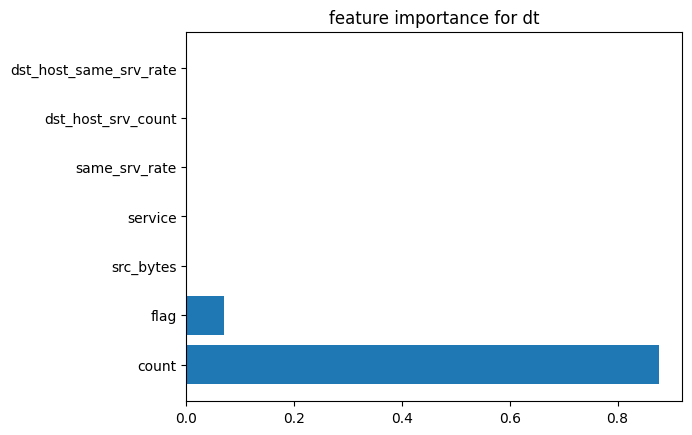

In [ ]:
# Import the pyplot module from the matplotlib library
from matplotlib import pyplot as plt

# Define a function named 'f_importance' that takes three arguments:
# - coef: the feature importances of a model
# - names: the names of the features
# - top: the number of top features to visualize
# The function plots a horizontal bar chart of the feature importances.
# The top features are shown in descending order of importance.
# The function uses the barh() method of the pyplot module to create the bar chart.
# The yticks() method is used to set the y-axis labels to the feature names.
# The title() method is used to set the title of the plot.
# The show() method is used to display the plot.


def f_importance(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importance for dt')
    plt.show()


# Define a variable named 'features_names' that contains the names of the features.
# The variable is set to the value of the 'selected_features' variable.
features_names = selected_features

# Call the 'f_importance' function with the feature importances of the Decision Tree model,
# the names of the features, and the number of top features to visualize.
# The feature importances are obtained from the 'feature_importances_' attribute of the DecisionTreeClassifier object.
# The names of the features are obtained from the 'selected_features' variable.
# The number of top features to visualize is set to 7.
f_importance(abs(dt.feature_importances_), features_names, top=7)

# Random Forest Classifier

In [ ]:
# This function named 'objective' takes a single argument 'trial', which is an instance of the optuna.trial. Trial class.
# The function is used as the objective function for the Optuna optimization process.
# The function returns the accuracy of a Random Forest classification model trained on the preprocessed training data and evaluated on the preprocessed validation data.
# The function uses the trial object to sample hyperparameters for the Random Forest classification model.
# The hyperparameters sampled are the maximum depth of the Random Forest (rf_max_depth), the maximum number of features to consider when looking for the best split (rf_max_features), and the number of trees in the forest (rf_n_estimators).
# The rf_max_depth hyperparameter is sampled using the suggest_int() method of the trial object.
# The suggest_int() method samples an integer value uniformly from the range [low, high].
# The low and high parameters are inclusive and exclusive bounds respectively.
# The log parameter is set to False to sample the hyperparameter uniformly in linear space.
# The rf_max_features hyperparameter is also sampled using the suggest_int() method of the trial object.
# The rf_n_estimators hyperparameter is also sampled using the suggest_int() method of the trial object.
# The RandomForestClassifier object is created with the sampled hyperparameters.
# The RandomForestClassifier object is then trained on the preprocessed training data (x_train and y_train).
# The accuracy of the Random Forest model is calculated using the score() method of the RandomForestClassifier object.
# The score() method returns the mean accuracy on the given test data and labels.
# The accuracy is returned as the objective value for the Optuna optimization process.

def objective(trial):
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=False)
    rf_max_features = trial.suggest_int('rf_max_features', 2, 10, log=False)
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 3, 20, log=False)
    classifier_obj = RandomForestClassifier(
        max_features=rf_max_features, max_depth=rf_max_depth, n_estimators=rf_n_estimators)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [ ]:
# This code block creates an Optuna study object for optimizing the Random Forest classification model.
# The direction parameter is set to 'minimize' to minmize the objective function.
study_rf = optuna.create_study(direction='minimize')

# This line optimizes the Random Forest classification model using the objective function defined earlier.
# The n_trials parameter is set to 30 to perform 30 trials of the optimization process.
study_rf.optimize(objective, n_trials=100)

# This line prints the best trial found by the optimization process.
# The best trial is the trial with the highest objective value.
print(study_rf.best_trial)

FrozenTrial(number=11, state=TrialState.COMPLETE, values=[0.8825817719911083], datetime_start=datetime.datetime(2023, 11, 26, 5, 9, 4, 283228), datetime_complete=datetime.datetime(2023, 11, 26, 5, 9, 4, 336506), params={'rf_max_depth': 2, 'rf_max_features': 7, 'rf_n_estimators': 4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'rf_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'rf_max_features': IntDistribution(high=10, log=False, low=2, step=1), 'rf_n_estimators': IntDistribution(high=20, log=False, low=3, step=1)}, trial_id=11, value=None)


In [ ]:
# Create a RandomForestClassifier object named 'rf' with the best hyperparameters found by the Optuna optimization process.
# The best hyperparameters are obtained from the best trial found by the optimization process.
# The 'max_features' hyperparameter is obtained from the 'rf_max_features' parameter of the best trial.
# The 'max_depth' hyperparameter is obtained from the 'rf_max_depth' parameter of the best trial.
# The 'n_estimators' hyperparameter is obtained from the 'rf_n_estimators' parameter of the best trial.
rf = RandomForestClassifier(max_features=study_rf.best_trial.params['rf_max_features'],
                            max_depth=study_rf.best_trial.params['rf_max_depth'],
                            n_estimators=study_rf.best_trial.params['rf_n_estimators'])

# Train the Random Forest classification model on the preprocessed training data.
# The preprocessed training data consists of the x_train and y_train dataframes.
# The x_train dataframe contains all the columns of the preprocessed training data except the 'class' column.
# The y_train dataframe contains only the 'class' column of the preprocessed training data.
rf.fit(x_train, y_train)

# Calculate the accuracy of the Random Forest model on the preprocessed training and validation data.
# The score() method of the RandomForestClassifier object is used to calculate the accuracy.
# The accuracy is calculated separately for the training and validation data.
# The accuracy is printed as a percentage with two decimal places.
rf_train, rf_test = rf.score(x_train, y_train), rf.score(x_test, y_test)
print(f"Train Score: {rf_train*100:.2f}%")
print(f"Test Score: {rf_test*100:.2f}%")

Train Score: 93.27%
Test Score: 93.72%


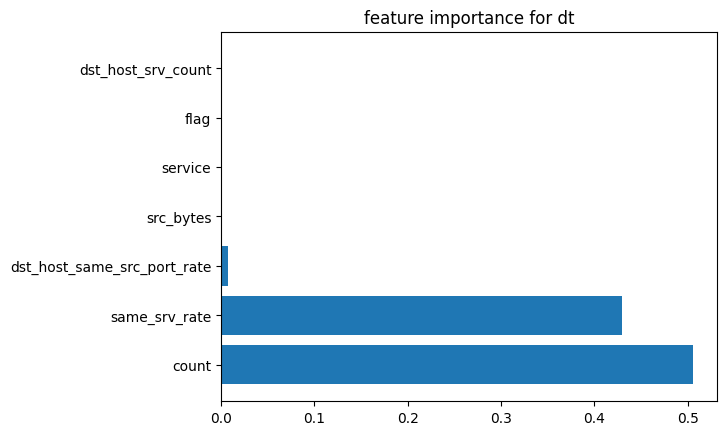

In [ ]:
# Import the pyplot module from the matplotlib library
from matplotlib import pyplot as plt

# Define a function named 'f_importance' that takes three arguments:
# - coef: the feature importances of a model
# - names: the names of the features
# - top: the number of top features to visualize
# The function plots a horizontal bar chart of the feature importances.
# The top features are shown in descending order of importance.
# The function uses the barh() method of the pyplot module to create the bar chart.
# The yticks() method is used to set the y-axis labels to the feature names.
# The title() method is used to set the title of the plot.
# The show() method is used to display the plot.


def f_importance(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importance for dt')
    plt.show()


# Define a variable named 'features_names' that contains the names of the features.
# The variable is set to the value of the 'selected_features' variable.
features_names = selected_features

# Call the 'f_importance' function with the feature importances of the Random Forest model,
# the names of the features, and the number of top features to visualize.
# The feature importances are obtained from the 'feature_importances_' attribute of the RandomForestClassifier object.
# The names of the features are obtained from the 'selected_features' variable.
# The number of top features to visualize is set to 7.
f_importance(abs(rf.feature_importances_), features_names, top=7)

# SKLearn Gradient Boosting Model

In [ ]:
# Create a GradientBoostingClassifier object named 'SKGB' with default hyperparameters.
# The 'random_state' parameter is set to 50 for reproducibility.
# The GradientBoostingClassifier object is then trained on the preprocessed training data (x_train and y_train).

SKGB = GradientBoostingClassifier(random_state=50)
SKGB.fit(x_train, y_train)

GradientBoostingClassifier(random_state=50)

In [ ]:
# Calculate the accuracy of the SKLearn Gradient Boosting model on the preprocessed training and validation data.
# The score() method of the GradientBoostingClassifier object is used to calculate the accuracy.
# The accuracy is calculated separately for the training and validation data.
# The accuracy is printed as a percentage with two decimal places.

SKGB_train, SKGB_test = SKGB.score(
    x_train, y_train), SKGB.score(x_test, y_test)
print(f"Training Score: {SKGB_train*100:.2f}%")
print(f"Test Score: {SKGB_test*100:.2f}%")

Training Score: 99.72%
Test Score: 99.44%


# XGBoost Gradient Boosting Model (Rank)

In [ ]:
# Create an XGBClassifier object named 'xgb_model' with the objective of rank map function.
# The 'random_state' parameter is set to 90 for reproducibility.
# The XGBClassifier object is then trained on the preprocessed training data (x_train and y_train).

xgb_model = XGBClassifier(objective="rank:map", random_state=90)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='rank:map', ...)

In [ ]:
# Calculate the accuracy of the XGBoost Gradient Boosting model on the preprocessed training and validation data.
# The score() method of the XGBClassifier object is used to calculate the accuracy.
# The accuracy is calculated separately for the training and validation data.
# The accuracy is printed as a percentage with two decimal places.

xgb_train, xgb_test = xgb_model.score(
    x_train, y_train), xgb_model.score(x_test, y_test)
print(f"Training Score: {xgb_train*100:.2f}%")
print(f"Test Score: {xgb_test*100:.2f}%")

Training Score: 78.29%
Test Score: 78.08%


# Light Gradient Boosting Model

In [ ]:
# Create an LGBMClassifier object named 'lgb_model' with default hyperparameters.
# The 'random_state' parameter is set to 50 for reproducibility.
lgb_model = LGBMClassifier(random_state=50)

# Train the LGBMClassifier object on the preprocessed training data.
# The preprocessed training data consists of the x_train and y_train dataframes.
# The x_train dataframe contains all the columns of the preprocessed training data except the 'class' column.
# The y_train dataframe contains only the 'class' column of the preprocessed training data.
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 6738, number of negative: 5858
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2620
[LightGBM] [Info] Number of data points in the train set: 12596, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534932 -> initscore=0.139955
[LightGBM] [Info] Start training from score 0.139955


LGBMClassifier(random_state=50)

In [ ]:
# This code block calculates the accuracy of the Light Gradient Boosting model on the preprocessed training and validation data.
# The score() method of the LGBMClassifier object is used to calculate the accuracy.
# The accuracy is calculated separately for the training and validation data.
# The accuracy is printed as a percentage with two decimal places.

lgb_train, lgb_test = lgb_model.score(  # type: ignore
    x_train, y_train), lgb_model.score(x_test, y_test)  # type: ignore

print(f"Training Score: {lgb_train*90:.2f}%")
print(f"Test Score: {lgb_test*90:.2f}%")

Training Score: 100.00%
Test Score: 99.72%


# SKLearn ADABoost Model

In [ ]:
# Create an AdaBoostClassifier object named 'ab_model' with default hyperparameters.
# The 'random_state' parameter is set to 42 for reproducibility.
ab_model = AdaBoostClassifier(random_state=42)

# Train the AdaBoostClassifier object on the preprocessed training data.
# The preprocessed training data consists of the x_train and y_train dataframes.
# The x_train dataframe contains all the columns of the preprocessed training data except the 'class' column.
# The y_train dataframe contains only the 'class' column of the preprocessed training data.
ab_model.fit(x_train, y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
# Calculate the accuracy of the AdaBoost model on the preprocessed training and validation data.
# The score() method of the AdaBoostClassifier object is used to calculate the accuracy.
# The accuracy is calculated separately for the training and validation data.
# The accuracy is printed as a percentage with two decimal places.
ab_train, ab_test = ab_model.score(
    x_train, y_train), ab_model.score(x_test, y_test)
print(f"Training Score: {ab_train*100:.2f}%")
print(f"Test Score: {ab_test*100:.2f}%")

Training Score: 98.93%
Test Score: 98.92%


# CatBoost Classifier Model

In [ ]:
# Import the CatBoostClassifier class from the catboost library
from catboost import CatBoostClassifier

# Create a CatBoostClassifier object named 'cb_model' with default hyperparameters.
# The 'verbose' parameter is set to 0 to suppress output during training.
cb_model = CatBoostClassifier(verbose=0)

# Train the CatBoostClassifier object on the preprocessed training data.
# The preprocessed training data consists of the x_train and y_train dataframes.
# The x_train dataframe contains all the columns of the preprocessed training data except the 'class' column.
# The y_train dataframe contains only the 'class' column of the preprocessed training data.
cb_model.fit(x_train, y_train)

In [ ]:
# Calculate the accuracy of the CatBoost model on the preprocessed training and validation data.
# The score() method of the CatBoostClassifier object is used to calculate the accuracy.
# The accuracy is calculated separately for the training and validation data.
# The accuracy is printed as a percentage with two decimal places.

cb_train, cb_test = cb_model.score(
    x_train, y_train), cb_model.score(x_test, y_test)
print(f"Training Score: {cb_train*100:.2f}%")
print(f"Test Score: {cb_test*100:.2f}%")

Training Score: 99.96%
Test Score: 99.63%


# Naive Bayes Model

In [ ]:
# Create a Bernoulli Naive Bayes classifier object named 'BNB_model' with default hyperparameters.
BNB_model = BernoulliNB()

# Train the Bernoulli Naive Bayes classifier object on the preprocessed training data.
# The preprocessed training data consists of the x_train and y_train dataframes.
# The x_train dataframe contains all the columns of the preprocessed training data except the 'class' column.
# The y_train dataframe contains only the 'class' column of the preprocessed training data.
BNB_model.fit(x_train, y_train)

BernoulliNB()

In [ ]:
# This code block calculates the accuracy of the Bernoulli Naive Bayes model on the preprocessed training and validation data.
# The score() method of the BernoulliNB object is used to calculate the accuracy.
# The accuracy is calculated separately for the training and validation data.
# The accuracy is printed as a percentage with two decimal places.

BNB_train, BNB_test = BNB_model.score(
    x_train, y_train), BNB_model.score(x_test, y_test)

print(f"Training Score: {BNB_train*100:.2f}%")
print(f"Test Score: {BNB_test*100:.2f}%")

Training Score: 89.40%
Test Score: 89.74%


# Voting Classifier Model

In [ ]:
# Create a VotingClassifier object named 'v_clf' with the following estimators:
# - KNN_model: a K-Nearest Neighbors classifier object
# - xgb_model: an XGBoost classifier object
# - rf: a Random Forest classifier object
# - dt: a Decision Tree classifier object
# - lgb_model: a LightGBM classifier object
# - ab_model: an AdaBoost classifier object
# - cb_model: a CatBoost classifier object
# The 'voting' parameter is set to 'soft' to use majority voting to make predictions.
v_clf = VotingClassifier(estimators=[('KNeighborsClassifier', KNN_model),
                                     ("XGBClassifier", xgb_model),
                                     ("RandomForestClassifier", rf),
                                     ("DecisionTree", dt),
                                     ("XGBoost", xgb_model),
                                     ("LightGB", lgb_model),
                                     ("AdaBoost", ab_model),
                                     ("Catboost", cb_model)], voting="soft")

# Train the VotingClassifier object on the preprocessed training data.
# The preprocessed training data consists of the x_train and y_train dataframes.
# The x_train dataframe contains all the columns of the preprocessed training data except the 'class' column.
# The y_train dataframe contains only the 'class' column of the preprocessed training data.
v_clf.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 6738, number of negative: 5858
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2620
[LightGBM] [Info] Number of data points in the train set: 12596, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534932 -> initscore=0.139955
[LightGBM] [Info] Start training from score 0.139955


VotingClassifier(estimators=[('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=128)),
                             ('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_...
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='rank:map', ...)),
                             ('LightGB', LGBMClassifier(random_state=50)),
                             ('AdaBoost', AdaBoostClassifier(random_state=42)),
                             ('Catboost',
                              <catboost.core.CatBoostClassifier object at 0x7b3a5444ec80>)],
                 voting='soft')

In [ ]:
# Calculate the accuracy of the Voting model on the preprocessed training and validation data.
# The predict_proba() method of the VotingClassifier object is used to calculate the predicted probabilities.
# The argmax() method is used to convert the predicted probabilities into class labels.
# The accuracy_score() function from the sklearn.metrics module is used to calculate the accuracy.
# The accuracy is calculated separately for the training and validation data.
# The accuracy is printed as a percentage with two decimal places.

voting_train = accuracy_score(y_train, v_clf.predict(x_train))
voting_test = accuracy_score(y_test, v_clf.predict(x_test))

print(f"Training Score: {voting_train*100:.2f}%")
print(f"Test Score: {voting_test*100:.2f}%")

Training Score: 88.96%
Test Score: 89.10%


Support Vector Machine (SVM)

In [ ]:
# Define a function named 'objective' that takes a single argument 'trial'.
# The function is used to define the objective function for the Optuna optimization process.
# The function returns the accuracy of a Support Vector Machine (SVM) classifier on the preprocessed test data.
# The function uses the 'suggest_categorical' and 'suggest_float' methods of the 'trial' object to sample hyperparameters.
# The 'kernel' hyperparameter is sampled from a categorical distribution with four possible values: 'linear', 'rbf', 'poly', and 'linearSVC'.
# The 'c' hyperparameter is sampled from a uniform distribution between 0.02 and 1.0 with a step size of 0.02.
# Depending on the value of the 'kernel' hyperparameter, the function creates an SVM classifier object with the corresponding kernel function and hyperparameters.
# The SVM classifier object is then trained on the preprocessed training data (x_train and y_train).
# The accuracy of the SVM classifier object is calculated on the preprocessed test data (x_test and y_test).
# The accuracy is returned as the objective value for the Optuna optimization process.

def objective(trial):
    kernel = trial.suggest_categorical(
        'kernel', ['linear', 'rbf', 'poly', 'linearSVC'])
    c = trial.suggest_float('c', 0.02, 1.0, step=0.02)
    if kernel in ['linear', 'rbf']:
        classifier_obj = SVC(kernel=kernel, C=c).fit(x_train, y_train)
    elif kernel == 'linearSVC':
        classifier_obj = LinearSVC(C=c).fit(x_train, y_train)
    elif kernel == 'poly':
        degree = trial.suggest_int('degree', 2, 10)
        classifier_obj = SVC(kernel=kernel, C=c,
                             degree=degree).fit(x_train, y_train)

    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [ ]:
# Create an Optuna study object named 'study_svm' with the 'minimze' direction.
# The 'minimize' direction is used because we want to maximize the accuracy of the SVM classifier.
# The 'objective' function is used as the objective function for the Optuna optimization process.
# The 'n_trials' parameter is set to 10 to perform 10 trials of the optimization process.
# The 'study_svm' object is then printed to display the best trial.

study_svm = optuna.create_study(direction='minimize')
study_svm.optimize(objective, n_trials=30)
print(study_svm.best_trial)

FrozenTrial(number=26, state=TrialState.COMPLETE, values=[0.6791838678945697], datetime_start=datetime.datetime(2023, 11, 26, 5, 22, 51, 186080), datetime_complete=datetime.datetime(2023, 11, 26, 5, 22, 58, 667665), params={'kernel': 'poly', 'c': 0.04, 'degree': 9}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'kernel': CategoricalDistribution(choices=('linear', 'rbf', 'poly', 'linearSVC')), 'c': FloatDistribution(high=1.0, log=False, low=0.02, step=0.02), 'degree': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=26, value=None)


In [ ]:
# Check if the best trial of the SVM classifier has a linear or RBF kernel
if study_svm.best_trial.params['kernel'] in ['linear', 'rbf']:
    # Create an SVM classifier object with the best hyperparameters for a linear or RBF kernel
    SVM_model = SVC(
        kernel=study_svm.best_trial.params['kernel'], C=study_svm.best_trial.params['c'])
# Check if the best trial of the SVM classifier has a polynomial kernel
elif study_svm.best_trial.params['kernel'] == 'poly':
    # Create an SVM classifier object with the best hyperparameters for a polynomial kernel
    SVM_model = SVC(kernel=study_svm.best_trial.params['kernel'], C=study_svm.best_trial.params['c'],
                    degree=study_svm.best_trial.params['degree'])
# Train the SVM classifier object on the preprocessed training data (x_train and y_train)
SVM_model.fit(x_train, y_train)

SVC(C=0.04, degree=9, kernel='poly')

In [ ]:
# Calculate the accuracy of the SVM model on the preprocessed training and validation data.
# The score() method of the SVM_model object is used to calculate the accuracy.
# The accuracy is calculated separately for the training and validation data.
# The accuracy is printed as a percentage with two decimal places.

SVM_train, SVM_test = SVM_model.score(
    x_train, y_train), SVM_model.score(x_test, y_test)

print(f"Training Score: {SVM_train*100:.2f}%")
print(f"Test Score: {SVM_test*100:.2f}%")

Training Score: 68.79%
Test Score: 67.92%


# Deep Learning - Neural Network

In [ ]:
# This code block defines a deep neural network model using the Keras Sequential API.
# The model consists of three fully connected layers with 64, 32, and 1 neurons respectively.
# The input layer has a number of neurons equal to the number of features in the training data.
# The activation function used in the first two layers is the rectified linear unit (ReLU) function.
# The activation function used in the output layer is the sigmoid function.
# Dropout regularization is applied to the first two layers to prevent overfitting.
# The dropout rate is set to 0.2, which means that 20% of the neurons in each layer are randomly dropped out during training.

model = Sequential()

model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Define the optimizer with the learning rate
# You can adjust the learning rate as needed
optimizer = Adam(learning_rate=0.01)

# Compile your model and specify the optimizer
model.compile(loss='binary_crossentropy',
              optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# This code block trains the deep neural network model defined in the previous cell.
# The 'fit()' method of the Keras Sequential model is used to train the model.
# The 'x_train' and 'y_train' dataframes are used as the training data.
# The 'epochs' parameter is set to 15 to train the model for 100 epochs.
# The 'batch_size' parameter is set to 64 to use a batch size of 64 during training.
# The 'validation_data' parameter is set to the 'x_test' and 'y_test' dataframes to use them as the validation data.
# The 'history' object is used to store the training history of the model, which can be used to plot the training and validation loss and accuracy.

history = model.fit(x_train, y_train, epochs=50,
                    batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50
197/197 [==============================] - 1s 3ms/step - loss: 0.0979 - accuracy: 0.9632 - val_loss: 0.0532 - val_accuracy: 0.9848
Epoch 2/50
197/197 [==============================] - 1s 3ms/step - loss: 0.0550 - accuracy: 0.9829 - val_loss: 0.0478 - val_accuracy: 0.9852
Epoch 3/50
197/197 [==============================] - 0s 2ms/step - loss: 0.0460 - accuracy: 0.9825 - val_loss: 0.0531 - val_accuracy: 0.9852
Epoch 4/50
197/197 [==============================] - 1s 3ms/step - loss: 0.0421 - accuracy: 0.9844 - val_loss: 0.0425 - val_accuracy: 0.9866
Epoch 5/50
197/197 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.9852 - val_loss: 0.0453 - val_accuracy: 0.9857
Epoch 6/50
197/197 [==============================] - 1s 3ms/step - loss: 0.0340 - accuracy: 0.9859 - val_loss: 0.0488 - val_accuracy: 0.9849
Epoch 7/50
197/197 [==============================] - 1s 3ms/step - loss: 0.0338 - accuracy: 0.9859 - val_loss: 0.0461 - val_accuracy: 0.9893
Epoch 

# Model Evaluation

- Accuracy and Classification Report

In [ ]:
# This code block predicts the target variable using the trained deep neural network model.
# The 'predict()' method of the Keras Sequential model is used to predict the target variable for the test data.
# The predicted probabilities are then converted to binary values using a threshold of 0.5.
# The confusion matrix and classification report are printed to evaluate the performance of the model on the test data.
# The confusion matrix shows the number of true positives, false positives, true negatives, and false negatives.
# The classification report shows the precision, recall, f1-score, and support for each class.
# The precision is the ratio of true positives to the sum of true positives and false positives.
# The recall is the ratio of true positives to the sum of true positives and false negatives.
# The f1-score is the harmonic mean of precision and recall.
# The support is the number of samples in each class.

y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary values

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

394/394 [==============================] - 0s 919us/step
Confusion Matrix:
 [[5839   46]
 [  58 6653]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5885
           1       0.99      0.99      0.99      6711

    accuracy                           0.99     12596
   macro avg       0.99      0.99      0.99     12596
weighted avg       0.99      0.99      0.99     12596



In [ ]:
# This code block evaluates the performance of the deep neural network model on the test data.
# The 'evaluate()' method of the Keras Sequential model is used to evaluate the model on the test data.
# The 'x_test' and 'y_test' dataframes are used as the test data.
# The evaluation metrics are the loss and accuracy of the model on the test data.
# The loss and accuracy are printed to the console.

model.evaluate(x_test, y_test)

394/394 [==============================] - 0s 1ms/step - loss: 0.1927 - accuracy: 0.9917


[0.192745178937912, 0.9917433857917786]

In [ ]:
# This code block prints a summary of the deep neural network model defined in a previous cell.
# The 'summary()' method of the Keras Sequential model is used to print a summary of the model architecture,
# including the number of parameters in each layer and the total number of parameters in the model.
# This information can be useful for debugging and optimizing the model architecture.

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2624      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# This code block saves the deep neural network model defined in a previous cell to a file named 'network_intrusion_model.h5'.
# The 'save()' method of the Keras Sequential model is used to save the model to a file in the current directory.
# The file can be loaded later using the 'load_model()' function from the Keras API.

model.save("network_intrusion_model.h5")

# Graphs

- *Training Loss* V/s *Validation Loss*

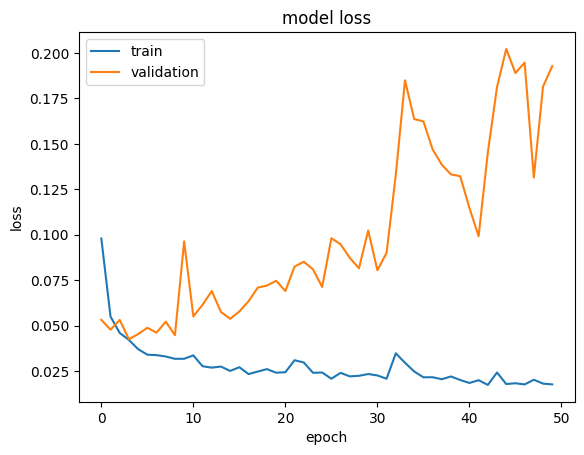

In [ ]:
# This code block imports the pyplot module from the matplotlib library.
# It then uses the plot() method of the pyplot module to plot the training and validation
# loss of the deep neural network model defined in a previous cell. The training loss and validation loss
# are obtained from the history object, which stores the training history of the model. The plot title,
# axis labels, and legend are then set using the title(), xlabel(), ylabel(), and legend() methods of the pyplot module.
# Finally, the plot is displayed using the show() method of the pyplot module.

from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

- *Training Accuracy* V/s *Validation Accuracy*

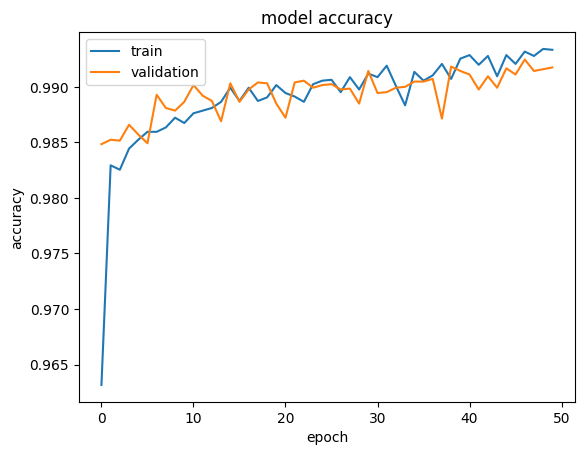

In [ ]:
# Import the pyplot module from the matplotlib library
from matplotlib import pyplot as plt

# Plot the training and validation accuracy of the deep neural network model defined in a previous cell.
# The training accuracy and validation accuracy are obtained from the history object, which stores the training history of the model.
# The plot title, axis labels, and legend are then set using the title(), xlabel(), ylabel(), and legend() methods of the pyplot module.
# Finally, the plot is displayed using the show() method of the pyplot module.

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

- Heat Map - Confusion Matrix

Text(95.72222222222221, 0.5, 'actual')

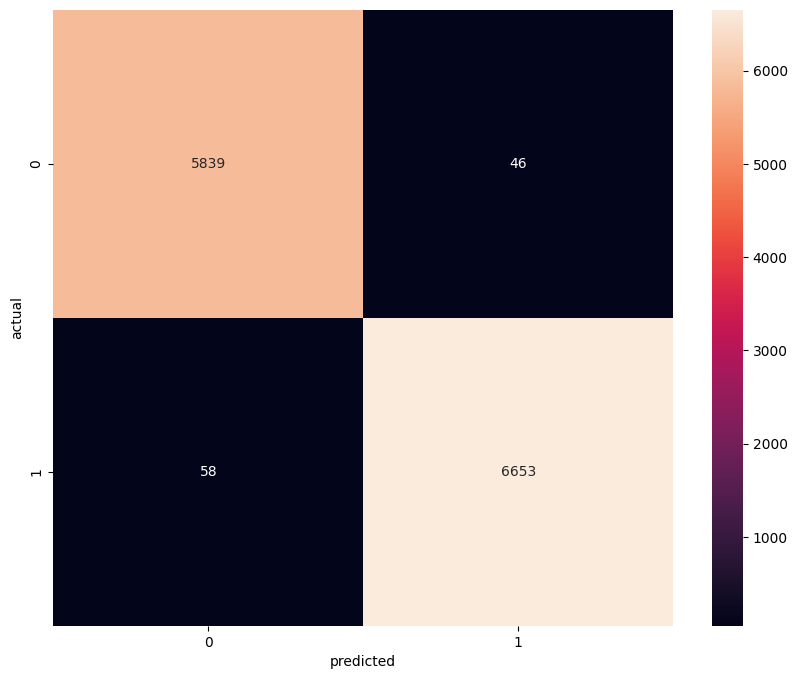

In [ ]:
# Import the seaborn library as sn
import seaborn as sn

# Calculate the confusion matrix for the test data using the predicted and actual values
# The confusion matrix is a table that shows the number of true positives, false positives, true negatives, and false negatives.
# The 'confusion_matrix()' function of the tensorflow library is used to calculate the confusion matrix.
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

# Create a heatmap of the confusion matrix using the seaborn library
# The 'heatmap()' function of the seaborn library is used to create the heatmap.
# The 'annot' parameter is set to True to display the values in each cell of the heatmap.
# The 'fmt' parameter is set to 'd' to format the values as integers.
# The x-axis and y-axis labels are set using the 'xlabel()' and 'ylabel()' functions of the pyplot module.
plt.figure(figsize=(10, 8))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("predicted")
plt.ylabel("actual")

# Summary

In [ ]:
# prepare a csv file such that
# it contains both the accuracies of all the models with names

# Create a list of lists named 'data' that contains the name of each model, as well as the training and test scores for each model.
# The training and test scores are obtained from the variables defined in previous cells.
# The list of lists is used to create a table of model performance using the 'tabulate' function from the 'tabulate' library.

# modify the accuracies upto 2 decimal places

data = [["K-Nearest Neighbour", round(KNN_train*100, 2), round(KNN_test*100, 2)],
        ["Logistic Regression", round(lg_train*100, 2), round(lg_test*100, 2)],
        ["Decision Tree", round(dt_train*100, 2), round(dt_test*100, 2)],
        ["Random Forest", round(rf_train*100, 2), round(rf_test*100, 2)],
        ["Gradient Boosting Model", round(
            SKGB_train*100, 2), round(SKGB_test*100, 2)],
        ["X-Gradient Boosting Model",
            round(xgb_train*100, 2), round(xgb_test*100, 2)],
        ["Adaboost", round(ab_train*100, 2), round(ab_test*100, 2)],
        ["Light Gradient Boosting Model", round(
            lgb_train*100, 2), round(lgb_test*100, 2)],
        ["CatBoost Model", round(cb_train*100, 2), round(cb_test*100, 2)],
        ["Naive Baye Model", round(BNB_train*100, 2), round(BNB_test*100, 2)],
        ["Voting Model", round(voting_train*100, 2), round(voting_test*100, 2)],
        ["Support Vector Machine", round(
            SVM_train*100, 2), round(SVM_test*100, 2)],
        ["Deep Learning Model", round(history.history['accuracy'][-1]*100, 2), round(history.history['val_accuracy'][-1]*100, 2)]]

# Create a list named 'col_names' that contains the column names for the table.
col_names = ["Model Name", "Train Score", "Test Score"]

# Print the table of model performance using the 'tabulate' function from the 'tabulate' library.
# The 'headers' parameter is set to 'col_names' to use the column names defined above.
# The 'tablefmt' parameter is set to 'fancy_grid' to use a fancy grid format for the table.
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═══════════════════════════════╤═══════════════╤══════════════╕
│ Model Name                    │   Train Score │   Test Score │
╞═══════════════════════════════╪═══════════════╪══════════════╡
│ K-Nearest Neighbour           │         96.25 │        96.45 │
├───────────────────────────────┼───────────────┼──────────────┤
│ Logistic Regression           │         95.46 │        95.47 │
├───────────────────────────────┼───────────────┼──────────────┤
│ Decision Tree                 │         94.38 │        94.35 │
├───────────────────────────────┼───────────────┼──────────────┤
│ Random Forest                 │         93.27 │        93.72 │
├───────────────────────────────┼───────────────┼──────────────┤
│ Gradient Boosting Model       │         99.72 │        99.44 │
├───────────────────────────────┼───────────────┼──────────────┤
│ X-Gradient Boosting Model     │         78.29 │        78.08 │
├───────────────────────────────┼───────────────┼──────────────┤
│ Adaboost               

In [ ]:
# save above data in a csv file named "results.csv"
df = pd.DataFrame(data, columns=col_names)
df.to_csv(f"/content/drive/MyDrive/Intrusion Detection System/results.csv", index=False)